Василевский Георгий

https://t.me/georgiy_vasilevskiy

# Прогнозирование вероятности выполнения спортсменом элементов фигурного катания в программе одиночного катания

Заказчик: Компания GoProtect

Сервис  “Мой Чемпион” помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.

Цель проекта: создать модель, помогающую находить элементы, которые могут быть успешно исполнены спортсменом на соревновании. 


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-предварительные-настройки" data-toc-modified-id="Импорт-библиотек-и-предварительные-настройки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и предварительные настройки</a></span></li><li><span><a href="#Чтение-файлов-и-загрузка-данных" data-toc-modified-id="Чтение-файлов-и-загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файлов и загрузка данных</a></span></li><li><span><a href="#Общая-характеристика-наборов-данных" data-toc-modified-id="Общая-характеристика-наборов-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая характеристика наборов данных</a></span></li></ul></li><li><span><a href="#Понимание-данных" data-toc-modified-id="Понимание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Понимание данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Таблица-tournament_scores" data-toc-modified-id="Таблица-tournament_scores-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Таблица tournament_scores</a></span><ul class="toc-item"><li><span><a href="#Признак-title" data-toc-modified-id="Признак-title-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Признак title</a></span></li><li><span><a href="#Признак-decrease" data-toc-modified-id="Признак-decrease-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Признак decrease</a></span></li></ul></li><li><span><a href="#Таблица-total_scores" data-toc-modified-id="Таблица-total_scores-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Таблица total_scores</a></span><ul class="toc-item"><li><span><a href="#Обработка-текстовых-значений" data-toc-modified-id="Обработка-текстовых-значений-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Обработка текстовых значений</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Извлечение-вложенных-сведений" data-toc-modified-id="Извлечение-вложенных-сведений-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Извлечение вложенных сведений</a></span></li></ul></li><li><span><a href="#Таблица-tournaments" data-toc-modified-id="Таблица-tournaments-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Таблица tournaments</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li></ul></li></ul></div>

## Обзор данных

### Импорт библиотек и предварительные настройки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings

from sklearn.metrics import roc_auc_score, balanced_accuracy_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings('ignore')

RANDOM_STATE = 1

### Чтение файлов и загрузка данных

Все данные хранятся в четырёх файлах.
<br>Файлы данных имеют формат `CSV`.

In [2]:
PATHS = [r'C:\Users\Георгий\Documents\Machine_Learning\GoProtect', 
         '/content', '/kaggle/input/goprotect']

def read_df(name, paths=PATHS):
    '''
    Функция загрузки данных из CSV-файлов
    с проверкой существования пути к файлу.

    Принимает название файла.
    Возвращает набор данных из файла.
    '''

    for path in paths:
        file_path = os.path.join(path, name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)

            return df

    print(f'{name}: Something is wrong')

In [3]:
units = read_df('units.csv')
tournaments = read_df('tournaments.csv')
tournament_scores = read_df('tournament_scores.csv')
total_scores = read_df('total_scores.csv')

### Общая характеристика наборов данных

Предварительно зададим функции, позволяющие получить основные сведения о наборах данных, отслеживать в наборах данных наличие пропусков и визуализировать их распределение.

In [4]:
def df_info(data):
    '''
    Функция выводит описание набора данных, первые и посление строки,
    а также типы данных набора данных.

    Принимает набор исследуемых данных.
    '''

    display(data.head(2))
    display(data.tail(2))
    print('Размер набора данных:', data.shape)
    print('\nКоличество элементов данных:', data.size)
    print('\nКоличество дубликатов в наименованиях признаков:',
          data.columns.duplicated().sum())
    print('\nУникальные наименования признаков:\n',
          data.columns.sort_values().tolist())
    print('\nКоличество пропущенных значений:',
          data.isna().sum().sum())
    print('\nПроцент пропущенных значений:',
          round(data.isna().sum().sum() / data.size * 100, 1), '%')
    print('\nТипы данных набора данных:')
    display(data.dtypes.value_counts())

In [5]:
def show_na(data):
    '''
    Функция выводит количество пропусков в признаках и
    долю пропусков (в процентах) от общего числа записей.

    Принимает набор исследуемых данных.
    Возвращает датафрейм с описанием распределения пропусков.
    '''

    total = data.isna().sum().sort_values(ascending=False)
    percent = (data.isna().sum() /
               data.isna().count() * 100).round(1).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Всего пропусков', '%'])

    return df

In [6]:
def pic_na(data):
    '''
    Функция визуализирует распределение пропусков в наборе данных.

    Принимает набор исследуемых данных.
    '''

    sns.heatmap(data.isna(), cmap=sns.color_palette(['#000000', '#ffffff']))
    plt.title('Тепловая карта\nраспределения пропущенных значений')
    plt.xlabel('Название признака')
    plt.ylabel('Номер записи')
    plt.show()

In [7]:
df_info(units)

,id,color,school_id
0,9474,green,244.0
1,733,green,203.0


,id,color,school_id
4594,5110,green,62.0
4595,5113,green,62.0


Размер набора данных: (4596, 3)

Количество элементов данных: 13788

Количество дубликатов в наименованиях признаков: 0

Уникальные наименования признаков:
 ['color', 'id', 'school_id']

Количество пропущенных значений: 590

Процент пропущенных значений: 4.3 %

Типы данных набора данных:


int64      1
object     1
float64    1
Name: count, dtype: int64

In [8]:
show_na(units)

,Всего пропусков,%
school_id,589,12.8
color,1,0.0
id,0,0.0


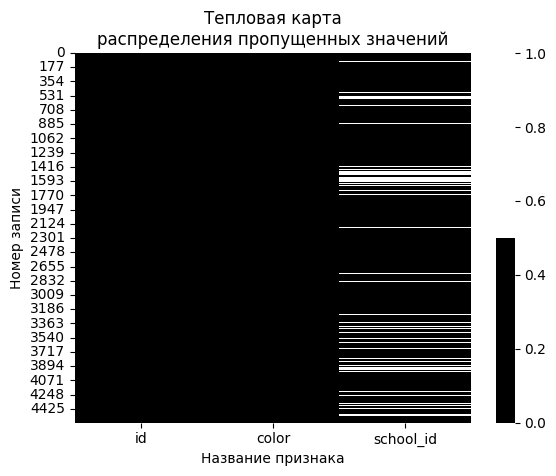

In [9]:
pic_na(units)

In [10]:
df_info(tournaments)

,id,date_start,date_end,origin_id
0,1,2090-11-29,2090-12-01,2.0
1,2,2091-03-06,2091-03-10,1.0


,id,date_start,date_end,origin_id
140,7115,2092-04-23,2092-04-26,2.0
141,6676,2092-02-28,2092-03-01,1.0


Размер набора данных: (142, 4)

Количество элементов данных: 568

Количество дубликатов в наименованиях признаков: 0

Уникальные наименования признаков:
 ['date_end', 'date_start', 'id', 'origin_id']

Количество пропущенных значений: 0

Процент пропущенных значений: 0.0 %

Типы данных набора данных:


object     2
int64      1
float64    1
Name: count, dtype: int64

In [11]:
df_info(tournament_scores)

,id,total_score_id,title,decrease,base_score,goe,avg_score
0,1,1,2A,NaN,3.3,0.66,3.96
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09


,id,total_score_id,title,decrease,base_score,goe,avg_score
172156,352011,463407,StSq2,NaN,2.6,0.52,3.12
172157,352012,463407,FSSp3,NaN,2.6,0.26,2.86


Размер набора данных: (172158, 7)

Количество элементов данных: 1205106

Количество дубликатов в наименованиях признаков: 0

Уникальные наименования признаков:
 ['avg_score', 'base_score', 'decrease', 'goe', 'id', 'title', 'total_score_id']

Количество пропущенных значений: 130973

Процент пропущенных значений: 10.9 %

Типы данных набора данных:


float64    3
int64      2
object     2
Name: count, dtype: int64

In [12]:
show_na(tournament_scores)

,Всего пропусков,%
decrease,130973,76.1
total_score_id,0,0.0
id,0,0.0
title,0,0.0
base_score,0,0.0
goe,0,0.0
avg_score,0,0.0


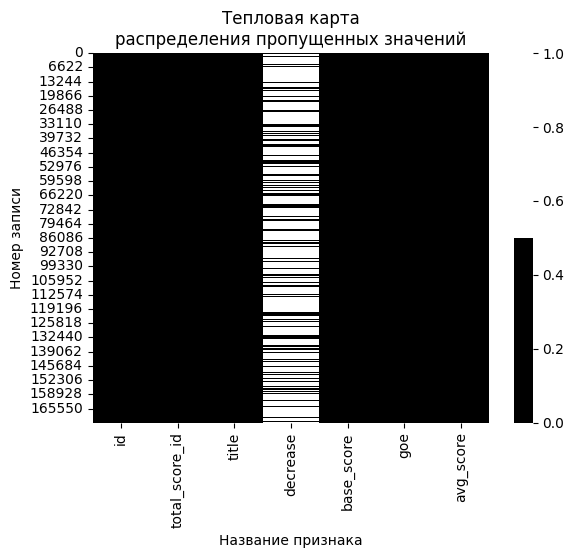

In [13]:
pic_na(tournament_scores)

In [14]:
df_info(total_scores)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
0,442027,304,4785,47.2,43.47,102.70,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2
1,442028,604,4785,45.4,46.71,101.19,54.48,0.0,18,2,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,1,294.75,1


,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
21299,462408,34980,7116,21.17,26.0,45.24,20.74,-1.5,2,23,Произвольная программа,q Прыжок приземлён в четверть < Недокрученный ...,24,68.22,24
21300,462409,9973,7116,18.91,25.0,43.05,18.55,-0.5,8,24,Произвольная программа,* Недопустимый элемент ! Неясное ребро на толч...,23,68.84,23


Размер набора данных: (21301, 15)

Количество элементов данных: 319515

Количество дубликатов в наименованиях признаков: 0

Уникальные наименования признаков:
 ['base_score', 'components_score', 'decreasings_score', 'elements_score', 'id', 'info', 'overall_place', 'overall_place_str', 'overall_total_score', 'place', 'segment_name', 'starting_place', 'total_score', 'tournament_id', 'unit_id']

Количество пропущенных значений: 11102

Процент пропущенных значений: 3.5 %

Типы данных набора данных:


int64      6
float64    6
object     3
Name: count, dtype: int64

In [15]:
show_na(total_scores)

,Всего пропусков,%
overall_place_str,10487,49.2
info,581,2.7
segment_name,17,0.1
overall_total_score,17,0.1
id,0,0.0
unit_id,0,0.0
tournament_id,0,0.0
elements_score,0,0.0
total_score,0,0.0
components_score,0,0.0


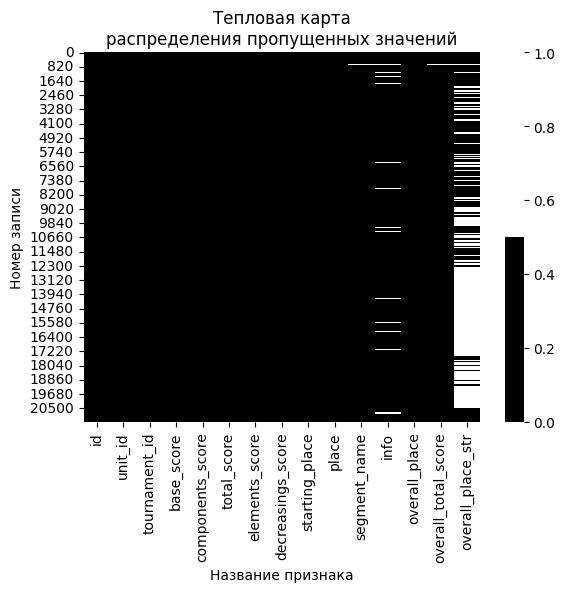

In [16]:
pic_na(total_scores)

## Понимание данных

Спортивные соревнования по фигурному катанию на коньках (далее – спортивные соревнования, соревнования) проводятся по следующим спортивным дисциплинам:
- одиночное катание;
- парное катание;
- танцы на льду;
- синхронное катание;
- командные соревнования/

Соревнования по одиночному катанию состоят из следующих разделов:
- произвольной программы или 
- короткой и произвольной программы или 
- могут проводиться соревнования по элементам, короткой программе и/или произвольной программе.

Соревнования (по одиночному, парному катанию и танцам на льду) могут быть:
-  личными, в которых определяются места отдельных участников или пар;
-  командными, в которых на основании результатов отдельных участников определяются места команд;
-  лично-командными, в которых одновременно определяются места отдельных участников и команд.

Регламент о соревнованиях (далее – Регламент) определяет порядок организации и проведения соревнований, их цели и задачи. В Регламенте должны быть указаны:
- статус соревнований;
- место и сроки проведения соревнований;
- организаторы соревнований;
- требования к участникам соревнований и условия их допуска;
- программа соревнований;
- условия подведения итогов;
- награждение;
- порядок предоставления заявок на участие;
- условия финансирования.

Соревнования могут проводиться при условии явки на старт не менее двух участников или двух пар или двух команд в синхронном катании.

Возраст спортсменов, допускаемых к спортивному соревнованию, определяется Регламентом соревнований. Возрастные группы для допуска к соревнованию указаны в таблице:

|Спортивная дисциплина|Группа|Возраст|
|:---:|---|---|
|Одиночное катание|||
||Мужчины, женщины|14 лет и старше (в сезоне 2022-2023)<br>15 лет и старше (в сезоне 2023-2024)|
||Юниоры, юниорки|13-19 лет|
||Юноши, девушки|11-17 лет|
||Мальчики, девочки|9-12 лет|
||Мальчики, девочки|6-8 лет|

5.10. К соревнованию допускаются только спортсмены, получившие разрешение врача при наличии страхового полиса от несчастных случаев, включающих спортивные риски.

Участник обязан:
- своевременно предоставить в секретариат соревнований специальную форму с содержанием программ (перечнем планируемых для исполнения элементов) для каждого раздела соревнований, если это указано в Регламенте соревнований;
- принимать участие в жеребьевках непосредственно или через своего представителя...

Организация, проводящая соревнование, обязана до начала мероприятия:
- утвердить судейскую коллегию...

Официальные спортивные соревнования проводятся на объектах спорта, включенных во Всероссийский реестр объектов спорта.

Ледовая площадка (каток) для проведения соревнований должна быть прямоугольной, иметь размер 60 м в длину и 30 м в ширину, но не больше, и не меньше 56 м в длину и 26 м в ширину. Официальные лица не должны находиться в пределах ледовой площадки. Судьи и старший судья (рефери) располагаются вдоль длинного борта площадки, а Техническая бригада, если это возможно, должна располагаться на возвышении (подиуме).

Соревнования, где возможно присвоение юношеских разрядов, и неклассификационные соревнования можно проводить на площадке нестандартных размеров.

Про продолжительность катания и костюмы вставить отрывок. За это снижаются баллы.

Все жеребьёвки проводят старший судья по виду, технический контролер и главный секретарь или один из секретарей публично. На жеребьевке должно присутствовать не менее двух спортсменов участников соревнований.
Стартовые номера могут «вытягиваться» в процессе жеребьёвки каждым присутствующим участником, официальным представителем его организации, капитаном команды в синхронном катании или членами Организационного комитета.

В одиночном, парном и синхронном катании сначала проводятся соревнования по короткой программе, затем по произвольной программе. Если в программу соревнований включены раздел по элементам, как часть многоборья, то элементы исполняются первыми.

Нельзя проводить более двух разделов соревнований в одной дисциплине в один день. В случае необходимости проведения двух разделов соревнований в одной дисциплине в один день, между окончанием предыдущего раздела и началом следующего должен быть перерыв не менее 4 часов.
Соревнования в одной дисциплине должны проводиться не дольше трех дней, если дисциплина состоит из двух разделов, и не дольше четырех дней, если дисциплина состоит из трех разделов.

Жеребьёвка

Короткая программа/ритм танец/паттерн танец(ы)/соревнования по элементам:
- выбирается участник/пара/команда для жеребьевки буквы алфавита, с которой будет начинаться жеребьевка;
- жеребьевка стартовых номеров проводится в алфавитном порядке (в парном катании и танцах по алфавитному списку фамилий партнерш, в синхронном катании – по алфавитному списку названий команд, начиная с той буквы, которая была определена как первая.

В соревнованиях по элементам в одиночном катании участники делятся на минимальное число равных групп в соответствии с пунктом 13.3. Первый элемент (группу элементов) сначала исполняют участники первой группы, затем участники второй группы, и т.д. Второй элемент (группу элементов) исполняют в том же порядке.

На основных соревнованиях (чемпионат и первенство России, этапы Кубка России) при жеребьевке стартовых номеров на короткую программу/ритм танец может быть применена жеребьевка стартовых номеров в обратном порядке рейтинга спортсменов. В случае равного количества рейтинговых очков проводится отдельная жеребьевка для определения порядка выступления между такими участниками/парами. Если участники/пары не имеют рейтинговых очков, то они располагаются в конце списка в алфавитном порядке. Для таких участников/пар проводится отдельная жеребьевка для определения порядка их выступления. Данный порядок жеребьевки должен быть указан в Регламенте соревнований.

Произвольная программа/произвольный танец:
- стартовый номер определяется по результатам исполнения короткой программы/ритм/паттерн танца;
- сразу после определения результатов предыдущего раздела соревнований старший судья в присутствии, по крайней мере, одного участника должен 

дописать про жеребьёвку...

В каждом из разделов соревнований (короткая программа/ритм танец/произвольное программа/произвольный танец или паттерн танец) каждый Участник/ пара/ танцевальный дует/команда должен принять стартовую позу в течение тридцати (30) секунд после вызова на старт. В синхронном катании капитан команды должен подать сигнал о готовности команды. Если это время истекло и Участник(и) не принял(и) стартовую позу, старший судья (рефери) должен применить снижение в 1,0 балл (вычитание производится из итоговой суммы) в соответствии с пунктом 17.3.

Про повторный старт дописать. Там ещё есть снижения баллов.




Подсчет результатов за элементы программы/танца

Стоимости элементов (SOV) короткой программы/ритм танца/произвольной программы/произвольного танца/секции паттерн танца обновляются на каждый сезон и публикуются на сайте Федерации. Таблица стоимости элементов содержит базовые стоимости всех элементов и числовые значения градаций качества исполнения (GOE).

Базовая стоимость элемента

Техническая бригада определяет название и, если требуется, уровень сложности каждого элемента. Базовые стоимости элементов измеряются в баллах и возрастают с возрастанием сложности элементов и с увеличением уровня сложности элементов.

Сложность элементов в одиночном и парном катании зависит от:
- в прыжках (одиночное и парное катание) и в выбросах (парное катание): названий прыжков или выбросов в порядке возрастания их сложности (Тоулуп, Сальхов, Риттбергер, Флип, Лутц, Аксель) числа оборотов и знаков «<<», «<», « е » и «REP»;
- в других элементах: названий, знака «V» и уровней сложности.

Уровни сложности элементов

Описание характеристик (черт), которые позволяют присвоить Элементу определённый уровень сложности, ежегодно публикуются на сайте Федерации в соответствующих документах на данный спортивный сезон.

В одиночном и парном катании поддержки, подкрутки и тодесы (пары), вращения и шаги (одиночное и парное катание) подразделяются соответственно на пять (5) уровней сложности соответственно числу характерных «черт»:
- Базовый уровень – отсутствие Черт или запрещенный элемент;
- Уровень 1 – в случае одной Черты;
- Уровень 2 – в случае двух Черт;
- Уровень 3 – в случае трёх Черт;
- Уровень 4 – в случае четырёх или более Черт.

Максимальный уровень сложности для 2 и 3 спортивного разряда в одиночном катании и для 1 спортивного разряда в парном катании – третий (3). Максимальный уровень сложности для 1 юношеского спортивного разряда в
одиночном катании и для второго спортивного разряда в парном катании – второй (2). Максимальный уровень сложности в одиночном катании для 2 юношеского спортивного разряда – первый (1), для 3 юношеского спортивного разряда – базовый.

Каждый Судья оценивает качество исполнения каждого Элемента/Секции танца/Комбинации элементов в зависимости от наличия положительных факторов и/или возможных ошибок исполнения по 11 градациям «качества исполнения» (GOE): +5; +4; +3; +2; +1; Базовая стоимость; –1; –2; –3; –4; –5. Численное значение каждой градации приведено в таблице SOV;
- Определенное бригадой судей качество исполнения Элемента/Секции танца (GOE) получается путем вычисления «усеченного среднего» численных значений GOE, присуждённых судьями;
- Усеченное среднее значение определяется отбрасыванием самого высокого и самого низкого значений и вычислением среднего значения оставшихся. В случае если имеется менее пяти (5) судей, максимальная и минимальная оценки при вычислении не отбрасываются;
- Это среднее значение становится окончательной оценкой бригады за качество исполнения отдельного Элемента/Секции танца (GOE). GOE бригады округляется до двух (2) значащих цифр после запятой;
- Оценка бригады за каждый Элемент/Секцию танца определяется суммированием усеченной средней GOE данного Элемента/Секции с его базовой стоимостью;
- Оценки бригады за все Элементы/Секции танца суммируются для получения суммарной оценки за Элементы.

В одиночном и парном катании:

Каскады и комбинации прыжков оцениваются как один Элемент суммированием базовых стоимостей прыжков, составляющих каскад, и GOE c численным значением для наиболее сложного прыжка;
Любой дополнительный Элемент или Элементы, сверх предписанного количества, не засчитываются в результат участника. Принимается во внимание только первая попытка (или разрешенное число попыток) исполнения Элемента;
В короткой и произвольной программах одиночного катания коэффициент 1.1 базовой стоимости прыжков, начинаемых во второй половине программы, применяется только к последнему прыжку короткой программы и трем последним прыжкам произвольной программы. Каждая базовая стоимость умноженная на коэффициент такого Элемента, исполненного во второй половине программы, округляется до двух значащих цифр после запятой. Вторая половина программы отсчитывается от середины её предписанной длительности без учёта разрешённых плюс-минус 10 секунд.
Однако, в случаях возникновения перерывов (до 3 минут) при исполнении программ (п. 16) коэффициент 1.1 применяется только к элементам, которые были исполнены во второй половине программы до прерывания выступления.

Подсчет результатов за Компоненты программы/танца

Всё выступление Участника/пары/танцевального дуэта/команды оценивается тремя cледующими Компонентами: Композиция/Музыкальность (для паттерн танцев в танцах на льду), Представление и Мастерство катания.

Композиция/Музыкальность

Интеллектуально осмысленное и/или оригинальное оформление всех типов движений фигурного катания в осмысленное целое в соответствии с принципами пропорции, единства, пространства, рисунка и музыкальной структуры.
При оценке Композиции рассматриваются следующие критерии:
− единство;
− связующие движения, шаги и повороты между элементами и внутри них;
− рисунок программы и использование ледовой площадки;
− многомерность движений и использование пространства;
− хореография, отражающая музыкальные фразы и форму.

Представление

Демонстрация вовлеченности, участия и заинтересованности, основанной на понимании музыки и композиции.
При оценке Представления рассматриваются следующие критерии:
− выразительность, экспрессивность и умение «подать себя» аудитории;
− разнообразие и контрастность движений и энергии;
− музыкальная чувствительность и соответствие музыке (Тайминг);
− унисон, единство, пространственное чувство партнеров – контроль расстояния между партнёрами и смен хватов (в парном катании, танцах на льду и синхронном катании).

Мастерство катания

Способность фигуриста использовать терминологию фигурного катания (шаги, повороты, движения на коньках) при контроле тела во время их исполнения.
При оценке Мастерства катания рассматриваются следующие критерии:
− разнообразие ребер, шагов, поворотов, движений и направлений;
− чистота ребер, шагов, поворотов, движений на коньках при контроле тела во время их исполнения;
− баланс и непринужденность скольжения;
− плавность скольжения;
− использование силы и скорости.

Оценка Компонентов программы

После завершения исполнения программы, каждый Судья оценивает Компоненты программы по шкале от 0,25 до 10,0 баллов с шагом 0,25. Оценки судьями за Компоненты программы соответствуют следующей градации: менее 1 балла чрезвычайно плохо, от 1 до 1,75 очень плохо, 2-2,75 – плохо, 3- 3,75 –слабо, 4-4,75 – посредственно, 5-5,75 – средне, 6-6,75 – выше среднего, 7-7,75 – хорошо, 8-8,75 – очень хорошо, 9-9,75 – отлично, 10 – превосходно.

Указания по оценке Компонентов программы обновляются на каждый сезон и публикуются на сайте Федерации.
Результат оценки бригадой судей каждого из Компонентов программы получается вычислением усеченного среднего оценок судей за каждый Компонент программы. Усечённое среднее вычисляется в соответствии с подпунктом 17.1.
Усечённое среднее оценки за каждый Компонент программы округляется до двух цифр после запятой.
Оценка бригады за каждый Компонент программы умножается затем на коэффициенты в соответствии с требованиями ЕВСК.
Умноженные на коэффициенты баллы округляются до двух знаков после запятой и суммируются. Сумма является результатом за Компоненты программы.







В Короткой Программе и Произвольном Катании всюду, где это возможно, мы должны называть элементы, реально выполненные, а не элементы, которые требуется исполнить.

Каждый элемент в Короткой Программе и Произвольном Катании, начатый после предписанного времени (плюс разрешенные десять секунд) не указывается Технической Бригадой и не имеет стоимости.


\* - неправильные/лишние элементы - элементы без стоимости
Любые неправильные/лишние элементы получат знак «\*», что приводит к элементу без стоимости

F - падение в элементе
Падение определяется как потеря спортсменом контроля, с результатом, что большая часть веса его/ее тела находится на льду и поддерживается любой другой частью тела (не коньками), например, рукой (руками), коленом (коленями), спиной, ягодицей (ягодицами) или любой частью руки.

REP - повторение прыжка или повторение каскада/комбинации (приводит к нулевой стоимости повторного прыжка и к снижению до 70 % базовой стоимости первого прыжка в третьей и последующих каскаде/комбинации и к учёту только первого прыжка как сольного во втором каскаде/комбинации)

COMBO = "каскад"

SEQ = "комбинация"

Прыжковая ячейка / Прыжки названы и займут прыжковую ячейку

Черты
Для элементов, имеющих Уровень сложности,
Уровень 1 дается в случаях наличия одной черты,
Уровень 2 дается в случаях наличия двух черт,
Уровень 3 – в случаях наличия трех черт, а
Уровень 4 – в случаях наличия четырех черт из Списка.
В случаях отсутствия черт присуждается Базовый Уровень.

**`StSq` &mdash; дорожки шагов**

Присутствиуют в КП и ПП

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**StSqB**|B|1,50|
|**StSq1**|1|1,80|
|**StSq2**|2|2,60|
|**StSq3**|3|3,30|
|**StSq4**|4|3,90|

**`ChSq` &mdash; хореографические последовательности**

Присутствуют в ПП

Элемент имеет фиксированную базовую стоимость

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**ChSq1**|1|3,00|

**`ChSpl` &mdash; хореографическая спираль**

Присутствует в ПП

2 и 3 юношеские разряды

Элемент имеет фиксированную базовую стоимость

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**ChSpl1**|1|1,50|

**`Sp` &mdash; вращения**

<прыжок во вращение><смена ноги><позиция>**`Sp`**<уровень><знак>

**`_Sp` &mdash; вращение в одной позиции без смены ноги**

**`USp` &mdash; вращение стоя** &mdash; базовая позиция

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**USpB**|B|1,00|
|**USp1**|1|1,20|
|**USp2**|2|1,50|
|**USp3**|3|1,90|
|**USp4**|4|2,40|

**`LSp` &mdash; вращение в заклоне** &mdash; вариация позиции стоя

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**LSpB**|B|1,20|
|**LSp1**|1|1,50|
|**LSp2**|2|1,90|
|**LSp3**|3|2,40|
|**LSp4**|4|2,70|

**`CSp` &mdash; вращение в либеле** &mdash; базовая позиция

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**CSpB**|B|1,10|
|**CSp1**|1|1,40|
|**CSp2**|2|1,80|
|**CSp3**|3|2,30|
|**CSp4**|4|2,60|

**`SSp` &mdash; вращение в волчке** &mdash; базовая позиция

|Обозначение|Уровень сложности|Базовая стоимость|
|:---:|:---:|:---:|
|**SSpB**|B|1,10|
|**SSp1**|1|1,30|
|**SSp2**|2|1,60|
|**SSp3**|3|2,10|
|**SSp4**|4|2,50|

**`F_Sp` &mdash; прыжок во вращение**

**`FUSp` &mdash; прыжок во вращение стоя**

|Обозначение|Уровень сложности|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|
|**FUSpB**|B||1,50|
|**FUSp1**|1||1,70|
|**FUSp2**|2||2,00|
|**FUSp3**|3||2,40|
|**FUSp4**|4||2,90|
|**FUSpBV**|B|V|1,13|
|**FUSp1V**|1|V|1,28|
|**FUSp2V**|2|V|1,50|
|**FUSp3V**|3|V|1,80|
|**FUSp4V**|4|V|2,18|

**`FLSp` &mdash; прыжок во вращение в заклоне**

|Обозначение|Уровень сложности|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|
|**FLSpB**|B||1,70|
|**FLSp1**|1||2,00|
|**FLSp2**|2||2,40|
|**FLSp3**|3||2,90|
|**FLSp4**|4||3,20|
|**FLSpBV**|B|V|1,28|
|**FLSp1V**|1|V|1,50|
|**FLSp2V**|2|V|1,80|
|**FLSp3V**|3|V|2,18|
|**FLSp4V**|4|V|2,40|

**`FCSp` &mdash; прыжок во вращение в либеле**

|Обозначение|Уровень сложности|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|
|**FCSpB**|B||1,60|
|**FCSp1**|1||1,90|
|**FCSp2**|2||2,30|
|**FCSp3**|3||2,80|
|**FCSp4**|4||3,20|
|**FCSpBV**|B|V|1,20|
|**FCSp1V**|1|V|1,43|
|**FCSp2V**|2|V|1,73|
|**FCSp3V**|3|V|2,10|
|**FCSp4V**|4|V|2,40|

**`FSSp` &mdash; прыжок во вращение в волчке**

|Обозначение|Уровень сложности|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|
|**FSSpB**|B||1,70|
|**FSSp1**|1||2,00|
|**FSSp2**|2||2,30|
|**FSSp3**|3||2,60|
|**FSSp4**|4||3,00|
|**FSSpBV**|B|V|1,28|
|**FSSp1V**|1|V|1,50|
|**FSSp2V**|2|V|1,73|
|**FSSp3V**|3|V|1,95|
|**FSSp4V**|4|V|2,25|

**`C_Sp` &mdash; вращение со сменой ноги**

**`CUSp` &mdash; вращение стоя со сменой ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**СUSpB**|B||C||1,50|
|**СUSp1**|1||C||1,70|
|**СUSp2**|2||C||2,00|
|**СUSp3**|3||C||2,40|
|**СUSp4**|4||C||2,90|
|**СUSpBV**|B||C|V|1,13|
|**СUSp1V**|1||C|V|1,28|
|**СUSp2V**|2||C|V|1,50|
|**СUSp3V**|3||C|V|1,80|
|**СUSp4V**|4||C|V|2,18|
|**FСUSpB**|B|F|C||1,50|
|**FСUSp1**|1|F|C||1,70|
|**FСUSp2**|2|F|C||2,00|
|**FСUSp3**|3|F|C||2,40|
|**FСUSp4**|4|F|C||2,90|
|**FСUSpBV**|B|F|C|V|1,13|
|**FСUSp1V**|1|F|C|V|1,28|
|**FСUSp2V**|2|F|C|V|1,50|
|**FСUSp3V**|3|F|C|V|1,80|
|**FСUSp4V**|4|F|C|V|2,18|

**`CLSp` &mdash; вращение в заклоне со сменой ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CLSpB**|B||C||1,70|
|**CLSp1**|1||C||2,00|
|**CLSp2**|2||C||2,40|
|**CLSp3**|3||C||2,90|
|**CLSp4**|4||C||3,20|
|**CLSpBV**|B||C|V|1,28|
|**CLSp1V**|1||C|V|1,50|
|**CLSp2V**|2||C|V|1,80|
|**CLSp3V**|3||C|V|2,18|
|**CLSp4V**|4||C|V|2,40|
|**FCLSpB**|B|F|C||1,70|
|**FCLSp1**|1|F|C||2,00|
|**FCLSp2**|2|F|C||2,40|
|**FCLSp3**|3|F|C||2,90|
|**FCLSp4**|4|F|C||3,20|
|**FCLSpBV**|B|F|C|V|1,28|
|**FCLSp1V**|1|F|C|V|1,50|
|**FCLSp2V**|2|F|C|V|1,80|
|**FCLSp3V**|3|F|C|V|2,18|
|**FCLSp4V**|4|F|C|V|2,40|

**`CCSp` &mdash; вращение в либеле со сменой ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CCSpB**|B||C||1,70|
|**CCSp1**|1||C||2,00|
|**CCSp2**|2||C||2,30|
|**CCSp3**|3||C||2,80|
|**CCSp4**|4||C||3,20|
|**CCSpBV**|B||C|V|1,28|
|**CCSp1V**|1||C|V|1,50|
|**CCSp2V**|2||C|V|1,73|
|**CCSp3V**|3||C|V|2,10|
|**CCSp4V**|4||C|V|2,40|
|**FCCSpB**|B|F|C||1,70|
|**FCCSp1**|1|F|C||2,00|
|**FCCSp2**|2|F|C||2,30|
|**FCCSp3**|3|F|C||2,80|
|**FCCSp4**|4|F|C||3,20|
|**FCCSpBV**|B|F|C|V|1,28|
|**FCCSp1V**|1|F|C|V|1,50|
|**FCCSp2V**|2|F|C|V|1,73|
|**FCCSp3V**|3|F|C|V|2,10|
|**FCCSp4V**|4|F|C|V|2,40|

**`CSSp` &mdash; вращение в волчке со сменой ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CSSpB**|B||C||1,60|
|**CSSp1**|1||C||1,90|
|**CSSp2**|2||C||2,30|
|**CSSp3**|3||C||2,60|
|**CSSp4**|4||C||3,00|
|**CSSpBV**|B||C|V|1,20|
|**CSSp1V**|1||C|V|1,43|
|**CSSp2V**|2||C|V|1,73|
|**CSSp3V**|3||C|V|1,95|
|**CSSp4V**|4||C|V|2,25|
|**FCSSpB**|B|F|C||1,60|
|**FCSSp1**|1|F|C||1,90|
|**FCSSp2**|2|F|C||2,30|
|**FCSSp3**|3|F|C||2,60|
|**FCSSp4**|4|F|C||3,00|
|**FCSSpBV**|B|F|C|V|1,20|
|**FCSSp1V**|1|F|C|V|1,43|
|**FCSSp2V**|2|F|C|V|1,73|
|**FCSSp3V**|3|F|C|V|1,95|
|**FCSSp4V**|4|F|C|V|2,25|

**`CoSp` &mdash; комбинация вращений со сменой позиции без смены ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CoSpB**|B||||1,50|
|**CoSp1**|1||||1,70|
|**CoSp2**|2||||2,00|
|**CoSp3**|3||||2,50|
|**CoSp4**|4||||3,00|
|**CoSpBV**|B|||V|1,13|
|**CoSp1V**|1|||V|1,28|
|**CoSp2V**|2|||V|1,50|
|**CoSp3V**|3|||V|1,88|
|**CoSp4V**|4|||V|2,25|
|**FCoSpB**|B|F|||1,50|
|**FCoSp1**|1|F|||1,70|
|**FCoSp2**|2|F|||2,00|
|**FCoSp3**|3|F|||2,50|
|**FCoSp4**|4|F|||3,00|
|**FCoSpBV**|B|F||V|1,13|
|**FCoSp1V**|1|F||V|1,28|
|**FCoSp2V**|2|F||V|1,50|
|**FCoSp3V**|3|F||V|1,88|
|**FCoSp4V**|4|F||V|2,25|

**`CCoSp` &mdash; комбинация вращений со сменой позиции и сменой ноги**

|Обозначение|Уровень сложности|Прыжок во вращение|Смена ноги|Знак|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CCoSpB**|B||C||1,70|
|**CCoSp1**|1||C||2,00|
|**CCoSp2**|2||C||2,50|
|**CCoSp3**|3||C||3,00|
|**CCoSp4**|4||C||3,50|
|**CCoSpBV**|B||C|V|1,28|
|**CCoSp1V**|1||C|V|1,50|
|**CCoSp2V**|2||C|V|1,88|
|**CCoSp3V**|3||C|V|2,25|
|**CCoSp4V**|4||C|V|2,63|
|**FCCoSpB**|B|F|C||1,70|
|**FCCoSp1**|1|F|C||2,00|
|**FCCoSp2**|2|F|C||2,50|
|**FCCoSp3**|3|F|C||3,00|
|**FCCoSp4**|4|F|C||3,50|
|**FCCoSpBV**|B|F|C|V|1,28|
|**FCCoSp1V**|1|F|C|V|1,50|
|**FCCoSp2V**|2|F|C|V|1,88|
|**FCCoSp3V**|3|F|C|V|2,25|
|**FCCoSp4V**|4|F|C|V|2,63|

**Прыжковые элементы**

**Отдельные прыжки**

**`_T` &mdash; тулуп**

|Обозначение|Уровень сложности|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1T**|1|||||0,40|
|**1Tq**|1|q||||0,40|
|**1T<**|1||<|||0,32|
|**1T<<**|1|||<<||0,00|
|**2T**|2|||||1,30|
|**2Tq**|2|q||||1,30|
|**2T<**|2||<|||1,04|
|**2T<<**|2|||<<||0,40|
|**3T**|3|||||4,20|
|**3Tb**|3||||b|4,20|
|**3Tq**|3|q||||4,20|
|**3Tqb**|3|q|||b|4,20|
|**3T<**|3||<|||3,36|
|**3T<<**|3|||<<||1,30|
|**4T**|4|||||9,50|
|**4Tq**|4|q||||9,50|
|**4T<**|4||<|||7,60|
|**4T<<**|4|||<<||4,20|

**`_S` &mdash; сальхов**

|Обозначение|Уровень сложности|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1S**|1|||||0,40|
|**1Sq**|1|q||||0,40|
|**1S<**|1||<|||0,32|
|**1S<<**|1|||<<||0,00|
|**2S**|2|||||1,30|
|**2Sq**|2|q||||1,30|
|**2S<**|2||<|||1,04|
|**2S<<**|2|||<<||0,40|
|**3S**|3|||||4,30|
|**3Sb**|3||||b|4,30|
|**3Sq**|3|q||||4,30|
|**3Sqb**|3|q|||b|4,30|
|**3S<**|3||<|||3,44|
|**3S<<**|3|||<<||1,30|
|**4S**|4|||||9,70|
|**4Sq**|4|q||||9,70|
|**4S<**|4||<|||7,76|
|**4S<<**|4|||<<||4,30|

**`_Lo` &mdash; риттбергер**

|Обозначение|Уровень сложности|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1Lo**|1|||||0,50|
|**1Loq**|1|q||||0,50|
|**1Lo<**|1||<|||0,40|
|**1Lo<<**|1|||<<||0,00|
|**2Lo**|2|||||1,70|
|**2Loq**|2|q||||1,70|
|**2Lo<**|2||<|||1,36|
|**2Lo<<**|2|||<<||0,50|
|**3Lo**|3|||||4,90|
|**3Lob**|3||||b|4,90|
|**3Loq**|3|q||||4,90|
|**3Loqb**|3|q|||b|4,90|
|**3Lo<**|3||<|||3,92|
|**3Lo<<**|3|||<<||1,70|
|**4Lo**|4|||||10,50|
|**4Loq**|4|q||||10,50|
|**4Lo<**|4||<|||8,40|
|**4Lo<<**|4|||<<||4,90|

**`_F` &mdash; флип**

|Обозначение|Уровень сложности|Неверное ребро|Неясное ребро|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1F**|1|||||||0,50|
|**1Fq**|1|||q||||0,50|
|**1F<**|1||||<|||0,40|
|**1F<<**|1|||||<<||0,00|
|**1Fe**|1|e||||||0,40|
|**1Feq**|1|e||q||||0,40|
|**1Fe<**|1|e|||<|||0,30|
|**1Fe<<**|1|e||||<<||0,00|
|**1F!**|1||!|||||0,50|
|**1F!q**|1||!|q||||0,50|
|**1F!<**|1||!||<|||0,40|
|**1F!<<**|1||!|||<<||0,00|
|**2F**|2|||||||1,80|
|**2Fq**|2|||q||||1,80|
|**2F<**|2||||<|||1,44|
|**2F<<**|2|||||<<||0,50|
|**2Fe**|2|e||||||1,44|
|**2Feq**|2|e||q||||1,44|
|**2Fe<**|2|e|||<|||1,08|
|**2Fe<<**|2|e||||<<||0,40|
|**2F!**|2||!|||||1,80|
|**2F!q**|2||!|q||||1,80|
|**2F!<**|2||!||<|||1,44|
|**2F!<<**|2||!|||<<||0,50|
|**3F**|3|||||||5,30|
|**3Fb**|3||||||b|5,30|
|**3Fq**|3|||q||||5,30|
|**3Fqb**|3|||q|||b|5,30|
|**3F<**|3||||<|||4,24|
|**3F<<**|3|||||<<||1,80|
|**3Fe**|3|e||||||4,24|
|**3Feq**|3|e||q||||4,24|
|**3Fe<**|3|e|||<|||3,18|
|**3Fe<<**|3|e||||<<||1,44|
|**3F!**|3||!|||||5,30|
|**3F!b**|3||!||||b|5,30|
|**3F!q**|3||!|q||||5,30|
|**3F!qb**|3||!|q|||b|5,30|
|**3F!<**|3||!||<|||4,24|
|**3F!<<**|3||!|||<<||1,80|
|**4F**|4|||||||11,00|
|**4Fq**|4|||q||||11,00|
|**4F<**|4||||<|||8,80|
|**4F<<**|4|||||<<||5,30|
|**4Fe**|4|e||||||8,80|
|**4Feq**|4|e||q||||8,80|
|**4Fe<**|4|e|||<|||6,60|
|**4Fe<<**|4|e||||<<||4,24|
|**4F!**|4||!|||||11,00|
|**4F!q**|4||!|q||||11,00|
|**4F!<**|4||!||<|||8,80|
|**4F!<<**|4||!|||<<||5,30|

**`_Lz` &mdash; лутц**

|Обозначение|Уровень сложности|Неверное ребро|Неясное ребро|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1Lz**|1|||||||0,60|
|**1Lzq**|1|||q||||0,60|
|**1Lz<**|1||||<|||0,48|
|**1Lz<<**|1|||||<<||0,00|
|**1Lze**|1|e||||||0,48|
|**1Lzeq**|1|e||q||||0,48|
|**1Lze<**|1|e|||<|||0,36|
|**1Lze<<**|1|e||||<<||0,00|
|**1Lz!**|1||!|||||0,60|
|**1Lz!q**|1||!|q||||0,60|
|**1Lz!<**|1||!||<|||0,48|
|**1Lz!<<**|1||!|||<<||0,00|
|**2Lz**|2|||||||2,10|
|**2Lzq**|2|||q||||2,10|
|**2Lz<**|2||||<|||1,68|
|**2Lz<<**|2|||||<<||0,60|
|**2Lze**|2|e||||||1,68|
|**2Lzeq**|2|e||q||||1,68|
|**2Lze<**|2|e|||<|||1,26|
|**2Lze<<**|2|e||||<<||0,48|
|**2Lz!**|2||!|||||2,10|
|**2Lz!q**|2||!|q||||2,10|
|**2Lz!<**|2||!||<|||1,68|
|**2Lz!<<**|2||!|||<<||0,60|
|**3Lz**|3|||||||5,90|
|**3Lzb**|3||||||b|5,90|
|**3Lzq**|3|||q||||5,90|
|**3Lzqb**|3|||q|||b|5,90|
|**3Lz<**|3||||<|||4,72|
|**3Lz<<**|3|||||<<||2,10|
|**3Lze**|3|e||||||4,72|
|**3Lzeq**|3|e||q||||4,72|
|**3Lze<**|3|e|||<|||3,54|
|**3Lze<<**|3|e||||<<||1,68|
|**3Lz!**|3||!|||||5,90|
|**3Lz!b**|3||!||||b|5,90|
|**3Lz!q**|3||!|q||||5,90|
|**3Lz!qb**|3||!|q|||b|5,90|
|**3Lz!<**|3||!||<|||4,72|
|**3Lz!<<**|3||!|||<<||2,10|
|**4Lz**|4|||||||11,50|
|**4Lzq**|4|||q||||11,50|
|**4Lz<**|4||||<|||9,20|
|**4Lz<<**|4|||||<<||5,90|
|**4Lze**|4|e||||||9,20|
|**4Lzeq**|4|e||q||||9,20|
|**4Lze<**|4|e|||<|||6,90|
|**4Lze<<**|4|e||||<<||4,72|
|**4Lz!**|4||!|||||11,50|
|**4Lz!q**|4||!|q||||11,50|
|**4Lz!<**|4||!||<|||9,20|
|**4Lz!<<**|4||!|||<<||5,90|

**`_A` &mdash; аксель**

|Обозначение|Уровень сложности|Недокрут в 1/4|Недокрут в 1/2|Пониженный прыжок|Бонус|Базовая стоимость|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1A**|1|||||1,10|
|**1Aq**|1|q||||1,10|
|**1A<**|1||<|||0,88|
|**1A<<**|1|||<<||0,00|
|**2A**|2|||||3,30|
|**2Ab**|2||||b|3,30|
|**2Aq**|2|q||||3,30|
|**2Aqb**|2|q|||b|3,30|
|**2A<**|2||<|||2,64|
|**2A<<**|2|||<<||1,10|
|**3A**|3|||||8,00|
|**3Ab**|3||||b|8,00|
|**3Aq**|3|q||||8,00|
|**3Aqb**|3|q|||b|8,00|
|**3A<**|3||<|||6,40|
|**3A<<**|3|||<<||3,30|
|**4A**|4|||||12,50|
|**4Aq**|4|q||||12,50|
|**4A<**|4||<|||10,00|
|**4A<<**|4|||<<||8,00|

**`_Eu` &mdash; ойлер**

|Обозначение|Уровень сложности|Пониженный прыжок|Базовая стоимость|
|:---:|:---:|:---:|:---:|
|**1Eu**|1||0,50|
|**1Eu<<**|1|<<|0,00|

## Предобработка данных

### Обогащение данных

In [17]:
sov_scores = {
    'StSqB': 1.50,
    'StSq1': 1.80,
    'StSq2': 2.60,
    'StSq3': 3.30,
    'StSq4': 3.90,
    
    'ChSq1': 3.00,
    
    'ChSpl1': 1.50,
    
    'USpB': 1.00,
    'USp1': 1.20,
    'USp2': 1.50,
    'USp3': 1.90,
    'USp4': 2.40,
    
    'LSpB': 1.20,
    'LSp1': 1.50,
    'LSp2': 1.90,
    'LSp3': 2.40,
    'LSp4': 2.70,
    
    'CSpB': 1.10,
    'CSp1': 1.40,
    'CSp2': 1.80,
    'CSp3': 2.30,
    'CSp4': 2.60,
    
    'SSpB': 1.10,
    'SSp1': 1.30,
    'SSp2': 1.60,
    'SSp3': 2.10,
    'SSp4': 2.50,
    
    'FUSpB': 1.50,
    'FUSp1': 1.70,
    'FUSp2': 2.00,
    'FUSp3': 2.40,
    'FUSp4': 2.90,
    'FUSpBV': 1.13,
    'FUSp1V': 1.28,
    'FUSp2V': 1.50,
    'FUSp3V': 1.80,
    'FUSp4V': 2.18,
    
    'FLSpB': 1.70,
    'FLSp1': 2.00,
    'FLSp2': 2.40,
    'FLSp3': 2.90,
    'FLSp4': 3.20,
    'FLSpBV': 1.28,
    'FLSp1V': 1.50,
    'FLSp2V': 1.80,
    'FLSp3V': 2.18,
    'FLSp4V': 2.40,
    
    'FCSpB': 1.60,
    'FCSp1': 1.90,
    'FCSp2': 2.30,
    'FCSp3': 2.80,
    'FCSp4': 3.20,
    'FCSpBV': 1.20,
    'FCSp1V': 1.43,
    'FCSp2V': 1.73,
    'FCSp3V': 2.10,
    'FCSp4V': 2.40,
    
    'FSSpB': 1.70,
    'FSSp1': 2.00,
    'FSSp2': 2.30,
    'FSSp3': 2.60,
    'FSSp4': 3.00,
    'FSSpBV': 1.28,
    'FSSp1V': 1.50,
    'FSSp2V': 1.73,
    'FSSp3V': 1.95,
    'FSSp4V': 2.25,
    
    'СUSpB': 1.50,
    'СUSp1': 1.70,
    'СUSp2': 2.00,
    'СUSp3': 2.40,
    'СUSp4': 2.90,
    'СUSpBV': 1.13,
    'СUSp1V': 1.28,
    'СUSp2V': 1.50,
    'СUSp3V': 1.80,
    'СUSp4V': 2.18,
    'FСUSpB': 1.50,
    'FСUSp1': 1.70,
    'FСUSp2': 2.00,
    'FСUSp3': 2.40,
    'FСUSp4': 2.90,
    'FСUSpBV': 1.13,
    'FСUSp1V': 1.28,
    'FСUSp2V': 1.50,
    'FСUSp3V': 1.80,
    'FСUSp4V': 2.18,
    
    'CLSpB': 1.70,
    'CLSp1': 2.00,
    'CLSp2': 2.40,
    'CLSp3': 2.90,
    'CLSp4': 3.20,
    'CLSpBV': 1.28,
    'CLSp1V': 1.50,
    'CLSp2V': 1.80,
    'CLSp3V': 2.18,
    'CLSp4V': 2.40,
    'FCLSpB': 1.70,
    'FCLSp1': 2.00,
    'FCLSp2': 2.40,
    'FCLSp3': 2.90,
    'FCLSp4': 3.20,
    'FCLSpBV': 1.28,
    'FCLSp1V': 1.50,
    'FCLSp2V': 1.80,
    'FCLSp3V': 2.18,
    'FCLSp4V': 2.40,
    
    'CCSpB': 1.70,
    'CCSp1': 2.00,
    'CCSp2': 2.30,
    'CCSp3': 2.80,
    'CCSp4': 3.20,
    'CCSpBV': 1.28,
    'CCSp1V': 1.50,
    'CCSp2V': 1.73,
    'CCSp3V': 2.10,
    'CCSp4V': 2.40,
    'FCCSpB': 1.70,
    'FCCSp1': 2.00,
    'FCCSp2': 2.30,
    'FCCSp3': 2.80,
    'FCCSp4': 3.20,
    'FCCSpBV': 1.28,
    'FCCSp1V': 1.50,
    'FCCSp2V': 1.73,
    'FCCSp3V': 2.10,
    'FCCSp4V': 2.40,
    
    'CSSpB': 1.60,
    'CSSp1': 1.90,
    'CSSp2': 2.30,
    'CSSp3': 2.60,
    'CSSp4': 3.00,
    'CSSpBV': 1.20,
    'CSSp1V': 1.43,
    'CSSp2V': 1.73,
    'CSSp3V': 1.95,
    'CSSp4V': 2.25,
    'FCSSpB': 1.60,
    'FCSSp1': 1.90,
    'FCSSp2': 2.30,
    'FCSSp3': 2.60,
    'FCSSp4': 3.00,
    'FCSSpBV': 1.20,
    'FCSSp1V': 1.43,
    'FCSSp2V': 1.73,
    'FCSSp3V': 1.95,
    'FCSSp4V': 2.25,
    
    'CoSpB': 1.50,
    'CoSp1': 1.70,
    'CoSp2': 2.00,
    'CoSp3': 2.50,
    'CoSp4': 3.00,
    'CoSpBV': 1.13,
    'CoSp1V': 1.28,
    'CoSp2V': 1.50,
    'CoSp3V': 1.88,
    'CoSp4V': 2.25,
    'FCoSpB': 1.50,
    'FCoSp1': 1.70,
    'FCoSp2': 2.00,
    'FCoSp3': 2.50,
    'FCoSp4': 3.00,
    'FCoSpBV': 1.13,
    'FCoSp1V': 1.28,
    'FCoSp2V': 1.50,
    'FCoSp3V': 1.88,
    'FCoSp4V': 2.25,
    
    'CCoSpB': 1.70,
    'CCoSp1': 2.00,
    'CCoSp2': 2.50,
    'CCoSp3': 3.00,
    'CCoSp4': 3.50,
    'CCoSpBV': 1.28,
    'CCoSp1V': 1.50,
    'CCoSp2V': 1.88,
    'CCoSp3V': 2.25,
    'CCoSp4V': 2.63,
    'FCCoSpB': 1.70,
    'FCCoSp1': 2.00,
    'FCCoSp2': 2.50,
    'FCCoSp3': 3.00,
    'FCCoSp4': 3.50,
    'FCCoSpBV': 1.28,
    'FCCoSp1V': 1.50,
    'FCCoSp2V': 1.88,
    'FCCoSp3V': 2.25,
    'FCCoSp4V': 2.63,
    
    '1T': 0.40,
    '1Tq': 0.40,
    '1T<': 0.32,
    '1T<<': 0.00,
    '2T': 1.30,
    '2Tq': 1.30,
    '2T<': 1.04,
    '2T<<': 0.40,
    '3T': 4.20,
    '3Tb': 4.20,
    '3Tq': 4.20,
    '3Tqb': 4.20,
    '3T<': 3.36,
    '3T<<': 1.30,
    '4T': 9.50,
    '4Tq': 9.50,
    '4T<': 7.60,
    '4T<<': 4.20,
    
    '1S': 0.40,
    '1Sq': 0.40,
    '1S<': 0.32,
    '1S<<': 0.00,
    '2S': 1.30,
    '2Sq': 1.30,
    '2S<': 1.04,
    '2S<<': 0.40,
    '3S': 4.30,
    '3Sb': 4.30,
    '3Sq': 4.30,
    '3Sqb': 4.30,
    '3S<': 3.44,
    '3S<<': 1.30,
    '4S': 9.70,
    '4Sq': 9.70,
    '4S<': 7.76,
    '4S<<': 4.30,
    
    '1Lo': 0.50,
    '1Loq': 0.50,
    '1Lo<': 0.40,
    '1Lo<<': 0.00,
    '2Lo': 1.70,
    '2Loq': 1.70,
    '2Lo<': 1.36,
    '2Lo<<': 0.50,
    '3Lo': 4.90,
    '3Lob': 4.90,
    '3Loq': 4.90,
    '3Loqb': 4.90,
    '3Lo<': 3.92,
    '3Lo<<': 1.70,
    '4Lo': 10.50,
    '4Loq': 10.50,
    '4Lo<': 8.40,
    '4Lo<<': 4.90,
    
    '1F': 0.50,
    '1Fq': 0.50,
    '1F<': 0.40,
    '1F<<': 0.00,
    '1Fe': 0.40,
    '1Feq': 0.40,
    '1Fe<': 0.30,
    '1Fe<<': 0.00,
    '1F!': 0.50,
    '1F!q': 0.50,
    '1F!<': 0.40,
    '1F!<<': 0.00,
    '2F': 1.80,
    '2Fq': 1.80,
    '2F<': 1.44,
    '2F<<': 0.50,
    '2Fe': 1.44,
    '2Feq': 1.44,
    '2Fe<': 1.08,
    '2Fe<<': 0.40,
    '2F!': 1.80,
    '2F!q': 1.80,
    '2F!<': 1.44,
    '2F!<<': 0.50,
    '3F': 5.30,
    '3Fb': 5.30,
    '3Fq': 5.30,
    '3Fqb': 5.30,
    '3F<': 4.24,
    '3F<<': 1.80,
    '3Fe': 4.24,
    '3Feq': 4.24,
    '3Fe<': 3.18,
    '3Fe<<': 1.44,
    '3F!': 5.30,
    '3F!b': 5.30,
    '3F!q': 5.30,
    '3F!qb': 5.30,
    '3F!<': 4.24,
    '3F!<<': 1.80,
    '4F': 11.00,
    '4Fq': 11.00,
    '4F<': 8.80,
    '4F<<': 5.30,
    '4Fe': 8.80,
    '4Feq': 8.80,
    '4Fe<': 6.60,
    '4Fe<<': 4.24,
    '4F!': 11.00,
    '4F!q': 11.00,
    '4F!<': 8.80,
    '4F!<<': 5.30,
    
    '1Lz': 0.60,
    '1Lzq': 0.60,
    '1Lz<': 0.48,
    '1Lz<<': 0.00,
    '1Lze': 0.48,
    '1Lzeq': 0.48,
    '1Lze<': 0.36,
    '1Lze<<': 0.00,
    '1Lz!': 0.60,
    '1Lz!q': 0.60,
    '1Lz!<': 0.48,
    '1Lz!<<': 0.00,
    '2Lz': 2.10,
    '2Lzq': 2.10,
    '2Lz<': 1.68,
    '2Lz<<': 0.60,
    '2Lze': 1.68,
    '2Lzeq': 1.68,
    '2Lze<': 1.26,
    '2Lze<<': 0.48,
    '2Lz!': 2.10,
    '2Lz!q': 2.10,
    '2Lz!<': 1.68,
    '2Lz!<<': 0.60,
    '3Lz': 5.90,
    '3Lzb': 5.90,
    '3Lzq': 5.90,
    '3Lzqb': 5.90,
    '3Lz<': 4.72,
    '3Lz<<': 2.10,
    '3Lze': 4.72,
    '3Lzeq': 4.72,
    '3Lze<': 3.54,
    '3Lze<<': 1.68,
    '3Lz!': 5.90,
    '3Lz!b': 5.90,
    '3Lz!q': 5.90,
    '3Lz!qb': 5.90,
    '3Lz!<': 4.72,
    '3Lz!<<': 2.10,
    '4Lz': 11.50,
    '4Lzq': 11.50,
    '4Lz<': 9.20,
    '4Lz<<': 5.90,
    '4Lze': 9.20,
    '4Lzeq': 9.20,
    '4Lze<': 6.90,
    '4Lze<<': 4.72,
    '4Lz!': 11.50,
    '4Lz!q': 11.50,
    '4Lz!<': 9.20,
    '4Lz!<<': 5.90,
    
    '1A': 1.10,
    '1Aq': 1.10,
    '1A<': 0.88,
    '1A<<': 0.00,
    '2A': 3.30,
    '2Ab': 3.30,
    '2Aq': 3.30,
    '2Aqb': 3.30,
    '2A<': 2.64,
    '2A<<': 1.10,
    '3A': 8.00,
    '3Ab': 8.00,
    '3Aq': 8.00,
    '3Aqb': 8.00,
    '3A<': 6.40,
    '3A<<': 3.30,
    '4A': 12.50,
    '4Aq': 12.50,
    '4A<': 10.00,
    '4A<<': 8.00,
    
    '1Eu': 0.50,
    '1Eu<<': 0.00,
    
    '1W': 0.20,
    '1W<<': 0.00
}

### Таблица tournament_scores

Проверка на наличие дубликатов

In [18]:
tournament_scores.duplicated().sum()

0

In [19]:
tournament_scores.drop(['id'], axis=1).duplicated().sum()

112

In [20]:
tournament_scores[tournament_scores.drop(['id'], axis=1).duplicated(keep=False)] \
.sort_values(by='total_score_id').head(10)

,id,total_score_id,title,decrease,base_score,goe,avg_score
4018,4346,3766,2A,NaN,3.3,0.66,3.96
4016,4344,3766,2A,NaN,3.3,0.66,3.96
5323,5651,3914,1A,NaN,1.1,0.00,1.10
5321,5649,3914,1A,NaN,1.1,0.00,1.10
5590,6200,3977,2A,NaN,3.3,0.66,3.96
5586,6196,3977,2A,NaN,3.3,0.66,3.96
7999,9491,4357,2A,NaN,3.3,0.99,4.29
7996,9488,4357,2A,NaN,3.3,0.99,4.29
9245,11720,4627,2A,NaN,3.3,0.99,4.29
9247,11722,4627,2A,NaN,3.3,0.99,4.29


In [21]:
tournament_scores.drop(['id', 'total_score_id'], axis=1).duplicated().sum()

152721

In [22]:
tournament_scores[tournament_scores.drop(['id', 'total_score_id'], axis=1).duplicated(keep=False)] \
.sort_values(by=['title', 'avg_score']).head(10)

,id,total_score_id,title,decrease,base_score,goe,avg_score
2317,2328,2328,1A,F,1.1,-0.55,0.55
2341,2352,2352,1A,F,1.1,-0.55,0.55
2371,2394,2394,1A,F,1.1,-0.55,0.55
2445,223169,449825,1A,F,1.1,-0.55,0.55
24473,29038,6736,1A,F,1.1,-0.55,0.55
50569,59122,11024,1A,F,1.1,-0.55,0.55
50710,59260,11045,1A,F,1.1,-0.55,0.55
50910,59466,11075,1A,F,1.1,-0.55,0.55
50939,59488,11078,1A,F,1.1,-0.55,0.55
50957,59506,11080,1A,F,1.1,-0.55,0.55


#### Признак title

Обработка текстовых значений

In [23]:
tournament_scores['title'] = tournament_scores['title'].str.lower()
tournament_scores.sample(7)

,id,total_score_id,title,decrease,base_score,goe,avg_score
157349,291480,456098,fcsp3,NaN,2.80,0.34,3.14
71041,81347,14386,4t,NaN,9.50,-1.52,7.98
89344,189070,445420,lsp1,NaN,1.50,0.00,1.50
149469,275613,454947,1a+1t*+rep,*,0.77,-0.26,0.51
166175,350377,463193,2a<,F,2.64,-1.32,1.32
63305,72706,12944,3s+2t,NaN,5.60,0.43,6.03
47057,55354,9961,3lz,NaN,0.00,1.42,7.91


In [24]:
def check_rus_letter(df, column):

    rus_letters = []

    for letter in ['а', 'в', 'е', 'к', 'м', 'н', 'о', 'р', 'с', 'т', 'у', 'х']:
        if df[column].str.contains(letter).sum():
            rus_letters.append(letter)
        
    if len(rus_letters) > 0:
        print(f"В признаке '{column}' содержатся буквы кириллицы:", *rus_letters)
    else:
        print(f"В признаке '{column}' все буквы латинские")

In [25]:
check_rus_letter(tournament_scores, 'title')

В признаке 'title' содержатся буквы кириллицы: е


In [26]:
tournament_scores['title'] = tournament_scores['title'].str.replace('е', 'e')
tournament_scores['title'].str.contains('е').sum()

0

In [27]:
tournament_scores['title'] = \
    tournament_scores['title'].str.replace('+', '_') \
                              .str.replace('*', ';')

tournament_scores[tournament_scores['title'].str.contains('_')].sample(7)

,id,total_score_id,title,decrease,base_score,goe,avg_score
118540,158733,442333,3lz_2t,NaN,7.20,0.39,7.59
115676,154853,441847,3t_2t,NaN,0.00,0.42,6.47
20401,24966,6200,2lz_2loq,q,3.80,-0.42,3.38
90372,167892,443478,3f_2a_2t_seq,NaN,0.00,1.41,12.30
147972,273496,454657,2lo<_seq_1a;,<*,1.36,-0.50,0.86
138319,337215,461463,2lo<_1a_seq,<,2.46,-0.36,2.10
3255,3274,3273,1a_1lo,NaN,1.60,0.15,1.75


In [28]:
tournament_scores[tournament_scores['title'].str.contains(';')].sample(7)

,id,total_score_id,title,decrease,base_score,goe,avg_score
46048,54243,9845,a;,*,0.0,0.00,0.00
82034,94072,29598,2lzq;_2lo<;,q,0.0,0.00,0.00
132708,221393,449604,sp;,*,0.0,0.00,0.00
9027,11309,4578,4sq_seq_2a;,*,9.7,-4.46,5.24
120191,160611,442576,2lz;,NaN,0.0,0.00,0.00
81792,93879,29572,3s<<;,<<,0.0,0.00,0.00
81818,93798,29558,sp;,F*,0.0,0.00,0.00


Извлечение вложенных сведений

In [29]:
tournament_scores.shape

(172158, 7)

Группа технических элементов

In [30]:
def tech_elements(row):
    
    if 'stsq' in row:
        return 'step_sequences'
    if 'chsq' in row:
        return 'choreo_sequences'
    if 'chspl' in row:
        return 'choreo_spirals'
    if 'sp' in row:
        return 'spins'
    return 'jumps'

In [31]:
tournament_scores['tech_elements'] = tournament_scores['title'].apply(tech_elements)
tournament_scores.shape

(172158, 8)

In [32]:
tournament_scores['tech_elements'].sort_values().unique()

array(['choreo_sequences', 'choreo_spirals', 'jumps', 'spins',
       'step_sequences'], dtype=object)

In [33]:
tournament_scores.loc[tournament_scores['title'] == '3lz;_3t;_combo', 'title'] = \
    tournament_scores.loc[tournament_scores['title'] == '3lz;_3t;_combo', 'title'].str.replace('_combo', '')

len(tournament_scores.loc[tournament_scores['title'] == '3lz;_3t;_combo'])

0

Типы элементов

In [34]:
def element_type(row):
    
    if 'chspl' in row:
        return 'choreo_spiral'
    
    if 'chsq' in row:
        return 'choreo_sequence'
    
    if 'stsq' in row:
        return 'step_sequence'
    
    if 'cosp' in row:
        return 'spin_combination'
    if 'sp' in row:
        return 'one_position_spin' 
    
    if '_seq' in row and '_seq;' not in row:
        return 'jump_sequence'
    if '_combo_' in row or '_combo;_' in row:
        return 'jump_combination'
    if '_combo' in row or '_' not in row:
        return 'solo_jump'
    return 'jump_combination'

In [35]:
tournament_scores['element_type'] = tournament_scores['title'].str.replace('_rep', '').apply(element_type)
tournament_scores.shape

(172158, 9)

In [36]:
tournament_scores['element_type'].sort_values().unique()

array(['choreo_sequence', 'choreo_spiral', 'jump_combination',
       'jump_sequence', 'one_position_spin', 'solo_jump',
       'spin_combination', 'step_sequence'], dtype=object)

Элементы программы

In [37]:
tournament_scores['program_elements'] = \
    tournament_scores['title'].str.replace('_seq|_rep|_combo|;|!|<', '', regex=True) \
                              .str.replace('q_', '_') \
                              .str.removesuffix('q') \
                              .str.replace('e_', '_') \
                              .str.removesuffix('e') \
                              .str.removesuffix('v') \
                              .str.replace('chs', 'chsq') \
                              .str.replace('chsqq', 'chsq') \
                              .str.replace('chsqp', 'chsp') \
                              .str.replace('sts', 'stsq') \
                              .str.replace('stsqq', 'stsq')

tournament_scores.shape

(172158, 10)

In [38]:
for type in tournament_scores['element_type'].sort_values().unique():
    print('=' * 20)
    print(type)
    print('=' * 20)
    print(', '.join(tournament_scores.loc[tournament_scores['element_type'] == type, 
                                'program_elements'].sort_values().unique()))
    print()

choreo_sequence
chsq, chsq1

choreo_spiral
chspl, chspl1

jump_combination
1a_1eu_1s, 1a_1eu_2f, 1a_1eu_2s, 1a_1eu_3s, 1a_1lo, 1a_1lo_1lo, 1a_1lo_2lo, 1a_1t, 1a_2lo, 1a_2t, 1a_3s, 1a_3t, 1a_lo, 1f_1eu_2s, 1f_1eu_3s, 1f_1lo, 1f_1t, 1f_2lo, 1f_2t, 1f_3t, 1lo_1eu_2s, 1lo_1eu_3s, 1lo_1lo, 1lo_1t, 1lo_1t_1lo, 1lo_2a_2lo, 1lo_2lo, 1lo_2t, 1lo_3t, 1lz_1a, 1lz_1eu_3s, 1lz_1lo, 1lz_1t, 1lz_2a, 1lz_2lo, 1lz_2lo_2lo, 1lz_2s, 1lz_2t, 1lz_3t, 1s_1eu_2f, 1s_1lo, 1s_1t, 1s_2s_2t, 1s_2t, 1t_1lo, 1t_1t, 1w_1t, 2a_1a_2lo, 2a_1eu_1f, 2a_1eu_1s, 2a_1eu_2f, 2a_1eu_2s, 2a_1eu_3f, 2a_1eu_3s, 2a_1lo, 2a_1lo_2lo, 2a_1t, 2a_2a, 2a_2a_1t, 2a_2a_2t, 2a_2f, 2a_2lo, 2a_2lo_2t, 2a_2s, 2a_2t, 2a_2t_1a, 2a_2t_1t, 2a_2t_2lo, 2a_2t_2t, 2a_3s, 2a_3t, 2a_3t_2lo, 2a_3t_2t, 2a_t, 2f_1a, 2f_1eu_2f, 2f_1eu_2s, 2f_1eu_3s, 2f_1lo, 2f_1lo_2lo, 2f_1lo_2t, 2f_1t, 2f_2lo, 2f_2lo_1a, 2f_2lo_1t, 2f_2lo_2lo, 2f_2lo_2t, 2f_2s, 2f_2t, 2f_2t_1lo, 2f_2t_2lo, 2f_2t_2t, 2f_3t, 2lo_1a, 2lo_1eu_1s, 2lo_1eu_2f, 2lo_1eu_2s, 2lo_1eu_3s, 2lo_1lo,

In [39]:
tournament_scores.loc[tournament_scores['program_elements'] == 'ssp'].shape[0]

145

In [40]:
tournament_scores.loc[tournament_scores['program_elements'] == 'csp'].shape[0]

350

In [41]:
tournament_scores[tournament_scores['program_elements'] == 'sp'].shape[0]

88

In [42]:
tournament_scores.loc[tournament_scores['program_elements'] == 'sp', 'program_elements'] = 'csp'
tournament_scores[tournament_scores['program_elements'] == 'sp'].shape[0]

0

Максимальный уровень элементов

In [43]:
def element_max_level(row):
    
    max_level = -1
    for symbol in list(row):
        if symbol == 'b':
            max_level = 0
        if symbol.isdigit() and int(symbol) > max_level:
            max_level = int(symbol)
            
    return max_level

In [44]:
tournament_scores['element_max_level'] = tournament_scores['program_elements'].apply(element_max_level)
tournament_scores['element_max_level'].sort_values().unique()

array([-1,  0,  1,  2,  3,  4])

In [45]:
tournament_scores[tournament_scores['element_max_level'] == -1]['title'].sort_values().unique()

array(['a', 'a;', 'a;_combo', 'a_combo', 'ccosp', 'ccospv', 'ccsp',
       'chspl', 'chsq', 'cosp', 'cosp;', 'csp', 'csp;', 'cssp', 'cssp;',
       'f', 'f_combo', 'fccosp', 'fccosp;', 'fcosp', 'fcsp', 'fcsp;',
       'fcssp', 'fssp', 'fssp;', 'lo', 'lo;', 'lo;_combo', 'lsp', 'lsp;',
       'lz', 'lz;', 's', 's;', 's;_combo', 'sp', 'sp;', 'ssp', 'ssp;',
       'stsq', 't'], dtype=object)

In [46]:
tournament_scores.shape

(172158, 11)

Подтип элемента

In [47]:
tournament_scores['element_subtype'] = tournament_scores['program_elements']

for level in ['b', '1', '2', '3', '4']:
    tournament_scores['element_subtype'] = \
        tournament_scores['element_subtype'].str.replace(level, '')
    
tournament_scores.shape

(172158, 12)

In [48]:
tournament_scores['number_of_jumps'] = \
    tournament_scores.loc[tournament_scores['tech_elements'] == 'jumps', 'program_elements'] \
        .apply(lambda x: len(x.split('_')))
tournament_scores['number_of_jumps'] = tournament_scores['number_of_jumps'].fillna(0).astype('int')

tournament_scores.shape

(172158, 13)

In [49]:
tournament_scores['number_of_jumps'].sort_values().unique()

array([0, 1, 2, 3, 4])

Количество элементов без стоимости

In [50]:
tournament_scores['number_of_no_value'] = \
    tournament_scores['title'].str.replace('_seq;|_rep;|_combo;', '', regex=True) \
                              .str.count(';')

tournament_scores.shape

(172158, 14)

In [51]:
tournament_scores['number_of_no_value'].sort_values().unique()

array([0, 1, 2, 3, 4])

Знаки качества

In [52]:
tournament_scores['v_sign'] = tournament_scores['title'].str.contains('v')
tournament_scores['v_sign'].unique()

array([False,  True])

In [53]:
tournament_scores['downgraded'] = tournament_scores['title'].str.count('<<')
tournament_scores['downgraded'].unique()

array([0, 1, 2])

In [54]:
tournament_scores['half_underrotated'] = \
    tournament_scores['title'].str.replace('<<', '') \
                              .str.count('<')
tournament_scores['half_underrotated'].unique()

array([0, 1, 2, 3])

In [55]:
tournament_scores['quarter_underrotated'] = \
    tournament_scores['title'].str.replace('seq|stsq|chsq', '', regex=True).str.count('q')
tournament_scores['quarter_underrotated'].unique()

array([0, 2, 1, 3])

In [56]:
tournament_scores['unclear_edge'] = tournament_scores['title'].str.count('!')
tournament_scores['unclear_edge'].unique()

array([0, 1, 2])

In [57]:
tournament_scores['incorrect_edge'] = \
    tournament_scores['title'].str.replace('rep|seq', '', regex=True).str.count('e')
tournament_scores['incorrect_edge'].unique()

array([0, 1, 2])

In [58]:
tournament_scores.shape

(172158, 20)

Подвиды вращений

In [59]:
tournament_scores['flying_spin'] = \
    (tournament_scores['program_elements'].str[0] == 'f') & \
    tournament_scores['program_elements'].str.contains('sp')
tournament_scores['flying_spin'].unique()

array([False,  True])

In [60]:
tournament_scores['change_of_foot'] = \
    tournament_scores['program_elements'].str.contains('cc', 'css')
tournament_scores['change_of_foot'].unique()

array([False,  True])

In [61]:
tournament_scores.loc[tournament_scores['change_of_foot'],
                      'program_elements'].sort_values().unique()

array(['ccosp', 'ccosp1', 'ccosp2', 'ccosp3', 'ccosp4', 'ccospb', 'ccsp',
       'ccsp1', 'ccsp2', 'ccsp3', 'ccsp4', 'ccspb', 'fccosp', 'fccosp1',
       'fccosp2', 'fccosp3', 'fccosp4', 'fccospb', 'fccsp4'], dtype=object)

In [62]:
tournament_scores.loc[~tournament_scores['change_of_foot'] &
                      (tournament_scores['tech_elements'] == 'spins'), 
                      'program_elements'].sort_values().unique()

array(['cosp', 'cosp1', 'cosp2', 'cospb', 'csp', 'csp1', 'csp2', 'csp3',
       'csp4', 'cspb', 'cssp', 'cssp1', 'cssp2', 'cssp3', 'cssp4',
       'csspb', 'fcosp', 'fcosp2', 'fcsp', 'fcsp1', 'fcsp2', 'fcsp3',
       'fcsp4', 'fcspb', 'fcssp', 'fcssp1', 'fcssp2', 'fcssp3', 'fcssp4',
       'fcsspb', 'flsp2', 'flsp3', 'flsp4', 'fssp', 'fssp1', 'fssp2',
       'fssp3', 'fssp4', 'fsspb', 'fusp1', 'lsp', 'lsp1', 'lsp2', 'lsp3',
       'lsp4', 'lspb', 'ssp', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'sspb',
       'uspb'], dtype=object)

In [63]:
tournament_scores.shape

(172158, 22)

Повторение элементов в программе

In [64]:
tournament_scores['repeated'] = \
    tournament_scores['title'].str.contains('rep')
tournament_scores['repeated'].unique()

array([False,  True])

Шаг программы

In [65]:
tournament_scores['program_step'] = \
    tournament_scores.groupby('total_score_id').cumcount() + 1
tournament_scores['program_step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [66]:
tournament_scores.shape

(172158, 24)

Выделение сольных прыжковых элементов

In [67]:
solo_jumps = \
    (tournament_scores.loc[tournament_scores['element_type'] == 'solo_jump', 
                            'program_elements'] + '_solo').sort_values().unique()
solo_jumps

array(['1a_solo', '1f_solo', '1lo_solo', '1lz_solo', '1s_solo', '1t_solo',
       '2a_solo', '2f_solo', '2lo_solo', '2lz_solo', '2s_solo', '2t_solo',
       '3a_solo', '3f_solo', '3lo_solo', '3lz_solo', '3s_solo', '3t_solo',
       '4f_solo', '4lo_solo', '4lz_solo', '4s_solo', '4t_solo', 'a_solo',
       'f_solo', 'lo_solo', 'lz_solo', 's_solo', 't_solo'], dtype=object)

Подтип элемента в программе

In [68]:
tournament_scores = \
    tournament_scores.join(
        (tournament_scores.loc[tournament_scores['element_type'] == 'solo_jump', 
                               'element_subtype'] + '_solo').str.get_dummies()
)
tournament_scores.shape

(172158, 30)

Сольный прыжковый элемент в программе

In [69]:
tournament_scores = \
    tournament_scores.join(
        (tournament_scores.loc[(tournament_scores['element_type'] == 'solo_jump') &
                               (tournament_scores['program_elements'] != tournament_scores['element_subtype']), 
                               'program_elements'] + '_solo').str.get_dummies()
)
tournament_scores.shape

(172158, 53)

In [70]:
jumps = pd.Series(tournament_scores.loc[tournament_scores['program_elements'].str.contains('_'), 
                      'program_elements'].str.cat(sep='_').split('_')).sort_values().unique()
jumps

array(['1a', '1eu', '1f', '1lo', '1lz', '1s', '1t', '1w', '2a', '2f',
       '2lo', '2lz', '2s', '2t', '3a', '3f', '3lo', '3lz', '3s', '3t',
       '4f', '4lo', '4lz', '4s', '4t', 'a', 'lo', 'lz', 't'], dtype=object)

Прыжковый элемент, выполненный в каскаде или комбинации

In [71]:
for jump in jumps[:-4]:
    tournament_scores[f'{jump}_in_combination'] = \
        tournament_scores.loc[(tournament_scores['element_type'] == 'jump_combination') |
                              (tournament_scores['element_type'] == 'jump_sequence'),
                              'program_elements'].str.contains(jump).astype('int')
tournament_scores.shape

(172158, 78)

Подтип прыжкового элемента, выполненного в каскаде или комбинации

In [72]:
for jump in ['a', 'f', 'lo', 'lz', 's', 't']:
    tournament_scores[f'{jump}_in_combination'] = \
        tournament_scores.loc[(tournament_scores['element_type'] == 'jump_combination') |
                              (tournament_scores['element_type'] == 'jump_sequence'),
                              'program_elements'].str.contains(jump).astype('int')
tournament_scores.shape

(172158, 84)

Количество каждого из прыжковых элементов в программе

In [73]:
program_jumps = pd.Series(
    tournament_scores.loc[tournament_scores['tech_elements'] == 'jumps', 
                          'program_elements'].str.cat(sep='_').split('_')
).sort_values().unique()
program_jumps

array(['1a', '1eu', '1f', '1lo', '1lz', '1s', '1t', '1w', '2a', '2f',
       '2lo', '2lz', '2s', '2t', '3a', '3f', '3lo', '3lz', '3s', '3t',
       '4f', '4lo', '4lz', '4s', '4t', 'a', 'f', 'lo', 'lz', 's', 't'],
      dtype=object)

In [74]:
for jump in program_jumps:
    tournament_scores[f'number_of_{jump}_in_program'] = \
        tournament_scores.loc[tournament_scores['tech_elements'] == 'jumps',
                              'program_elements'].str.count(jump)
tournament_scores.shape

(172158, 115)

Количество сочетаний из двух подряд идущих прыжков в каскаде или комбинации

In [75]:
combinations = tournament_scores.loc[tournament_scores['number_of_jumps'] == 3, 
                                     'program_elements'].str.cat(sep=' ').split(' ')

double_combinations = set(combination[:combination.rfind('_')] for combination in combinations)
double_combinations = double_combinations.union(
    set(combination[combination.find('_') + 1:] for combination in combinations)
)
double_combinations = double_combinations.union(
    set(tournament_scores.loc[tournament_scores['number_of_jumps'] == 2, 
                              'program_elements'].str.cat(sep=' ').split(' '))
)

double_combinations = pd.Series(sorted(double_combinations))
np.array(double_combinations)

array(['1a_1a', '1a_1eu', '1a_1lo', '1a_1t', '1a_2a', '1a_2lo', '1a_2t',
       '1a_3s', '1a_3t', '1a_lo', '1eu_1f', '1eu_1s', '1eu_2a', '1eu_2f',
       '1eu_2s', '1eu_2t', '1eu_3f', '1eu_3s', '1f_1a', '1f_1eu',
       '1f_1lo', '1f_1t', '1f_2a', '1f_2lo', '1f_2t', '1f_3t', '1lo_1a',
       '1lo_1eu', '1lo_1lo', '1lo_1t', '1lo_2a', '1lo_2lo', '1lo_2t',
       '1lo_3t', '1lz_1a', '1lz_1eu', '1lz_1lo', '1lz_1t', '1lz_2a',
       '1lz_2lo', '1lz_2s', '1lz_2t', '1lz_3t', '1s_1a', '1s_1eu',
       '1s_1lo', '1s_1t', '1s_2a', '1s_2s', '1s_2t', '1t_1lo', '1t_1t',
       '1t_2a', '1w_1t', '2a_1a', '2a_1eu', '2a_1lo', '2a_1t', '2a_2a',
       '2a_2f', '2a_2lo', '2a_2s', '2a_2t', '2a_3s', '2a_3t', '2a_a',
       '2a_t', '2f_1a', '2f_1eu', '2f_1lo', '2f_1t', '2f_2a', '2f_2lo',
       '2f_2s', '2f_2t', '2f_3t', '2f_a', '2lo_1a', '2lo_1eu', '2lo_1lo',
       '2lo_1t', '2lo_2a', '2lo_2lo', '2lo_2t', '2lo_3lo', '2lz_1a',
       '2lz_1eu', '2lz_1lo', '2lz_1t', '2lz_2a', '2lz_2lo', '2lz_2s',
       '2

In [76]:
for combination in list(double_combinations):
    tournament_scores[f'{combination}_in_program'] = \
        tournament_scores['program_elements'].str.count(combination)
    
tournament_scores.shape

(172158, 308)

Количество сочетаний из двух типов прыжков

In [77]:
combinations = tournament_scores.loc[tournament_scores['number_of_jumps'] == 3, 
                                     'element_subtype'].str.cat(sep=' ').split(' ')

double_type_combinations = set(combination[:combination.rfind('_')] for combination in combinations)
double_type_combinations = double_type_combinations.union(
    set(combination[combination.find('_') + 1:] for combination in combinations)
)
double_type_combinations = double_type_combinations.union(
    set(tournament_scores.loc[tournament_scores['number_of_jumps'] == 2, 
                              'element_subtype'].str.cat(sep=' ').split(' '))
)

double_type_combinations = pd.Series(sorted(double_type_combinations))
np.array(double_combinations)

array(['1a_1a', '1a_1eu', '1a_1lo', '1a_1t', '1a_2a', '1a_2lo', '1a_2t',
       '1a_3s', '1a_3t', '1a_lo', '1eu_1f', '1eu_1s', '1eu_2a', '1eu_2f',
       '1eu_2s', '1eu_2t', '1eu_3f', '1eu_3s', '1f_1a', '1f_1eu',
       '1f_1lo', '1f_1t', '1f_2a', '1f_2lo', '1f_2t', '1f_3t', '1lo_1a',
       '1lo_1eu', '1lo_1lo', '1lo_1t', '1lo_2a', '1lo_2lo', '1lo_2t',
       '1lo_3t', '1lz_1a', '1lz_1eu', '1lz_1lo', '1lz_1t', '1lz_2a',
       '1lz_2lo', '1lz_2s', '1lz_2t', '1lz_3t', '1s_1a', '1s_1eu',
       '1s_1lo', '1s_1t', '1s_2a', '1s_2s', '1s_2t', '1t_1lo', '1t_1t',
       '1t_2a', '1w_1t', '2a_1a', '2a_1eu', '2a_1lo', '2a_1t', '2a_2a',
       '2a_2f', '2a_2lo', '2a_2s', '2a_2t', '2a_3s', '2a_3t', '2a_a',
       '2a_t', '2f_1a', '2f_1eu', '2f_1lo', '2f_1t', '2f_2a', '2f_2lo',
       '2f_2s', '2f_2t', '2f_3t', '2f_a', '2lo_1a', '2lo_1eu', '2lo_1lo',
       '2lo_1t', '2lo_2a', '2lo_2lo', '2lo_2t', '2lo_3lo', '2lz_1a',
       '2lz_1eu', '2lz_1lo', '2lz_1t', '2lz_2a', '2lz_2lo', '2lz_2s',
       '2

In [78]:
for combination in list(double_type_combinations):
    tournament_scores[f'{combination}_in_program'] = \
        tournament_scores['element_subtype'].str.count(combination)
    
tournament_scores.shape

(172158, 346)

Количество сочетаний из трёх подряд идущих прыжков в каскаде или комбинации

In [79]:
triple_combinations = \
    tournament_scores.loc[tournament_scores['number_of_jumps'] == 3, 
                          'program_elements'].sort_values().unique()
triple_combinations

array(['1a_1eu_1s', '1a_1eu_2f', '1a_1eu_2s', '1a_1eu_3s', '1a_1lo_1lo',
       '1a_1lo_2lo', '1f_1a_2a', '1f_1eu_2s', '1f_1eu_3s', '1f_2a_2a',
       '1lo_1eu_2s', '1lo_1eu_3s', '1lo_1t_1lo', '1lo_2a_2lo',
       '1lz_1eu_3s', '1lz_2a_2a', '1lz_2a_2t', '1lz_2lo_2lo', '1s_1eu_2f',
       '1s_2s_2t', '2a_1a_1a', '2a_1a_2lo', '2a_1a_2t', '2a_1eu_1f',
       '2a_1eu_1s', '2a_1eu_2f', '2a_1eu_2s', '2a_1eu_2t', '2a_1eu_3f',
       '2a_1eu_3s', '2a_1lo_2lo', '2a_2a_1a', '2a_2a_1t', '2a_2a_2lo',
       '2a_2a_2t', '2a_2lo_1a', '2a_2lo_2a', '2a_2lo_2t', '2a_2t_1a',
       '2a_2t_1t', '2a_2t_2a', '2a_2t_2lo', '2a_2t_2t', '2a_3t_1a',
       '2a_3t_2a', '2a_3t_2lo', '2a_3t_2t', '2f_1a_1a', '2f_1a_1lo',
       '2f_1a_2a', '2f_1a_2lo', '2f_1a_2t', '2f_1eu_2f', '2f_1eu_2s',
       '2f_1eu_3s', '2f_1lo_2lo', '2f_1lo_2t', '2f_2a_1a', '2f_2a_2a',
       '2f_2a_2t', '2f_2lo_1a', '2f_2lo_1t', '2f_2lo_2a', '2f_2lo_2lo',
       '2f_2lo_2t', '2f_2t_1a', '2f_2t_1lo', '2f_2t_2lo', '2f_2t_2t',
       '2f_2t_a'

In [80]:
for combination in list(triple_combinations):
    tournament_scores[f'{combination}_in_program'] = \
        tournament_scores['program_elements'].str.count(combination)
    
tournament_scores.shape

(172158, 600)

Количество сочетаний из трёх типов прыжков

In [81]:
triple_type_combinations = \
    tournament_scores.loc[tournament_scores['number_of_jumps'] == 3, 
                          'element_subtype'].sort_values().unique()
triple_type_combinations

array(['a_a_a', 'a_a_lo', 'a_a_t', 'a_eu_a', 'a_eu_f', 'a_eu_s', 'a_eu_t',
       'a_lo_a', 'a_lo_lo', 'a_lo_t', 'a_t_a', 'a_t_lo', 'a_t_t', 'f_a_a',
       'f_a_lo', 'f_a_t', 'f_eu_f', 'f_eu_s', 'f_lo_a', 'f_lo_lo',
       'f_lo_t', 'f_t_a', 'f_t_lo', 'f_t_t', 'lo_a_a', 'lo_a_lo',
       'lo_a_t', 'lo_eu_f', 'lo_eu_s', 'lo_lo_a', 'lo_lo_lo', 'lo_lo_t',
       'lo_t_a', 'lo_t_lo', 'lo_t_t', 'lz_a_a', 'lz_a_lo', 'lz_a_t',
       'lz_eu_a', 'lz_eu_f', 'lz_eu_s', 'lz_eu_t', 'lz_lo_a', 'lz_lo_lo',
       'lz_lo_t', 'lz_t_a', 'lz_t_lo', 'lz_t_t', 's_a_a', 's_a_lo',
       's_a_t', 's_eu_f', 's_eu_s', 's_lo_a', 's_lo_lo', 's_lo_t',
       's_s_t', 's_t_a', 's_t_lo', 's_t_t', 't_a_a', 't_a_lo', 't_a_t',
       't_eu_f', 't_eu_s', 't_lo_lo', 't_t_a', 't_t_lo', 't_t_t'],
      dtype=object)

In [82]:
for combination in list(triple_type_combinations):
    tournament_scores[f'{combination}_in_program'] = \
        tournament_scores['element_subtype'].str.count(combination)
    
tournament_scores.shape

(172158, 669)

Коэффициент к оценке элемента

In [83]:
tournament_scores['koef'] = 1

tournament_scores.loc[tournament_scores['title'].str.contains('rep'),
                     'koef'] = tournament_scores['koef'] * 0.7

tournament_scores.loc[(tournament_scores['avg_score'] != 0) &
                      (tournament_scores['base_score'] == 0),
                     'koef'] = tournament_scores['koef'] * 1.1

tournament_scores['koef'].unique()

array([1.  , 1.1 , 0.77, 0.7 ])

In [84]:
tournament_scores.shape

(172158, 670)

Оценка согласно таблице SOV

In [85]:
sov = pd.Series(sov_scores)
sov.index = pd.Series(sov_scores).index.str.lower()
sov.sample(7)

2a        3.30
fcssp3    2.60
stsqb     1.50
flsp2v    1.80
stsq3     3.30
2f!<      1.44
3aq       8.00
dtype: float64

In [86]:
def sov_score(row):
    
    score = 0
    for element in row:
        if element in sov:
            score += sov[element]
        else:
            if '1' + element in sov:
                score += sov['1' + element]
            elif element + 'b' in sov:
                score += sov[element + 'b']
            else:
                score += sov[element + '1']
        
    return score

In [87]:
tournament_scores['sov_score'] = tournament_scores['program_elements'].str.split('_').apply(sov_score)
tournament_scores['sov_score'].sort_values().unique()

array([ 0.4,  0.5,  0.6,  0.6,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.4,  3.5,  3.5,  3.6,  3.6,  3.7,  3.7,  3.8,  3.8,  3.9,
        3.9,  4. ,  4.1,  4.1,  4.2,  4.3,  4.3,  4.4,  4.5,  4.6,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.1,  5.2,  5.3,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.7,  5.7,  5.8,  5.8,  5.9,  5.9,  6. ,  6.1,  6.1,
        6.2,  6.2,  6.3,  6.3,  6.4,  6.4,  6.5,  6.6,  6.6,  6.7,  6.7,
        6.8,  6.8,  6.9,  6.9,  7. ,  7. ,  7.1,  7.1,  7.2,  7.2,  7.3,
        7.3,  7.4,  7.5,  7.6,  7.6,  7.7,  7.7,  7.9,  7.9,  8. ,  8.1,
        8.2,  8.2,  8.3,  8.3,  8.4,  8.4,  8.5,  8.6,  8.7,  8.8,  8.8,
        8.9,  8.9,  9. ,  9.1,  9.1,  9.2,  9.3,  9.3,  9.5,  9.6,  9.7,
        9.7,  9.8,  9.9,  9.9, 10. , 10.1, 10.1, 10.2, 10.3, 10.3, 10.5,
       10.5, 10.6, 10.6, 10.7, 10.8, 10.9, 11. , 11

In [88]:
tournament_scores.shape

(172158, 671)

Потенциальная оценка за элемент в программе

In [89]:
tournament_scores['program_score'] = round(tournament_scores['sov_score'] * tournament_scores['koef'], 2)
tournament_scores.shape

(172158, 672)

Средняя оценка судей в шкале GOE

In [90]:
def max_sov_score(row):
    
    max_score = 0
    if len(row) > 0:
        for element in row:
            if '*' not in element:
                if element in sov and sov[element] != 0 and sov[element] > max_score:
                    max_score = sov[element]
                else:
                    if '1' + element in sov and sov['1' + element] != 0 and sov['1' + element] > max_score:
                        max_score = sov['1' + element]
                    elif element + 'b' in sov and sov[element + 'b'] != 0 and sov[element + 'b'] > max_score:
                        max_score = sov[element + 'b']
                    elif element + '1' in sov and sov[element + '1'] != 0 and sov[element + '1'] > max_score:
                        max_score = sov[element + '1']
        
    return max_score

In [91]:
tournament_scores['goe_score'] = round(tournament_scores['goe'] /
    tournament_scores['title'].str.replace('_combo;|_seq;|_rep|_combo|_seq', '', regex=True) \
                              .str.split('_').apply(max_sov_score) * 10, 1)
tournament_scores.shape

(172158, 673)

In [92]:
print(tournament_scores['goe_score'].min())
print(tournament_scores['goe_score'].max())

-8.3
8.3


In [93]:
tournament_scores.loc[(tournament_scores['goe_score'] < -5) |
                      (tournament_scores['goe_score'] > 5), 'title'].unique()

array(['chsq1', 'chspl1'], dtype=object)

In [94]:
tournament_scores.loc[tournament_scores['element_type'] == 'choreo_sequence', 'goe_score'] = \
    round(tournament_scores.loc[tournament_scores['element_type'] == 'choreo_sequence', 
                                'goe_score'] * 0.6, 2)
tournament_scores.loc[tournament_scores['element_type'] == 'choreo_sequence', 'goe_score'].sort_values().unique()

array([-4.98, -4.68, -4.38, -4.32, -4.2 , -4.02, -3.66, -3.36, -3.  ,
       -2.64, -1.68, -1.62, -1.32, -1.02, -0.78, -0.66, -0.6 , -0.48,
       -0.42, -0.36, -0.18,  0.  ,  0.18,  0.24,  0.3 ,  0.36,  0.42,
        0.48,  0.6 ,  0.66,  0.78,  0.84,  1.02,  1.14,  1.2 ,  1.26,
        1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
        1.86,  1.98,  2.16,  2.22,  2.28,  2.34,  2.4 ,  2.52,  2.58,
        2.64,  2.7 ,  2.82,  2.88,  3.  ,  3.12,  3.18,  3.3 ,  3.36,
        3.42,  3.6 ,  3.66,  3.72,  3.78,  3.84,  4.02,  4.2 ,  4.32,
        4.38,  4.44,  4.62,  4.98,   nan])

In [95]:
tournament_scores.loc[tournament_scores['title'].str.contains('chspl'), 'goe_score'].sort_values().unique()

array([-8.3, -7.8, -5. , -4.7, -4.3, -4. , -1.1, -1. , -0.7, -0.5, -0.3,
        0. ,  0.3,  0.5,  0.7,  1. ,  1.1,  1.3,  1.7,  2. ,  2.2,  2.3,
        2.7,  2.8,  3. ,  3.3,  3.9,  4.5,  5. ])

In [96]:
tournament_scores[(tournament_scores['goe_score'] < -5) |
                  (tournament_scores['goe_score'] > 5)]

,id,total_score_id,title,decrease,base_score,goe,avg_score,tech_elements,element_type,program_elements,element_max_level,element_subtype,number_of_jumps,number_of_no_value,v_sign,downgraded,half_underrotated,quarter_underrotated,unclear_edge,incorrect_edge,flying_spin,change_of_foot,repeated,program_step,a_solo,f_solo,lo_solo,lz_solo,s_solo,t_solo,1a_solo,1f_solo,1lo_solo,1lz_solo,1s_solo,1t_solo,2a_solo,2f_solo,2lo_solo,2lz_solo,2s_solo,2t_solo,3a_solo,3f_solo,3lo_solo,3lz_solo,3s_solo,3t_solo,4f_solo,4lo_solo,4lz_solo,4s_solo,4t_solo,1a_in_combination,1eu_in_combination,1f_in_combination,1lo_in_combination,1lz_in_combination,1s_in_combination,1t_in_combination,1w_in_combination,2a_in_combination,2f_in_combination,2lo_in_combination,2lz_in_combination,2s_in_combination,2t_in_combination,3a_in_combination,3f_in_combination,3lo_in_combination,3lz_in_combination,3s_in_combination,3t_in_combination,4f_in_combination,4lo_in_combination,4lz_in_combination,4s_in_combination,4t_in_combination,a_in_combination,f_in_combination,lo_in_combination,lz_in_combination,s_in_combination,t_in_combination,number_of_1a_in_program,number_of_1eu_in_program,number_of_1f_in_program,number_of_1lo_in_program,number_of_1lz_in_program,number_of_1s_in_program,number_of_1t_in_program,number_of_1w_in_program,number_of_2a_in_program,number_of_2f_in_program,number_of_2lo_in_program,number_of_2lz_in_program,number_of_2s_in_program,number_of_2t_in_program,number_of_3a_in_program,number_of_3f_in_program,number_of_3lo_in_program,number_of_3lz_in_program,number_of_3s_in_program,number_of_3t_in_program,number_of_4f_in_program,number_of_4lo_in_program,number_of_4lz_in_program,number_of_4s_in_program,number_of_4t_in_program,number_of_a_in_program,number_of_f_in_program,number_of_lo_in_program,number_of_lz_in_program,number_of_s_in_program,number_of_t_in_program,1a_1a_in_program,1a_1eu_in_program,1a_1lo_in_program,1a_1t_in_program,1a_2a_in_program,1a_2lo_in_program,1a_2t_in_program,1a_3s_in_program,1a_3t_in_program,1a_lo_in_program,1eu_1f_in_program,1eu_1s_in_program,1eu_2a_in_program,1eu_2f_in_program,1eu_2s_in_program,1eu_2t_in_program,1eu_3f_in_program,1eu_3s_in_program,1f_1a_in_program,1f_1eu_in_program,1f_1lo_in_program,1f_1t_in_program,1f_2a_in_program,1f_2lo_in_program,1f_2t_in_program,1f_3t_in_program,1lo_1a_in_program,1lo_1eu_in_program,1lo_1lo_in_program,1lo_1t_in_program,1lo_2a_in_program,1lo_2lo_in_program,1lo_2t_in_program,1lo_3t_in_program,1lz_1a_in_program,1lz_1eu_in_program,1lz_1lo_in_program,1lz_1t_in_program,1lz_2a_in_program,1lz_2lo_in_program,1lz_2s_in_program,1lz_2t_in_program,1lz_3t_in_program,1s_1a_in_program,1s_1eu_in_program,1s_1lo_in_program,1s_1t_in_program,1s_2a_in_program,1s_2s_in_program,1s_2t_in_program,1t_1lo_in_program,1t_1t_in_program,1t_2a_in_program,1w_1t_in_program,2a_1a_in_program,2a_1eu_in_program,2a_1lo_in_program,2a_1t_in_program,2a_2a_in_program,2a_2f_in_program,2a_2lo_in_program,2a_2s_in_program,2a_2t_in_program,2a_3s_in_program,2a_3t_in_program,2a_a_in_program,2a_t_in_program,2f_1a_in_program,2f_1eu_in_program,2f_1lo_in_program,2f_1t_in_program,2f_2a_in_program,2f_2lo_in_program,2f_2s_in_program,2f_2t_in_program,2f_3t_in_program,2f_a_in_program,2lo_1a_in_program,2lo_1eu_in_program,2lo_1lo_in_program,2lo_1t_in_program,2lo_2a_in_program,2lo_2lo_in_program,2lo_2t_in_program,2lo_3lo_in_program,2lz_1a_in_program,2lz_1eu_in_program,2lz_1lo_in_program,2lz_1t_in_program,2lz_2a_in_program,2lz_2lo_in_program,2lz_2s_in_program,2lz_2t_in_program,2lz_3lo_in_program,2lz_3t_in_program,2lz_t_in_program,2s_1a_in_program,2s_1eu_in_program,2s_1lo_in_program,2s_1t_in_program,2s_2a_in_program,2s_2lo_in_program,2s_2t_in_program,2s_3t_in_program,2s_a_in_program,2t_1a_in_program,2t_1eu_in_program,2t_1lo_in_program,2t_1t_in_program,2t_2a_in_program,2t_2lo_in_program,2t_2t_in_program,2t_3t_in_program,2t_a_in_program,3a_1a_in_program,3a_1eu_in_program,3a_2a_in_program,3a_2s_in_program,3a_2t_in_program,3a_3t_in_program,3f_1a_in_program,3f_1eu_in_progr

In [97]:
tournament_scores.loc[tournament_scores['goe_score'] < -5, 'goe_score'] = \
    round(tournament_scores.loc[tournament_scores['goe_score'] < -5, 
                                'goe_score'] * 0.6, 2)
print(tournament_scores['goe_score'].min())
print(tournament_scores['goe_score'].max())

-5.0
5.0


In [98]:
tournament_scores['goe_score'] = tournament_scores['goe_score'].fillna(0)
tournament_scores['goe_score'].isna().sum()

0

In [99]:
tournament_scores.shape

(172158, 673)

Коррекция базовой оценки

In [100]:
tournament_scores['base_score'] = round(tournament_scores['avg_score'] - tournament_scores['goe'], 2)
tournament_scores.shape

(172158, 673)

#### Признак decrease

Обработка текстовых значений

In [101]:
tournament_scores['decrease'] = tournament_scores['decrease'].str.lower()
tournament_scores['decrease'].sort_values().unique()

array(['!', '!*', '!<', '!f', '!f*', '*', '<', '<*', '<<', '<<*', '<f',
       'b', 'b.', 'e', 'e*', 'f', 'f*', 'ff', 'fnu', 'nb', 'nc', 'nf',
       'ns', 'ns*', 'nu', 'q', 'q*', 'qf', 'в', nan], dtype=object)

In [102]:
check_rus_letter(tournament_scores, 'decrease')

В признаке 'decrease' содержатся буквы кириллицы: в


In [103]:
tournament_scores.loc[tournament_scores['decrease'].notna() & 
                      tournament_scores['decrease'].str.contains('в'), 'decrease'] = 'b'
check_rus_letter(tournament_scores, 'decrease')

В признаке 'decrease' все буквы латинские


In [104]:
tournament_scores['decrease'] = tournament_scores['decrease'].fillna('0')
tournament_scores['decrease'].isna().sum()

0

Факт падения

In [105]:
tournament_scores['fall'] = tournament_scores['decrease'].str.contains('f').fillna(False)
tournament_scores['fall'].unique()

array([False,  True])

In [106]:
tournament_scores.shape

(172158, 674)

Факт наличия бонуса

In [107]:
tournament_scores['bonus'] = (~tournament_scores['decrease'].str.contains('nb') & 
                              tournament_scores['decrease'].str.contains('b'))
tournament_scores['bonus'].unique()

array([False,  True])

In [108]:
tournament_scores.shape

(172158, 675)

Отсутствие позиции "стоя"

In [109]:
tournament_scores['no_upright_position'] = tournament_scores['decrease'].str.contains('nu')
tournament_scores['no_upright_position'].unique()

array([False,  True])

Отсутствие позиции "либела"

In [110]:
tournament_scores['no_camel_position'] = tournament_scores['decrease'].str.contains('nc')
tournament_scores['no_camel_position'].unique()

array([False,  True])

Отсутствие позиции "волчок"

In [111]:
tournament_scores['no_sit_position'] = tournament_scores['decrease'].str.contains('ns')
tournament_scores['no_sit_position'].unique()

array([False,  True])

In [112]:
tournament_scores.shape

(172158, 678)

Отсутствие базовой позиции (количество случаев)

In [113]:
tournament_scores['no_base_position'] = \
    (tournament_scores['decrease'].str.contains('nb') + 
     tournament_scores['no_upright_position'] + 
     tournament_scores['no_camel_position'] + 
     tournament_scores['no_sit_position'])
tournament_scores['no_base_position'].unique()

array([False,  True])

Отсутствие смены ноги

In [114]:
tournament_scores['no_foot_change'] = tournament_scores['decrease'].str.contains('nf')
tournament_scores['no_foot_change'].unique()

array([False,  True])

In [115]:
tournament_scores.shape

(172158, 680)

Заполнение пропущенных значений

In [116]:
tournament_scores = tournament_scores.fillna(0)
tournament_scores.isna().sum().sum()

0

In [117]:
tournament_scores.sample(2)

,id,total_score_id,title,decrease,base_score,goe,avg_score,tech_elements,element_type,program_elements,element_max_level,element_subtype,number_of_jumps,number_of_no_value,v_sign,downgraded,half_underrotated,quarter_underrotated,unclear_edge,incorrect_edge,flying_spin,change_of_foot,repeated,program_step,a_solo,f_solo,lo_solo,lz_solo,s_solo,t_solo,1a_solo,1f_solo,1lo_solo,1lz_solo,1s_solo,1t_solo,2a_solo,2f_solo,2lo_solo,2lz_solo,2s_solo,2t_solo,3a_solo,3f_solo,3lo_solo,3lz_solo,3s_solo,3t_solo,4f_solo,4lo_solo,4lz_solo,4s_solo,4t_solo,1a_in_combination,1eu_in_combination,1f_in_combination,1lo_in_combination,1lz_in_combination,1s_in_combination,1t_in_combination,1w_in_combination,2a_in_combination,2f_in_combination,2lo_in_combination,2lz_in_combination,2s_in_combination,2t_in_combination,3a_in_combination,3f_in_combination,3lo_in_combination,3lz_in_combination,3s_in_combination,3t_in_combination,4f_in_combination,4lo_in_combination,4lz_in_combination,4s_in_combination,4t_in_combination,a_in_combination,f_in_combination,lo_in_combination,lz_in_combination,s_in_combination,t_in_combination,number_of_1a_in_program,number_of_1eu_in_program,number_of_1f_in_program,number_of_1lo_in_program,number_of_1lz_in_program,number_of_1s_in_program,number_of_1t_in_program,number_of_1w_in_program,number_of_2a_in_program,number_of_2f_in_program,number_of_2lo_in_program,number_of_2lz_in_program,number_of_2s_in_program,number_of_2t_in_program,number_of_3a_in_program,number_of_3f_in_program,number_of_3lo_in_program,number_of_3lz_in_program,number_of_3s_in_program,number_of_3t_in_program,number_of_4f_in_program,number_of_4lo_in_program,number_of_4lz_in_program,number_of_4s_in_program,number_of_4t_in_program,number_of_a_in_program,number_of_f_in_program,number_of_lo_in_program,number_of_lz_in_program,number_of_s_in_program,number_of_t_in_program,1a_1a_in_program,1a_1eu_in_program,1a_1lo_in_program,1a_1t_in_program,1a_2a_in_program,1a_2lo_in_program,1a_2t_in_program,1a_3s_in_program,1a_3t_in_program,1a_lo_in_program,1eu_1f_in_program,1eu_1s_in_program,1eu_2a_in_program,1eu_2f_in_program,1eu_2s_in_program,1eu_2t_in_program,1eu_3f_in_program,1eu_3s_in_program,1f_1a_in_program,1f_1eu_in_program,1f_1lo_in_program,1f_1t_in_program,1f_2a_in_program,1f_2lo_in_program,1f_2t_in_program,1f_3t_in_program,1lo_1a_in_program,1lo_1eu_in_program,1lo_1lo_in_program,1lo_1t_in_program,1lo_2a_in_program,1lo_2lo_in_program,1lo_2t_in_program,1lo_3t_in_program,1lz_1a_in_program,1lz_1eu_in_program,1lz_1lo_in_program,1lz_1t_in_program,1lz_2a_in_program,1lz_2lo_in_program,1lz_2s_in_program,1lz_2t_in_program,1lz_3t_in_program,1s_1a_in_program,1s_1eu_in_program,1s_1lo_in_program,1s_1t_in_program,1s_2a_in_program,1s_2s_in_program,1s_2t_in_program,1t_1lo_in_program,1t_1t_in_program,1t_2a_in_program,1w_1t_in_program,2a_1a_in_program,2a_1eu_in_program,2a_1lo_in_program,2a_1t_in_program,2a_2a_in_program,2a_2f_in_program,2a_2lo_in_program,2a_2s_in_program,2a_2t_in_program,2a_3s_in_program,2a_3t_in_program,2a_a_in_program,2a_t_in_program,2f_1a_in_program,2f_1eu_in_program,2f_1lo_in_program,2f_1t_in_program,2f_2a_in_program,2f_2lo_in_program,2f_2s_in_program,2f_2t_in_program,2f_3t_in_program,2f_a_in_program,2lo_1a_in_program,2lo_1eu_in_program,2lo_1lo_in_program,2lo_1t_in_program,2lo_2a_in_program,2lo_2lo_in_program,2lo_2t_in_program,2lo_3lo_in_program,2lz_1a_in_program,2lz_1eu_in_program,2lz_1lo_in_program,2lz_1t_in_program,2lz_2a_in_program,2lz_2lo_in_program,2lz_2s_in_program,2lz_2t_in_program,2lz_3lo_in_program,2lz_3t_in_program,2lz_t_in_program,2s_1a_in_program,2s_1eu_in_program,2s_1lo_in_program,2s_1t_in_program,2s_2a_in_program,2s_2lo_in_program,2s_2t_in_program,2s_3t_in_program,2s_a_in_program,2t_1a_in_program,2t_1eu_in_program,2t_1lo_in_program,2t_1t_in_program,2t_2a_in_program,2t_2lo_in_program,2t_2t_in_program,2t_3t_in_program,2t_a_in_program,3a_1a_in_program,3a_1eu_in_program,3a_2a_in_program,3a_2s_in_program,3a_2t_in_program,3a_3t_in_program,3f_1a_in_program,3f_1eu_in_progr

### Таблица total_scores

#### Обработка текстовых значений

In [118]:
total_scores['segment_name'] = total_scores['segment_name'].str.lower()
total_scores['segment_name'].sort_values().unique()

array(['kopoткaя пpoгpaммa', 'интерпретация', 'интерпретация.',
       'кopoткaя пpoгpaммa', 'кoроткая программа', 'коpоткая программа',
       'короткая программа', 'пpoизвoльнaя пpoгpaммa',
       'пpoизвольнaя программа', 'пpoизвольная программа',
       'прoизвольная прoграмма', 'произвольнaя программа',
       'произвольная программа', 'произвольная программа.', 'прыжки',
       'элeмeнты', 'элементы', nan], dtype=object)

In [119]:
def check_eng_letter(df, column):

    rus_letters = []

    for letter in ['a', 'b', 'e', 'k', 'm', 'n', 'o', 'p', 'c', 't', 'y', 'x']:
        if df[column].str.contains(letter).sum():
            rus_letters.append(letter)
        
    if len(rus_letters) > 0:
        print(f"В признаке '{column}' содержатся буквы латиницы:", *rus_letters)
    else:
        print(f"В признаке '{column}' все буквы кириллические")

In [120]:
check_eng_letter(total_scores, 'segment_name')

В признаке 'segment_name' содержатся буквы латиницы: a e k o p


In [121]:
eng_letter = ['a', 'e', 'k', 'o', 'p']
rus_letter = ['а', 'е', 'к', 'о', 'р']

for i in range(len(eng_letter)):
    total_scores['segment_name'] = \
        total_scores['segment_name'].str.replace(eng_letter[i], rus_letter[i])

check_eng_letter(total_scores, 'segment_name')

В признаке 'segment_name' все буквы кириллические


In [122]:
total_scores['segment_name'] = total_scores['segment_name'].str.replace('.', '')
total_scores['segment_name'].sort_values().unique()

array(['интерпретация', 'короткая программа', 'произвольная программа',
       'прыжки', 'элементы', nan], dtype=object)

In [123]:
program_name = {
    'интерпретация': 'interpretation',
    'короткая программа': 'short_program',
    'произвольная программа': 'free_skating',
    'прыжки': 'jump_program',
    'элементы': 'skating_elements'
}

for name in program_name:
    total_scores['segment_name'] = total_scores['segment_name'].str.replace(name, program_name[name])
    
total_scores['segment_name'].unique()

array(['short_program', 'free_skating', 'skating_elements',
       'interpretation', nan, 'jump_program'], dtype=object)

#### Обработка аномальных значений

In [124]:
total_scores[(total_scores['components_score'] == 0) & (total_scores['elements_score'] == 0)]

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
801,69255,282,69,0.0,0.0,0.0,0.0,0.0,0,0,free_skating,NaN,0,0.0,NaN
1491,102234,282,69,0.0,0.0,0.0,0.0,0.0,0,0,free_skating,NaN,0,0.0,NaN
2960,151675,282,72,0.0,0.0,0.0,0.0,0.0,0,0,short_program,NaN,0,0.0,NaN
5461,272735,282,3,0.0,0.0,0.0,0.0,0.0,0,0,short_program,NaN,0,0.0,NaN
9773,58109,282,84,0.0,0.0,0.0,0.0,0.0,0,0,short_program,NaN,0,0.0,NaN
9993,294512,282,79,0.0,0.0,0.0,0.0,0.0,0,0,short_program,NaN,0,0.0,NaN


In [125]:
total_scores = total_scores[~(total_scores['components_score'] == 0) | ~(total_scores['elements_score'] == 0)]
total_scores.shape

(21295, 15)

In [126]:
len(total_scores[(total_scores['components_score'] == 0) & (total_scores['elements_score'] == 0)])

0

#### Обработка дубликатов

Проверка на наличие полных дубликатов

In [127]:
total_scores.duplicated().sum()

0

Кандидаты в дубли (без `id`)

In [128]:
col = total_scores.columns.tolist()
col.remove('id')
col

['unit_id',
 'tournament_id',
 'base_score',
 'components_score',
 'total_score',
 'elements_score',
 'decreasings_score',
 'starting_place',
 'place',
 'segment_name',
 'info',
 'overall_place',
 'overall_total_score',
 'overall_place_str']

In [129]:
total_scores[col].duplicated().sum()

53

In [130]:
total_scores[total_scores[col].duplicated(keep=False)].sort_values(by='unit_id').head(4)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
11543,458306,86,7110,24.39,29.34,56.90,27.56,0.0,5,14,free_skating,< Недокрученный прыжок ! Неясное ребро на толч...,15,70.66,15
10408,458225,86,7110,24.39,29.34,56.90,27.56,0.0,5,14,free_skating,< Недокрученный прыжок ! Неясное ребро на толч...,15,70.66,15
10341,458224,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12
11542,458305,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12


Удаление кандидатов в дубли (без `id`)

In [131]:
total_scores.shape

(21295, 15)

In [132]:
total_scores = total_scores.drop_duplicates(subset=col)
total_scores.shape

(21242, 15)

In [133]:
total_scores[col].duplicated().sum()

0

Кандидаты в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`)

In [134]:
col_names = ['overall_place', 'overall_total_score', 'overall_place_str']

for col_name in col_names:
    col.remove(col_name)
col

['unit_id',
 'tournament_id',
 'base_score',
 'components_score',
 'total_score',
 'elements_score',
 'decreasings_score',
 'starting_place',
 'place',
 'segment_name',
 'info']

In [135]:
total_scores[col].duplicated().sum()

17

In [136]:
total_scores[total_scores[col].duplicated(keep=False)].sort_values(by='unit_id').head(10)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
10931,458272,144,7110,11.32,17.73,29.11,11.38,0.0,3,19,free_skating,< Недокрученный прыжок,0,0.00,NaN
11039,458281,144,7110,11.32,17.73,29.11,11.38,0.0,3,19,free_skating,< Недокрученный прыжок,19,29.11,19
10934,458279,150,7110,15.80,20.40,37.81,17.41,0.0,32,10,free_skating,NaN,10,37.81,10
10921,458270,150,7110,15.80,20.40,37.81,17.41,0.0,32,10,free_skating,NaN,0,0.00,NaN
10937,458284,1733,7110,9.30,15.06,23.47,9.41,-1.0,39,31,free_skating,F Падение в элементе,31,23.47,31
10932,458275,1733,7110,9.30,15.06,23.47,9.41,-1.0,39,31,free_skating,F Падение в элементе,0,0.00,NaN
10967,458274,1743,7110,10.82,18.27,26.35,9.08,-1.0,24,27,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,0,0.00,NaN
10936,458283,1743,7110,10.82,18.27,26.35,9.08,-1.0,24,27,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,27,26.35,27
10943,458271,1913,7110,16.40,19.74,36.05,17.31,-1.0,9,12,free_skating,F Падение в элементе,0,0.00,NaN
10935,458280,1913,7110,16.40,19.74,36.05,17.31,-1.0,9,12,free_skating,F Падение в элементе,12,36.05,12


Удаление кандидатов в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`)

In [137]:
total_scores.shape

(21242, 15)

In [138]:
total_scores = total_scores.sort_values(by=['unit_id', 'overall_total_score']).drop_duplicates(subset=col, keep='last')
total_scores.shape

(21225, 15)

In [139]:
total_scores[col].duplicated().sum()

0

Кандидаты в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`, `segment_name`)

In [140]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name'], axis=1)
            .duplicated(keep=False)]['tournament_id'].unique()

array([7110, 4862])

In [141]:
total_scores[total_scores['tournament_id'] == 4862].sort_values(by='unit_id').tail()

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
671,442623,9537,4862,16.00,41.38,57.89,16.51,0.0,3,2,free_skating,nC Нет базовой позиции 'либела',2,57.89,2
650,442600,9538,4862,13.60,40.72,53.77,13.05,0.0,1,3,interpretation,NaN,2,16.34,2
672,442624,9538,4862,13.60,40.72,53.77,13.05,0.0,1,3,free_skating,NaN,3,53.77,3
645,442593,9539,4862,24.94,58.07,84.84,26.77,0.0,2,1,interpretation,q Прыжок приземлён в четверть < Недокрученный ...,0,0.00,NaN
674,442625,9539,4862,24.94,58.07,84.84,26.77,0.0,2,1,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,1,84.84,1


In [142]:
total_scores[(total_scores['segment_name'] == 'interpretation') | 
             total_scores['segment_name'].isna()].shape

(26, 15)

Удаление записей, у которых указана *интерпретация* или стоит пропуск в признаке `segment_name` 

In [143]:
total_scores.shape

(21225, 15)

In [144]:
total_scores = \
    total_scores[(total_scores['segment_name'] != 'interpretation') & 
                 total_scores['segment_name'].notna()]
total_scores['segment_name'].unique()

array(['short_program', 'free_skating', 'skating_elements',
       'jump_program'], dtype=object)

In [145]:
total_scores.shape

(21199, 15)

- Записи турнира 4862

In [146]:
total_scores[total_scores['tournament_id'] == 4862].sort_values(by='unit_id').tail(4)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
655,442605,9535,4862,5.20,12.50,17.87,5.37,0.0,4,4,free_skating,NaN,4,17.87,4
671,442623,9537,4862,16.00,41.38,57.89,16.51,0.0,3,2,free_skating,nC Нет базовой позиции 'либела',2,57.89,2
672,442624,9538,4862,13.60,40.72,53.77,13.05,0.0,1,3,free_skating,NaN,3,53.77,3
674,442625,9539,4862,24.94,58.07,84.84,26.77,0.0,2,1,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,1,84.84,1


In [147]:
df = pd.DataFrame()

for id_num in [442609, 442602, 442603, 442626, 442604, 442605, 442623, 442624, 442625]:
    df = pd.concat([df, total_scores[total_scores['id'] == id_num]])
    
df

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
658,442609,9516,4862,5.40,12.00,16.52,5.52,-1.0,1,1,free_skating,Нарушения в костюме:@@@(2 of 4)@@@D@@@D,1,16.52,1
652,442602,9517,4862,5.90,14.90,21.36,6.46,0.0,3,1,free_skating,NaN,1,21.36,1
653,442603,9518,4862,5.80,13.70,20.06,6.36,0.0,1,2,free_skating,NaN,2,20.06,2
675,442626,9519,4862,24.30,48.49,72.27,24.78,-1.0,1,2,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,2,72.27,2
654,442604,9534,4862,5.20,13.20,18.98,5.78,0.0,2,3,free_skating,NaN,3,18.98,3
655,442605,9535,4862,5.20,12.50,17.87,5.37,0.0,4,4,free_skating,NaN,4,17.87,4
671,442623,9537,4862,16.00,41.38,57.89,16.51,0.0,3,2,free_skating,nC Нет базовой позиции 'либела',2,57.89,2
672,442624,9538,4862,13.60,40.72,53.77,13.05,0.0,1,3,free_skating,NaN,3,53.77,3
674,442625,9539,4862,24.94,58.07,84.84,26.77,0.0,2,1,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,1,84.84,1


In [148]:
total_scores[total_scores['tournament_id'] == 4862].shape

(14, 15)

In [149]:
total_scores.shape

(21199, 15)

In [150]:
total_scores = \
    total_scores[~(total_scores['tournament_id'] == 4862)]
total_scores.shape

(21185, 15)

In [151]:
df.shape

(9, 15)

In [152]:
total_scores = pd.concat([total_scores, df])
total_scores.shape

(21194, 15)

In [153]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name'], axis=1)
            .duplicated(keep=False)].head(4)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
10375,458223,86,7110,24.39,29.34,56.90,27.56,0.0,5,14,jump_program,< Недокрученный прыжок ! Неясное ребро на толч...,15,70.66,15
10408,458225,86,7110,24.39,29.34,56.90,27.56,0.0,5,14,free_skating,< Недокрученный прыжок ! Неясное ребро на толч...,15,70.66,15
10340,458222,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,jump_program,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12
10341,458224,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12


- Записи турнира 7110

In [154]:
total_scores[total_scores['tournament_id'] == 7110].sort_values(by='unit_id').head(11).tail(3)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
10341,458224,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12
10418,458238,98,7110,12.44,0.00,19.40,9.70,0.0,36,9,jump_program,Снижения@@@0.00,12,78.11,12
10340,458222,98,7110,31.63,28.66,58.71,31.05,-1.0,10,11,jump_program,q Прыжок приземлён в четверть < Недокрученный ...,12,78.11,12


In [155]:
df = total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name'], axis=1)
            .duplicated(keep=False)]
df.shape

(12, 15)

Удаление кандидатов в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`, `segment_name`)

In [156]:
col.remove('segment_name')
col

['unit_id',
 'tournament_id',
 'base_score',
 'components_score',
 'total_score',
 'elements_score',
 'decreasings_score',
 'starting_place',
 'place',
 'info']

In [157]:
total_scores.shape

(21194, 15)

In [158]:
total_scores = total_scores.drop_duplicates(subset=col, keep=False)
total_scores.shape

(21182, 15)

In [159]:
df[df['segment_name'] == 'free_skating'].shape

(6, 15)

In [160]:
total_scores = pd.concat([total_scores, df[df['segment_name'] == 'free_skating']])
total_scores.shape

(21188, 15)

In [161]:
len(total_scores[total_scores[col].duplicated()])

0

Проверка на наличие кандидатов в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`, `segment_name` и `unit_id`)

In [162]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'unit_id'], axis=1)
            .duplicated(keep=False)].shape

(40, 15)

In [163]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'unit_id'], axis=1)
            .duplicated(keep=False)].sort_values(by=['tournament_id', 'unit_id', 'total_score', 'overall_place']) \
                .drop(['info'], axis=1)[4:8]

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,overall_place,overall_total_score,overall_place_str
18652,3850,1426,3,31.09,27.00,58.00,32.00,0.0,9,12,short_program,7,189.76,NaN
18651,3871,1426,3,60.40,60.48,131.76,71.28,0.0,7,4,free_skating,7,189.76,NaN
7568,25242,2588,3,31.09,27.00,58.00,32.00,0.0,9,12,short_program,6,189.76,NaN
17832,25263,2588,3,60.40,60.48,131.76,71.28,0.0,7,4,free_skating,6,189.76,NaN


In [164]:
total_scores[total_scores['tournament_id'] == 47].drop(['info'], axis=1).sort_values(by='overall_place').head(56).tail(16)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,overall_place,overall_total_score,overall_place_str
14340,9449,358,47,61.16,55.14,125.09,69.95,0.0,9,6,free_skating,6,186.70,NaN
14288,9349,330,47,31.09,35.35,73.30,37.95,0.0,21,5,short_program,6,211.33,NaN
14232,9284,590,47,31.31,29.16,68.12,0.00,0.0,16,4,short_program,6,195.68,NaN
20370,9380,330,47,56.08,73.26,138.03,64.77,0.0,20,7,free_skating,6,211.33,NaN
14272,9328,590,47,62.85,58.75,127.56,0.00,0.0,21,8,free_skating,6,195.68,NaN
6586,9429,358,47,30.79,26.54,61.61,35.07,0.0,23,10,short_program,6,186.70,NaN
14349,9482,860,47,67.17,73.43,148.01,75.58,0.0,10,5,free_skating,6,223.71,NaN
14350,9468,860,47,37.04,36.99,75.70,38.71,0.0,13,7,short_program,6,223.71,NaN
19111,18354,586,47,59.88,71.33,138.66,67.33,0.0,14,5,free_skating,7,210.08,NaN
17801,18331,586,47,31.11,34.66,71.42,36.76,0.0,5,11,short_program,7,210.08,NaN


Проверка на наличие кандидатов в дубли (без `id`, `overall_place`, `overall_total_score`, `overall_place_str`, `segment_name` и `tournament_id`)

In [165]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'tournament_id'], axis=1)
            .duplicated(keep=False)].sort_values(by=['unit_id', 'total_score', 'overall_place']) \
                .drop(['info'], axis=1).head(4)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,overall_place,overall_total_score,overall_place_str
6153,452404,78,4992,25.03,26.75,51.35,24.60,0.0,4,2,short_program,3,146.57,3
9299,453445,78,6860,25.03,26.75,51.35,24.60,0.0,4,2,short_program,3,146.57,3
6168,452416,78,4992,44.14,54.95,95.22,40.27,0.0,10,3,free_skating,3,146.57,3
9310,453457,78,6860,44.14,54.95,95.22,40.27,0.0,10,3,free_skating,3,146.57,3


In [166]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'tournament_id'], axis=1)
            .duplicated(keep=False)].shape

(218, 15)

In [167]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'tournament_id'], axis=1)
            .duplicated(keep='first')].shape

(109, 15)

In [168]:
total_scores[total_scores.drop(
    ['id', 'overall_place', 'overall_total_score', 'overall_place_str', 'segment_name', 'tournament_id'], axis=1)
            .duplicated(keep=False)]['tournament_id'].unique()

array([4992, 6860])

In [169]:
total_scores[total_scores['tournament_id'] == 4992].shape

(220, 15)

In [170]:
total_scores[total_scores['tournament_id'] == 6860].shape

(111, 15)

#### Извлечение вложенных сведений

In [171]:
total_scores.shape

(21188, 15)

Бонусные баллы

In [172]:
total_scores['bonus_value'] = 0

for i in range(1, 6):
    total_scores.loc[total_scores['info'].notna() & 
                     total_scores['info'].str.contains(f'Бонусных баллов: \+{i}'), 'bonus_value'] = i
    
total_scores['bonus_value'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [173]:
total_scores['bonus_value'].value_counts()

bonus_value
0    20808
1      268
2       74
3       29
4        7
5        2
Name: count, dtype: int64

In [174]:
total_scores.shape

(21188, 16)

Нарушения времени

In [175]:
total_scores[total_scores['info'].notna() & total_scores['info'].str.contains('Нарушение времени')].head()

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str,bonus_value
9226,29567,16,177,15.20,0.0,34.64,17.82,0.0,17,5,skating_elements,Снижения@@@Нарушение времени:@@@-0.50@@@-0.50,4,161.83,NaN,0
557,442530,88,4865,9.65,0.0,18.62,9.81,-0.5,4,28,skating_elements,Снижения@@@Нарушение времени:@@@-0.50@@@-0.50,0,0.00,NQD,0
521,442512,127,4865,16.10,0.0,32.86,17.43,-1.0,28,10,skating_elements,Снижения@@@Нарушение времени:@@@-1.00@@@-1.00,13,149.05,13,0
530,442513,130,4865,17.60,0.0,31.28,16.14,-0.5,14,11,skating_elements,Снижения@@@Нарушение времени:@@@-0.50@@@-0.50,7,167.18,7,0
450,442447,171,4865,10.70,0.0,19.50,10.25,-0.5,10,20,skating_elements,Снижения@@@Нарушение времени:@@@-0.50@@@-0.50,17,104.18,17,0


In [176]:
total_scores.loc[total_scores['info'].notna() & 
                 total_scores['info'].str.contains('Нарушение времени'), 
                 'info'].sort_values().unique()

array(['Снижения@@@Нарушение времени:@@@-0.50@@@-0.50',
       'Снижения@@@Нарушение времени:@@@-1.00@@@-1.00'], dtype=object)

In [177]:
total_scores.loc[total_scores['info'].notna() & 
                 total_scores['info'].str.contains('Нарушение времени'), 
                 'decreasings_score'].sort_values().unique()

array([-1. , -0.5,  0. ])

In [178]:
for i in [-0.5, -1]:
    total_scores.loc[total_scores['info'].notna() & 
                     total_scores['info'].str.contains(f'Нарушение времени:@@@{i}'), 
                     'decreasings_score'] = i

total_scores.loc[total_scores['info'].notna() & 
                 total_scores['info'].str.contains('Нарушение времени'), 
                 'decreasings_score'].sort_values().unique()

array([-1. , -0.5])

In [179]:
total_scores.shape

(21188, 16)

Нарушения в костюме

In [180]:
total_scores['inappropriate_clothing'] = 0
total_scores.loc[total_scores['info'].notna() & 
                 total_scores['info'].str.contains('Нарушения в костюме'), 
                 'inappropriate_clothing'] = 1
total_scores['inappropriate_clothing'].unique()

array([0, 1])

In [181]:
total_scores.shape

(21188, 17)

Статусы NQD, WD, FNR

In [182]:
total_scores['overall_place_str'] = total_scores['overall_place_str'].str.lower()
total_scores['overall_place_str'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '6', '7', '8', '9', 'fnr', 'nqd', 'wd', nan],
      dtype=object)

In [183]:
total_scores['nqd_status'] = 0
total_scores.loc[total_scores['overall_place_str'].notna() & 
                 total_scores['overall_place_str'].str.contains('nqd'), 
                 'nqd_status'] = 1
total_scores['nqd_status'].unique()

array([0, 1])

In [184]:
total_scores['wd_status'] = 0
total_scores.loc[total_scores['overall_place_str'].notna() & 
                 total_scores['overall_place_str'].str.contains('wd'), 
                 'wd_status'] = 1
total_scores['wd_status'].unique()

array([0, 1])

In [185]:
total_scores['fnr_status'] = 0
total_scores.loc[total_scores['overall_place_str'].notna() & 
                 total_scores['overall_place_str'].str.contains('fnr'), 
                 'fnr_status'] = 1
total_scores['fnr_status'].unique()

array([0, 1])

In [186]:
total_scores.shape

(21188, 20)

In [187]:
total_scores.loc[total_scores['nqd_status'] == 1, 'overall_place'].unique()

array([0])

In [188]:
total_scores.loc[total_scores['wd_status'] == 1, 'overall_place'].unique()

array([0])

In [189]:
total_scores.loc[total_scores['fnr_status'] == 1, 'overall_place'].unique()

array([0])

In [190]:
total_scores.loc[total_scores['overall_place'] == 0, 'overall_place_str'].unique()

array([nan, 'wd', 'nqd', 'fnr'], dtype=object)

In [191]:
total_scores.loc[(total_scores['overall_place'] == 0) & 
                 total_scores['overall_place_str'].isna()].shape

(477, 20)

In [192]:
total_scores['overall_place_str'] = total_scores['overall_place_str'].fillna('0')
total_scores['overall_place_str'] = \
    total_scores['overall_place_str'].str.replace('nqd', '0') \
                                     .str.replace('wd', '0') \
                                     .str.replace('fnr', '0')
total_scores['overall_place_str'] = total_scores['overall_place_str'].astype('int')
total_scores['overall_place_str'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [193]:
total_scores.loc[total_scores['overall_place_str'] != total_scores['overall_place'], 
                 'overall_place_str'].unique()

array([0])

In [194]:
total_scores.shape

(21188, 20)

In [195]:
total_scores = total_scores.drop(['overall_place_str'], axis=1)
total_scores.shape

(21188, 19)

In [196]:
total_scores.sample(2)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,bonus_value,inappropriate_clothing,nqd_status,wd_status,fnr_status
16027,12752,1325,77,28.13,40.36,68.93,28.57,0.0,10,2,free_skating,q Прыжок приземлён в четверть < Недокрученный ...,3,105.59,0,0,0,0,0
3026,459882,762,7092,36.89,35.91,75.54,40.63,-1.0,3,1,short_program,! Неясное ребро на толчке F/Lz x Надбавка за п...,1,221.78,0,0,0,0,0


### Таблица tournaments

In [197]:
tournaments['date_start'] = pd.to_datetime(tournaments['date_start'], format='%Y-%m-%d')
tournaments['date_end'] = pd.to_datetime(tournaments['date_end'], format='%Y-%m-%d')
tournaments['origin_id'] = tournaments['origin_id'].astype('int')
tournaments.dtypes

id                     int64
date_start    datetime64[ns]
date_end      datetime64[ns]
origin_id              int64
dtype: object

In [198]:
tournaments['month_start'] = tournaments['date_start'].dt.month
tournaments['day_start'] = tournaments['date_start'].dt.day
tournaments['day_end'] = tournaments['date_end'].dt.day
tournaments['weekday_start'] = tournaments['date_start'].dt.weekday + 1
tournaments['weekday_end'] = tournaments['date_end'].dt.weekday + 1
tournaments['tournament_duration'] = \
    (tournaments['date_end'] - tournaments['date_start']).dt.days + 1
tournaments.shape

(142, 10)

In [199]:
def season(row):
    
    if 3 <= row <= 5:
        return 'spring'
    elif 6 <= row <= 8:
        return 'summer'
    elif 9 <= row <= 11:
        return 'autumn'
    else:
        return 'winter'

In [200]:
tournaments['season'] = tournaments['month_start'].apply(season)
tournaments['season'].unique()

array(['autumn', 'spring', 'winter'], dtype=object)

In [201]:
tournaments.sample(2)

,id,date_start,date_end,origin_id,month_start,day_start,day_end,weekday_start,weekday_end,tournament_duration,season
96,5860,2092-02-02,2092-02-04,2,2,2,4,6,1,3,winter
135,7109,2092-04-08,2092-04-10,2,4,8,10,2,4,3,spring


### Агрегирование данных выступлений спортсменов (tournaments_score)

In [202]:
tournament_scores_agg = \
    tournament_scores.groupby('total_score_id') \
                     .agg(base_score_sum=('base_score', 'sum'),
                          base_score_mean=('base_score', 'mean'),
                          base_score_min=('base_score', 'min'),
                          base_score_max=('base_score', 'max'))
tournament_scores_agg.shape

(21301, 4)

In [203]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(sov_score_sum=('sov_score', 'sum'),
                          sov_score_mean=('sov_score', 'mean'),
                          sov_score_min=('sov_score', 'min'),
                          sov_score_max=('sov_score', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 8)

In [204]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(goe_sum=('goe', 'sum'),
                          goe_mean=('goe', 'mean'),
                          goe_min=('goe', 'min'),
                          goe_max=('goe', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 12)

In [205]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(goe_score_sum=('goe_score', 'sum'),
                          goe_score_mean=('goe_score', 'mean'),
                          goe_score_min=('goe_score', 'min'),
                          goe_score_max=('goe_score', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 16)

In [206]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(avg_score_sum=('avg_score', 'sum'),
                          avg_score_mean=('avg_score', 'mean'),
                          avg_score_min=('avg_score', 'min'),
                          avg_score_max=('avg_score', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 20)

In [207]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(program_score_sum=('program_score', 'sum'),
                          program_score_mean=('program_score', 'mean'),
                          program_score_min=('program_score', 'min'),
                          program_score_max=('program_score', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 24)

In [208]:
tournament_scores.shape

(172158, 680)

In [209]:
tournament_scores = tournament_scores.join(
    tournament_scores['tech_elements'].str.get_dummies())

tournament_scores.shape

(172158, 685)

In [210]:
for tech_element in tournament_scores['tech_elements'].unique():
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({tech_element: 'sum'}),
        left_index=True, right_index=True
    )
    
tournament_scores_agg.shape

(21301, 29)

In [211]:
tournament_scores = tournament_scores.join(
    tournament_scores['element_type'].str.get_dummies())

tournament_scores.shape

(172158, 693)

In [212]:
for element_type in tournament_scores['element_type'].unique():
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({element_type: 'sum'}),
        left_index=True, right_index=True
    )
    
tournament_scores_agg.shape

(21301, 37)

In [213]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(element_max_level_median=('element_max_level', 'median'),
                          element_max_level_min=('element_max_level', 'min'),
                          element_max_level_max=('element_max_level', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 40)

In [214]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg(number_of_individual_jumps=('number_of_jumps', 'sum'),
                          largest_jump_combination=('number_of_jumps', 'max')),
    left_index=True, right_index=True
)
tournament_scores_agg.shape

(21301, 42)

In [215]:
features = ['number_of_no_value', 'v_sign', 'downgraded', 'half_underrotated', 
            'quarter_underrotated', 'unclear_edge', 'incorrect_edge', 
            'flying_spin', 'change_of_foot', 'repeated', 'fall', 'bonus', 
            'no_upright_position', 'no_camel_position', 'no_sit_position', 
            'no_base_position', 'no_foot_change']

for feature in features:
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({feature: 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 59)

In [216]:
tournament_scores.shape

(172158, 693)

In [217]:
tournament_scores = \
    tournament_scores.join(
        tournament_scores.loc[(tournament_scores['tech_elements'] != 'jumps') &
                              (tournament_scores['element_max_level'] >= 0), 
                              'program_elements'].str.get_dummies())
tournament_scores = tournament_scores.fillna(0)

tournament_scores.shape

(172158, 760)

In [218]:
for element in tournament_scores.loc[
    (tournament_scores['tech_elements'] != 'jumps') &
    (tournament_scores['element_max_level'] >= 0), 
    'program_elements'].unique():
    
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({element: 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 126)

In [219]:
tournament_scores = \
    tournament_scores.join(
        tournament_scores.loc[tournament_scores['tech_elements'] != 'jumps',
                              'element_subtype'].str.get_dummies())
tournament_scores = tournament_scores.fillna(0)

tournament_scores.shape

(172158, 779)

In [220]:
for element_subtype in tournament_scores.loc[
    tournament_scores['tech_elements'] != 'jumps',
    'element_subtype'].unique():
    
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({element_subtype: 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 145)

In [221]:
for solo_jump in solo_jumps:
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({solo_jump: 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 174)

In [222]:
for jump in jumps[:-4]:
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{jump}_in_combination': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 199)

In [223]:
for jump in ['a', 'f', 'lo', 'lz', 's', 't']:
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{jump}_in_combination': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 205)

In [224]:
for jump in program_jumps:
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'number_of_{jump}_in_program': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 236)

In [225]:
for combination in list(double_combinations):
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{combination}_in_program': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 429)

In [226]:
for combination in list(double_type_combinations):
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{combination}_in_program': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 467)

In [227]:
for combination in list(triple_combinations):
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{combination}_in_program': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 721)

In [228]:
for combination in list(triple_type_combinations):
    tournament_scores_agg = tournament_scores_agg.merge(
        tournament_scores.groupby('total_score_id') \
                         .agg({f'{combination}_in_program': 'sum'}),
        left_index=True, right_index=True
    )

tournament_scores_agg.shape

(21301, 790)

In [229]:
tournament_scores['jump_in_second_half'] = 0
tournament_scores.loc[round(tournament_scores['koef'], 1) > 1, 
                      'jump_in_second_half'] = 1

tournament_scores['jump_in_second_half'].unique()

array([0, 1])

In [230]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg({'jump_in_second_half': 'sum'}),
    left_index=True, right_index=True
)

tournament_scores_agg.shape

(21301, 791)

In [231]:
tournament_scores_agg = tournament_scores_agg.merge(
    tournament_scores.groupby('total_score_id') \
                     .agg({'program_step': 'max'}),
    left_index=True, right_index=True
)

tournament_scores_agg.shape

(21301, 792)

In [232]:
tournament_scores_agg = tournament_scores_agg.reset_index()
tournament_scores_agg.sample(2)

,total_score_id,base_score_sum,base_score_mean,base_score_min,base_score_max,sov_score_sum,sov_score_mean,sov_score_min,sov_score_max,goe_sum,goe_mean,goe_min,goe_max,goe_score_sum,goe_score_mean,goe_score_min,goe_score_max,avg_score_sum,avg_score_mean,avg_score_min,avg_score_max,program_score_sum,program_score_mean,program_score_min,program_score_max,jumps,spins,step_sequences,choreo_sequences,choreo_spirals,solo_jump,jump_combination,spin_combination,one_position_spin,step_sequence,choreo_sequence,jump_sequence,choreo_spiral,element_max_level_median,element_max_level_min,element_max_level_max,number_of_individual_jumps,largest_jump_combination,number_of_no_value,v_sign,downgraded,half_underrotated,quarter_underrotated,unclear_edge,incorrect_edge,flying_spin,change_of_foot,repeated,fall,bonus,no_upright_position,no_camel_position,no_sit_position,no_base_position,no_foot_change,ccosp4,fcsp4,lsp4,stsq2,chsq1,stsq3,fccosp4,ccosp3,fssp4,cssp2,fcsp2,cssp3,fccosp3,lsp3,csp4,fcsp3,fssp3,stsq1,fusp1,ccosp2,ccsp1,fssp1,ccsp2,cssp4,fccosp2,csp3,ccsp3,fssp2,stsqb,lsp1,lsp2,fcssp2,fcsp1,csp1,ccosp1,cssp1,ssp4,lspb,fcssp3,ssp2,chspl1,sspb,cspb,ssp3,stsq4,ssp1,cosp2,fsspb,ccospb,csspb,ccsp4,flsp3,fccosp1,flsp4,fcosp2,fcspb,fccospb,fcssp4,ccspb,cosp1,csp2,flsp2,uspb,fcssp1,fccsp4,cospb,fcsspb,ccosp,fcsp,lsp,stsq,chsq,fccosp,fssp,cssp,csp,fusp,ccsp,fcssp,ssp,chspl,cosp,flsp,fcosp,usp,fccsp,1a_solo,1f_solo,1lo_solo,1lz_solo,1s_solo,1t_solo,2a_solo,2f_solo,2lo_solo,2lz_solo,2s_solo,2t_solo,3a_solo,3f_solo,3lo_solo,3lz_solo,3s_solo,3t_solo,4f_solo,4lo_solo,4lz_solo,4s_solo,4t_solo,a_solo,f_solo,lo_solo,lz_solo,s_solo,t_solo,1a_in_combination,1eu_in_combination,1f_in_combination,1lo_in_combination,1lz_in_combination,1s_in_combination,1t_in_combination,1w_in_combination,2a_in_combination,2f_in_combination,2lo_in_combination,2lz_in_combination,2s_in_combination,2t_in_combination,3a_in_combination,3f_in_combination,3lo_in_combination,3lz_in_combination,3s_in_combination,3t_in_combination,4f_in_combination,4lo_in_combination,4lz_in_combination,4s_in_combination,4t_in_combination,a_in_combination,f_in_combination,lo_in_combination,lz_in_combination,s_in_combination,t_in_combination,number_of_1a_in_program,number_of_1eu_in_program,number_of_1f_in_program,number_of_1lo_in_program,number_of_1lz_in_program,number_of_1s_in_program,number_of_1t_in_program,number_of_1w_in_program,number_of_2a_in_program,number_of_2f_in_program,number_of_2lo_in_program,number_of_2lz_in_program,number_of_2s_in_program,number_of_2t_in_program,number_of_3a_in_program,number_of_3f_in_program,number_of_3lo_in_program,number_of_3lz_in_program,number_of_3s_in_program,number_of_3t_in_program,number_of_4f_in_program,number_of_4lo_in_program,number_of_4lz_in_program,number_of_4s_in_program,number_of_4t_in_program,number_of_a_in_program,number_of_f_in_program,number_of_lo_in_program,number_of_lz_in_program,number_of_s_in_program,number_of_t_in_program,1a_1a_in_program,1a_1eu_in_program,1a_1lo_in_program,1a_1t_in_program,1a_2a_in_program,1a_2lo_in_program,1a_2t_in_program,1a_3s_in_program,1a_3t_in_program,1a_lo_in_program,1eu_1f_in_program,1eu_1s_in_program,1eu_2a_in_program,1eu_2f_in_program,1eu_2s_in_program,1eu_2t_in_program,1eu_3f_in_program,1eu_3s_in_program,1f_1a_in_program,1f_1eu_in_program,1f_1lo_in_program,1f_1t_in_program,1f_2a_in_program,1f_2lo_in_program,1f_2t_in_program,1f_3t_in_program,1lo_1a_in_program,1lo_1eu_in_program,1lo_1lo_in_program,1lo_1t_in_program,1lo_2a_in_program,1lo_2lo_in_program,1lo_2t_in_program,1lo_3t_in_program,1lz_1a_in_program,1lz_1eu_in_program,1lz_1lo_in_program,1lz_1t_in_program,1lz_2a_in_program,1lz_2lo_in_program,1lz_2s_in_program,1lz_2t_in_program,1lz_3t_in_program,1s_1a_in_program,1s_1eu_in_program,1s_1lo_in_program,1s_1t_in_program,1s_2a_in_program,1s_2s_in_program,1s_2t_in_program,1t_1lo_in_program,1t_1t_in_program,1t_2a_in_program,1w_1t_in_program,2a_1a_in_program,2a_1eu_in_program,2a_1lo_in_program,2a_1t_in_program,2a_2a_in_program,2a_2f_in_

### Формирование набора данных

Объединение таблиц

In [233]:
total_scores = total_scores.rename({'id': 'total_score_id'}, axis=1)
total_scores.columns

Index(['total_score_id', 'unit_id', 'tournament_id', 'base_score',
       'components_score', 'total_score', 'elements_score',
       'decreasings_score', 'starting_place', 'place', 'segment_name', 'info',
       'overall_place', 'overall_total_score', 'bonus_value',
       'inappropriate_clothing', 'nqd_status', 'wd_status', 'fnr_status'],
      dtype='object')

In [234]:
total_scores.shape

(21188, 19)

In [235]:
tournament_scores_agg.shape

(21301, 793)

In [236]:
data = total_scores.merge(tournament_scores_agg, how='left', 
                          left_on='total_score_id', right_on='total_score_id')

data.shape

(21188, 811)

In [237]:
tournaments = tournaments.rename({'id': 'tournament_id'}, axis=1)
tournaments.columns

Index(['tournament_id', 'date_start', 'date_end', 'origin_id', 'month_start',
       'day_start', 'day_end', 'weekday_start', 'weekday_end',
       'tournament_duration', 'season'],
      dtype='object')

In [238]:
tournaments.shape

(142, 11)

In [239]:
data = data.merge(tournaments.drop(['date_end'], axis=1), how='left',
                  left_on='tournament_id', right_on='tournament_id')
data.shape

(21188, 820)

In [240]:
units[units['color'].isna()]

,id,color,school_id
2709,2658,NaN,62.0


In [241]:
len(data[data['unit_id'] == 2658])

0

In [242]:
units = units[units['color'].notna()]
units['color'] = units['color'].str.replace('green', '0') \
                               .str.replace('lime', '1')
units['color'] = units['color'].astype('int')
units['color'].unique()

array([0, 1])

In [243]:
units = units.rename({'id': 'unit_id'}, axis=1)
units.columns

Index(['unit_id', 'color', 'school_id'], dtype='object')

In [244]:
units.shape

(4595, 3)

In [245]:
data = data.merge(units, how='left',
                  left_on='unit_id', right_on='unit_id')
data.shape

(21188, 822)

In [246]:
data = data.sort_values(by='date_start').reset_index(drop=True)
data['date_start'].is_monotonic_increasing

True

In [247]:
data.sample(2)

,total_score_id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,bonus_value,inappropriate_clothing,nqd_status,wd_status,fnr_status,base_score_sum,base_score_mean,base_score_min,base_score_max,sov_score_sum,sov_score_mean,sov_score_min,sov_score_max,goe_sum,goe_mean,goe_min,goe_max,goe_score_sum,goe_score_mean,goe_score_min,goe_score_max,avg_score_sum,avg_score_mean,avg_score_min,avg_score_max,program_score_sum,program_score_mean,program_score_min,program_score_max,jumps,spins,step_sequences,choreo_sequences,choreo_spirals,solo_jump,jump_combination,spin_combination,one_position_spin,step_sequence,choreo_sequence,jump_sequence,choreo_spiral,element_max_level_median,element_max_level_min,element_max_level_max,number_of_individual_jumps,largest_jump_combination,number_of_no_value,v_sign,downgraded,half_underrotated,quarter_underrotated,unclear_edge,incorrect_edge,flying_spin,change_of_foot,repeated,fall,bonus,no_upright_position,no_camel_position,no_sit_position,no_base_position,no_foot_change,ccosp4,fcsp4,lsp4,stsq2,chsq1,stsq3,fccosp4,ccosp3,fssp4,cssp2,fcsp2,cssp3,fccosp3,lsp3,csp4,fcsp3,fssp3,stsq1,fusp1,ccosp2,ccsp1,fssp1,ccsp2,cssp4,fccosp2,csp3,ccsp3,fssp2,stsqb,lsp1,lsp2,fcssp2,fcsp1,csp1,ccosp1,cssp1,ssp4,lspb,fcssp3,ssp2,chspl1,sspb,cspb,ssp3,stsq4,ssp1,cosp2,fsspb,ccospb,csspb,ccsp4,flsp3,fccosp1,flsp4,fcosp2,fcspb,fccospb,fcssp4,ccspb,cosp1,csp2,flsp2,uspb,fcssp1,fccsp4,cospb,fcsspb,ccosp,fcsp,lsp,stsq,chsq,fccosp,fssp,cssp,csp,fusp,ccsp,fcssp,ssp,chspl,cosp,flsp,fcosp,usp,fccsp,1a_solo,1f_solo,1lo_solo,1lz_solo,1s_solo,1t_solo,2a_solo,2f_solo,2lo_solo,2lz_solo,2s_solo,2t_solo,3a_solo,3f_solo,3lo_solo,3lz_solo,3s_solo,3t_solo,4f_solo,4lo_solo,4lz_solo,4s_solo,4t_solo,a_solo,f_solo,lo_solo,lz_solo,s_solo,t_solo,1a_in_combination,1eu_in_combination,1f_in_combination,1lo_in_combination,1lz_in_combination,1s_in_combination,1t_in_combination,1w_in_combination,2a_in_combination,2f_in_combination,2lo_in_combination,2lz_in_combination,2s_in_combination,2t_in_combination,3a_in_combination,3f_in_combination,3lo_in_combination,3lz_in_combination,3s_in_combination,3t_in_combination,4f_in_combination,4lo_in_combination,4lz_in_combination,4s_in_combination,4t_in_combination,a_in_combination,f_in_combination,lo_in_combination,lz_in_combination,s_in_combination,t_in_combination,number_of_1a_in_program,number_of_1eu_in_program,number_of_1f_in_program,number_of_1lo_in_program,number_of_1lz_in_program,number_of_1s_in_program,number_of_1t_in_program,number_of_1w_in_program,number_of_2a_in_program,number_of_2f_in_program,number_of_2lo_in_program,number_of_2lz_in_program,number_of_2s_in_program,number_of_2t_in_program,number_of_3a_in_program,number_of_3f_in_program,number_of_3lo_in_program,number_of_3lz_in_program,number_of_3s_in_program,number_of_3t_in_program,number_of_4f_in_program,number_of_4lo_in_program,number_of_4lz_in_program,number_of_4s_in_program,number_of_4t_in_program,number_of_a_in_program,number_of_f_in_program,number_of_lo_in_program,number_of_lz_in_program,number_of_s_in_program,number_of_t_in_program,1a_1a_in_program,1a_1eu_in_program,1a_1lo_in_program,1a_1t_in_program,1a_2a_in_program,1a_2lo_in_program,1a_2t_in_program,1a_3s_in_program,1a_3t_in_program,1a_lo_in_program,1eu_1f_in_program,1eu_1s_in_program,1eu_2a_in_program,1eu_2f_in_program,1eu_2s_in_program,1eu_2t_in_program,1eu_3f_in_program,1eu_3s_in_program,1f_1a_in_program,1f_1eu_in_program,1f_1lo_in_program,1f_1t_in_program,1f_2a_in_program,1f_2lo_in_program,1f_2t_in_program,1f_3t_in_program,1lo_1a_in_program,1lo_1eu_in_program,1lo_1lo_in_program,1lo_1t_in_program,1lo_2a_in_program,1lo_2lo_in_program,1lo_2t_in_program,1lo_3t_in_program,1lz_1a_in_program,1lz_1eu_in_program,1lz_1lo_in_program,1lz_1t_in_program,1lz_2a_in_program,1lz_2lo_in_program,1lz_2s_in_program,1lz_2t_in_program,1lz_3t_in_program,1s_1a_in_program,1s_1eu_in_program,1s_1lo_in_progra

Проверка равенства базовых стоимостей элементов и оценок за элементы

In [248]:
data[round(data['base_score'], 2) != round(data['base_score_sum'], 2)].shape[0]

231

In [249]:
sum(round(data['base_score'], 2) > round(data['base_score_sum'], 2))

224

In [250]:
data.loc[round(data['base_score'], 2) > round(data['base_score_sum'], 2), 
         'segment_name'].unique()

array(['free_skating', 'short_program'], dtype=object)

In [251]:
data.loc[round(data['base_score'], 2) > round(data['base_score_sum'], 2), 
         ['total_score_id', 'components_score', 'base_score', 'elements_score', 
          'total_score', 'base_score_sum', 'avg_score_sum', 'goe_sum', 
          'segment_name']].tail()

,total_score_id,components_score,base_score,elements_score,total_score,base_score_sum,avg_score_sum,goe_sum,segment_name
21011,463479,30.82,27.22,27.90,58.72,18.06,17.42,-0.64,free_skating
21076,463532,25.16,19.45,17.95,42.61,18.06,17.06,-1.00,free_skating
21080,463437,24.30,18.94,17.44,40.24,16.84,16.39,-0.45,free_skating
21146,463597,19.21,9.90,8.13,26.84,9.40,7.88,-1.52,free_skating
21171,463355,23.40,17.70,19.33,42.73,14.50,15.99,1.49,free_skating


In [252]:
tournament_scores.loc[tournament_scores['total_score_id'] == 463355, 
                      ['id', 'total_score_id', 'title', 'decrease', 
                       'base_score', 'goe', 'avg_score']]

,id,total_score_id,title,decrease,base_score,goe,avg_score
171509,351640,463355,2f,0,1.8,0.18,1.98
171510,351641,463355,2lz_1a_seq,0,3.2,0.14,3.34
171511,351642,463355,2lo,0,1.7,0.17,1.87
171512,351643,463355,fssp2,0,2.3,0.00,2.30
171513,351645,463355,chsq1,0,3.0,0.67,3.67
171514,351646,463355,ccosp2,0,2.5,0.33,2.83


In [253]:
data.loc[round(data['base_score'], 2) < round(data['base_score_sum'], 2), 
         ['total_score_id', 'components_score', 'base_score', 'elements_score', 
          'total_score', 'base_score_sum', 'avg_score_sum', 'goe_sum', 
          'segment_name']]

,total_score_id,components_score,base_score,elements_score,total_score,base_score_sum,avg_score_sum,goe_sum,segment_name
6302,6959,50.22,9.00,29.89,80.11,24.34,25.15,0.81,free_skating
19436,458211,0.00,10.20,8.78,17.56,41.40,39.33,-2.07,jump_program
19445,458245,0.00,7.70,6.90,10.35,27.10,25.46,-1.64,jump_program
19465,458216,0.00,15.72,12.23,24.46,65.57,61.51,-4.06,jump_program
19544,458238,0.00,12.44,9.70,19.40,44.07,40.75,-3.32,jump_program
19571,458239,0.00,7.00,6.88,13.76,31.39,34.44,3.05,jump_program
19720,458244,0.00,7.70,8.16,12.24,25.89,26.24,0.35,jump_program


In [254]:
data.shape

(21188, 822)

In [255]:
data = data[round(data['base_score'], 2) == round(data['base_score_sum'], 2)]
data.shape

(20957, 822)

Проверка равенства количества начисленных баллов за элементы программы (с учётом GOE)

In [256]:
data[round(data['elements_score'], 2) != round(data['avg_score_sum'], 2)].shape[0]

399

In [257]:
data[round(data['elements_score'], 2) > round(data['avg_score_sum'], 2)].shape[0]

0

In [258]:
data.loc[round(data['elements_score'], 2) != round(data['avg_score_sum'], 2), 
         'elements_score'].unique()

array([0.])

Проверка количества бонусов

In [259]:
data[['bonus_value', 'bonus']].dtypes

bonus_value    int64
bonus          int64
dtype: object

In [260]:
(data['bonus_value'] == data['bonus']).value_counts()

True     20882
False       75
Name: count, dtype: int64

In [261]:
data[data['bonus_value'] < data['bonus']].shape

(21, 822)

In [262]:
data.loc[data['bonus_value'] < data['bonus'], ['bonus_value', 'bonus']]

,bonus_value,bonus
1700,0,1
2042,0,1
2587,0,2
2671,0,1
2794,0,1
4646,0,1
4739,0,1
6513,0,1
6560,0,1
6603,0,1


In [263]:
np.array(data.loc[data['bonus_value'] < data['bonus'], 'info'])[:5]

array(['q Прыжок приземлён в четверть << Пониженный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе B Элемент получил бонус@@@Бонусных',
       'q Прыжок приземлён в четверть < Недокрученный прыжок e Явно неправильное ребро на толчке F/Lz ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) F Падение в',
       '<< Пониженный прыжок ! Неясное ребро на толчке F/Lz REP Повторение прыжка не в каскаде x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе B Элемент получил бонус',
       "q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе nS Нет базовой позиции 'волчок' B",
       'q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе B Элемент получил бон

In [264]:
data.loc[data['bonus_value'] < data['bonus'], 'bonus_value'] = \
    data.loc[data['bonus_value'] < data['bonus'], 'bonus']

len(data.loc[data['bonus_value'] < data['bonus'], 'bonus_value'])

0

In [265]:
data[data['bonus_value'] > data['bonus']].shape

(54, 822)

In [266]:
data.loc[data['bonus_value'] > data['bonus'], ['bonus_value', 'bonus']].head(10)

,bonus_value,bonus
12,4,2
13,2,1
298,2,1
500,1,0
539,2,1
957,2,1
1701,1,0
1738,3,2
1745,1,0
1753,3,0


In [267]:
np.array(data.loc[data['bonus_value'] > data['bonus'], 'info'])[:10]

array(['! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) B Элемент получил бонус@@@Бонусных баллов: +4,00',
       'x Надбавка за прыжки во второй половине программы (10%) B Элемент получил бонус@@@Бонусных баллов: +2,00',
       '< Недокрученный прыжок << Пониженный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) B Элемент получил бонус@@@Бонусных баллов: +2,00',
       'x Надбавка за прыжки во второй половине программы (10%)@@@Бонусных баллов: +1,00',
       "* Недопустимый элемент q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%) nC Нет базовой позиции 'либела' B Элемент получил бонус@@@Бонусных баллов: +2,00",
       'x Надбавка за прыжки во второй половине программы (10%) B Элемент получил бонус@@@Бонусных баллов: +2,00',
       'x Надбавка за прыжки во второй половине программы (10%)@@@Бонусных баллов: +1,00',
       'x Надбавка за прыжки во второй половине прог

Проверка согласования признаков

Проверяем равенство: total_score = components_score + elements_score + decreasings_score

Выполнение равенства в короткой программе

In [268]:
df = data[data['segment_name'] == 'short_program']
df.shape

(8151, 822)

In [269]:
sum(df['total_score'] < round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

1454

In [270]:
sum(df['total_score'] < round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

1474

In [271]:
sum(df['total_score'] > round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

157

In [272]:
sum(df['total_score'] > round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

0

In [273]:
df.loc[df['total_score'] < 
       round(df['components_score'] + round(df['avg_score_sum'], 2) + 
       df['decreasings_score'] + df['bonus_value'], 2), 
       ['total_score_id', 'elements_score', 'components_score', 
        'decreasings_score', 'total_score', 'avg_score_sum', 
        'bonus_value']].head()

,total_score_id,elements_score,components_score,decreasings_score,total_score,avg_score_sum,bonus_value
401,14887,24.16,22.46,0.0,45.62,24.16,0
408,14825,32.86,31.51,0.0,63.37,32.86,0
410,14885,24.59,25.38,0.0,48.97,24.59,0
411,14889,21.35,24.84,0.0,45.19,21.35,0
412,14893,18.20,22.54,0.0,39.74,18.20,0


In [274]:
data.loc[data['segment_name'] == 'short_program', 
         'decreasings_score'].sort_values().unique()

array([-7. , -5. , -4. , -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ])

In [275]:
data.loc[(data['segment_name'] == 'short_program') & 
         (data['total_score'] < round(data['components_score'] + 
                                      data['avg_score_sum'] + 
                                      data['decreasings_score'] +
                                      data['bonus_value'], 2)), 
         'decreasings_score'] = round(data['total_score'] - 
                                      data['components_score'] - 
                                      data['avg_score_sum'] -
                                      data['bonus_value'], 2)

data.loc[data['segment_name'] == 'short_program', 
         'decreasings_score'].sort_values().unique()

array([-7. , -6. , -5. , -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,
        0. ])

Выполнение равенства в произвольной программе

In [276]:
df = data[data['segment_name'] == 'free_skating']
df.shape

(11905, 822)

In [277]:
sum(df['total_score'] < round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

2499

In [278]:
sum(df['total_score'] < round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

2538

In [279]:
sum(df['total_score'] > round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

186

In [280]:
sum(df['total_score'] > round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

1

In [281]:
data.loc[data['segment_name'] == 'free_skating', 
         'decreasings_score'].sort_values().unique()

array([-6. , -5. , -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ])

In [282]:
data.loc[(data['segment_name'] == 'free_skating') & 
         (data['total_score'] < round(data['components_score'] + 
                                      data['avg_score_sum'] + 
                                      data['decreasings_score'] +
                                      data['bonus_value'], 2)), 
         'decreasings_score'] = round(data['total_score'] - 
                                      data['components_score'] - 
                                      data['avg_score_sum'] -
                                      data['bonus_value'], 2)

data.loc[data['segment_name'] == 'short_program', 
         'decreasings_score'].sort_values().unique()

array([-7. , -6. , -5. , -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,
        0. ])

In [283]:
data.loc[data['segment_name'] == 'free_skating', 
         'bonus_value'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [284]:
data.loc[(data['segment_name'] == 'free_skating') & 
         (data['total_score'] > round(data['components_score'] + 
                                      data['avg_score_sum'] + 
                                      data['decreasings_score'] +
                                      data['bonus_value'], 2)), 
         'bonus_value'] = round(data['total_score'] - 
                                data['components_score'] - 
                                data['avg_score_sum'] -
                                data['decreasings_score'], 2)

data.loc[data['segment_name'] == 'free_skating', 
         'bonus_value'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

Выполнение равенства в программе из элементов (в Элементах)

In [285]:
df = data[data['segment_name'] == 'skating_elements']
df.shape

(659, 822)

In [286]:
sum(df['total_score'] != round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

659

In [287]:
sum(df['total_score'] != round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

659

In [288]:
df[['total_score_id', 'elements_score', 'components_score', 
    'decreasings_score', 'total_score', 'avg_score_sum', 
    'bonus_value']].head()

,total_score_id,elements_score,components_score,decreasings_score,total_score,avg_score_sum,bonus_value
5422,6328,15.63,0.0,0.0,31.26,15.63,0
5427,6409,22.28,0.0,0.0,44.56,22.28,0
5428,6418,17.23,0.0,0.0,34.46,17.23,0
5430,6118,11.97,0.0,0.0,23.94,11.97,0
5431,6363,14.07,0.0,0.0,28.14,14.07,0


In [289]:
df['components_score'].unique()

array([0.])

In [290]:
df['bonus_value'].unique()

array([0])

In [291]:
df['decreasings_score'].unique()

array([ 0. , -0.5, -1. ])

In [292]:
sum(df['total_score'] == 
    round((df['avg_score_sum'] + df['decreasings_score']) * 2, 2))

659

Выполнение равенства в программе из прыжков (в Прыжках)

In [293]:
df = data[data['segment_name'] == 'jump_program']
df.shape

(242, 822)

In [294]:
sum(df['total_score'] != round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'], 2))

242

In [295]:
sum(df['total_score'] != round(df['components_score'] + df['avg_score_sum'] + 
                               df['decreasings_score'] + df['bonus_value'], 2))

242

In [296]:
df[['total_score_id', 'elements_score', 'components_score', 
    'decreasings_score', 'total_score', 'avg_score_sum', 
    'bonus_value']].head()

,total_score_id,elements_score,components_score,decreasings_score,total_score,avg_score_sum,bonus_value
10385,11179,10.61,0.0,0.0,26.53,10.61,0
10388,11149,2.61,0.0,0.0,7.83,2.61,0
10389,11137,6.70,0.0,0.0,20.10,6.70,0
10391,11135,7.24,0.0,0.0,21.72,7.24,0
10393,11181,8.71,0.0,0.0,21.78,8.71,0


In [297]:
df['components_score'].unique()

array([0.])

In [298]:
df['bonus_value'].unique()

array([0])

In [299]:
df['decreasings_score'].unique()

array([0.])

In [300]:
round(df['total_score'] / df['avg_score_sum'], 2).sort_values().unique()

array([1.5, 2. , 2.5, 3. ])

Проверка наличия замечаний к элементам

In [301]:
data['info'] = data['info'].str.lower()
data['info'].sort_values().unique()[:6]

array(['! неясное ребро на толчке f/lz',
       '! неясное ребро на толчке f/lz f падение в элементе',
       "! неясное ребро на толчке f/lz f падение в элементе ns нет базовой позиции 'волчок'",
       "! неясное ребро на толчке f/lz nc нет базовой позиции 'либела'",
       "! неясное ребро на толчке f/lz ns нет базовой позиции 'волчок'",
       "! неясное ребро на толчке f/lz nu нет базовой позиции 'стоя'"],
      dtype=object)

In [302]:
data.loc[data['info'].notna() & data['info'].str.contains('nu'), 
         'no_upright_position'].unique()

array([1])

In [303]:
data.loc[data['info'].notna() & data['info'].str.contains('nc'), 
         'no_camel_position'].unique()

array([1])

In [304]:
data.loc[data['info'].notna() & data['info'].str.contains('ns'), 
         'no_sit_position'].unique()

array([1, 2])

In [305]:
data.loc[data['info'].notna() & data['info'].str.contains('nb'), 
         'no_base_position'].unique()

array([1])

Обработка пропусков

In [306]:
data.isna().sum().sort_values(ascending=False).head()

school_id                873
info                     527
2f_1lo_2lo_in_program      0
2f_1lo_2t_in_program       0
2f_2a_1a_in_program        0
dtype: int64

In [307]:
data['school_id'].nunique()

239

In [308]:
data['school_id'].min()

1.0

In [309]:
data['school_id'] = data['school_id'].fillna(0)
data['school_id'] = data['school_id'].astype('int')
data['school_id'].dtypes

dtype('int64')

In [310]:
data['school_id'].isna().sum()

0

Удаление признаков

In [311]:
data.shape

(20957, 822)

In [312]:
data = data.drop(
    ['total_score_id', 'info', 'bonus', 
     'base_score', 'elements_score'],
    axis=1
)
data.shape

(20957, 817)

In [313]:
data = data.join(data['segment_name'].str.get_dummies())
data.shape

(20957, 821)

In [314]:
data = data.drop(['segment_name'], axis=1)
data.shape

(20957, 820)

### Формирование набора данных для обучения алгоритмов

Сортировка записей по дате начала турнира и по виду программы

In [315]:
data = data.sort_values(by=['date_start', 'free_skating']).reset_index(drop=True)
data['date_start'].is_monotonic_increasing

True

In [316]:
data['number_of_tournament'] = \
    data.groupby('unit_id').cumcount() + 1
data['number_of_tournament'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Формирование набора данных с обучающими признаками

In [317]:
features = data[['date_start', 'unit_id', 
                 'number_of_tournament', 'color', 'school_id']]
features.head()

,date_start,unit_id,number_of_tournament,color,school_id
0,2089-09-20,5060,1,1,62
1,2089-09-20,333,1,1,62
2,2089-09-20,2448,1,0,62
3,2089-09-20,352,1,0,198
4,2089-09-20,353,1,0,192


In [318]:
relative_scale_features = \
    ['components_score', 'total_score', 'decreasings_score', 'bonus_value', 
     'base_score_sum', 'base_score_mean', 'base_score_min', 'base_score_max', 
     'sov_score_sum', 'sov_score_mean', 'sov_score_min', 'sov_score_max', 
     'goe_sum', 'goe_mean', 'goe_min', 'goe_max',
     'goe_score_sum', 'goe_score_mean', 'goe_score_min', 'goe_score_max', 
     'avg_score_sum', 'avg_score_mean', 'avg_score_min', 'avg_score_max', 
     'program_score_sum', 'program_score_mean', 'program_score_min', 
     'program_score_max', 'tournament_duration']

len(relative_scale_features)

29

In [319]:
ordinal_scale_features = \
    ['starting_place', 'place', 'element_max_level_median', 
     'element_max_level_min', 'element_max_level_max', 
     'largest_jump_combination', 'program_step']

len(ordinal_scale_features)

7

In [320]:
nominal_scale_features = \
    ['origin_id', 'month_start', 'day_start', 'day_end', 
     'weekday_start', 'weekday_end', 'season']

In [321]:
data[nominal_scale_features] = data[nominal_scale_features].astype('str')
data[nominal_scale_features].dtypes

origin_id        object
month_start      object
day_start        object
day_end          object
weekday_start    object
weekday_end      object
season           object
dtype: object

In [322]:
for col in nominal_scale_features:
    df = data[col].str.get_dummies()
    for item in data[col].unique():
        df = df.rename({item: f'{col}_{item}'}, axis=1)
    data = data.join(df)
    data = data.drop([col], axis=1)
    
data.shape

(20957, 905)

In [323]:
nonabsolute_scale_features = \
    ['date_start', 'unit_id', 'number_of_tournament', 'color', 'school_id'] + \
    relative_scale_features + ordinal_scale_features + \
    ['overall_place', 'overall_total_score', 'tournament_id']

absolute_scale_features = data.columns.tolist()
for item in nonabsolute_scale_features:
    absolute_scale_features.remove(item)

len(absolute_scale_features)

861

In [324]:
for col in ordinal_scale_features:
    features = features.join(
        data.groupby('unit_id')[col].expanding() \
            .agg(['min', 'median', 'max', 'mean']) \
            .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
            .rename({'min': f'{col}_min',
                     'median': f'{col}_median',
                     'max': f'{col}_max', 
                     'mean': f'{col}_mean'}, axis=1)
    )
    features = features.join(
    data.groupby('unit_id')[col].expanding() \
        .quantile(0.25, interpolation='nearest') \
        .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
        .rename({col: f'{col}_quantile_1'}, axis=1)
    )
    features = features.join(
    data.groupby('unit_id')[col].expanding() \
        .quantile(0.75, interpolation='nearest') \
        .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
        .rename({col: f'{col}_quantile_3'}, axis=1)
    )
    
features.shape

(20957, 47)

In [325]:
for col in relative_scale_features:
    features = features.join(
        data.groupby('unit_id')[col].expanding() \
            .agg(['min', 'median', 'max', 'mean', 'std']) \
            .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
            .rename({'min': f'{col}_min',
                     'median': f'{col}_median',
                     'max': f'{col}_max', 
                     'mean': f'{col}_mean',
                     'std': f'{col}_std'}, axis=1)
    )
    features = features.join(
    data.groupby('unit_id')[col].expanding() \
        .quantile(0.25, interpolation='nearest') \
        .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
        .rename({col: f'{col}_quantile_1'}, axis=1)
    )
    features = features.join(
    data.groupby('unit_id')[col].expanding() \
        .quantile(0.75, interpolation='nearest') \
        .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
        .rename({col: f'{col}_quantile_3'}, axis=1)
    )
    
features.shape

(20957, 250)

In [326]:
for col in absolute_scale_features:
    features = features.join(
        data.groupby('unit_id')[col].expanding() \
            .agg(['sum', 'mean']) \
            .reset_index().set_index('level_1').drop(['unit_id'], axis=1) \
            .rename({'sum': f'{col}_sum',
                     'mean': f'{col}_mean'}, axis=1)
    )

features.shape

(20957, 1972)

In [327]:
features = features.groupby('unit_id').apply(lambda x: x.iloc[:-1]) \
                   .reset_index(drop=True)
features.shape

(17589, 1972)

Формирование набора данных с целевыми признаками

In [328]:
target = data.groupby('unit_id').apply(lambda x: x.iloc[1:]).reset_index(drop=True)
target.shape

(17589, 905)

In [329]:
data['unit_id'].nunique() - target['unit_id'].nunique()

507

In [330]:
data['unit_id'].value_counts().value_counts().head(2).tail(1)

count
1    507
Name: count, dtype: int64

In [331]:
target['number_of_tournament'].sort_values().unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [332]:
target_columns = ['date_start', 'unit_id', 'number_of_tournament'] + \
                 absolute_scale_features[34:180] + \
                 absolute_scale_features[211:765]

len(target_columns)

703

In [333]:
target = target[target_columns]
target.shape

(17589, 703)

In [334]:
target['2lz_solo'].unique()

array([0., 1., 2., 3.])

In [335]:
target = target[['date_start', 'unit_id', 'number_of_tournament']].join(
         target.drop(['date_start', 'unit_id', 'number_of_tournament'], axis=1) \
               .astype('bool').astype('int')
)
target['2lz_solo'].unique()

array([0, 1])

Сличение индексов

In [336]:
target[['date_start', 'unit_id', 'number_of_tournament']] \
    .sort_values(by=['unit_id', 'number_of_tournament']).head(35)

,date_start,unit_id,number_of_tournament
0,2090-04-19,1,2
1,2090-10-05,1,3
2,2090-11-29,1,4
3,2091-01-20,1,5
4,2091-01-20,1,6
5,2091-02-21,1,7
6,2091-02-21,1,8
7,2091-03-24,1,9
8,2091-03-24,1,10
9,2091-04-11,1,11


In [337]:
features[['date_start', 'unit_id', 'number_of_tournament']].sort_values(by=['unit_id', 'number_of_tournament']).head(35)

,date_start,unit_id,number_of_tournament
0,2090-04-19,1,1
1,2090-04-19,1,2
2,2090-10-05,1,3
3,2090-11-29,1,4
4,2091-01-20,1,5
5,2091-01-20,1,6
6,2091-02-21,1,7
7,2091-02-21,1,8
8,2091-03-24,1,9
9,2091-03-24,1,10


Последние приготовления

In [338]:
features.shape

(17589, 1972)

In [339]:
features = features.drop(['date_start', 'unit_id'], axis=1)
features.shape

(17589, 1970)

In [340]:
target.shape

(17589, 703)

In [341]:
target = target.drop(['date_start', 'unit_id', 'number_of_tournament'], axis=1)
target.shape

(17589, 700)

## Построение модели

Подготовка данных для обучения алгоритмов

In [342]:
def features_and_target():
    
    print(f'features_train: {features_train.shape}', 
          f'features_test: {features_test.shape}',
          f'target_train: {target_train.shape}', 
          f'target_test: {target_test.shape}', sep='\n')

In [343]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target,
    test_size=0.2,
    random_state=RANDOM_STATE
)

In [344]:
features_and_target()

features_train: (14071, 1970)
features_test: (3518, 1970)
target_train: (14071, 700)
target_test: (3518, 700)


In [345]:
sum(features_train.index == target_train.index)

14071

Удаление признаков, содержащих только одно уникальное значение в выборках

In [346]:
for column in target_train.columns:
    if target_train[column].nunique() < 2 or target_test[column].nunique() < 2:
        target_train = target_train.drop([column], axis=1)
        target_test = target_test.drop([column], axis=1)

In [347]:
features_and_target()

features_train: (14071, 1970)
features_test: (3518, 1970)
target_train: (14071, 494)
target_test: (3518, 494)


In [348]:
for column in features_train.columns:
    if features_train[column].nunique() < 2 or features_test[column].nunique() < 2:
        features_train = features_train.drop([column], axis=1)
        features_test = features_test.drop([column], axis=1)

In [349]:
features_and_target()

features_train: (14071, 1762)
features_test: (3518, 1762)
target_train: (14071, 494)
target_test: (3518, 494)


Удаление признаков, содержащих менее 100 записей минорного класса

In [350]:
count = 0
feature_list = []
for column in target_train.columns:
    if target_train[column].value_counts()[1:].iloc[0] < 100:
        count += 1
        feature_list.append(column)
        
count

289

In [351]:
for column in target_train.columns:
    if target_train[column].value_counts()[1:].iloc[0] < 100:
        target_train = target_train.drop([column], axis=1)
        target_test = target_test.drop([column], axis=1)

In [352]:
features_and_target()

features_train: (14071, 1762)
features_test: (3518, 1762)
target_train: (14071, 205)
target_test: (3518, 205)


Градиентный бустинг на основе алгоритма CatBoost

In [353]:
%%time

model = CatBoostClassifier(loss_function='MultiLogloss',
                           task_type='GPU',
                           random_state=RANDOM_STATE,
                           verbose=False)

parameters = {'n_estimators': [100],
              'learning_rate': [0.1],
              'depth': [6]}

cb = RandomizedSearchCV(
    model, 
    cv=4,
    param_distributions=parameters, 
    n_iter=1,
    scoring='roc_auc_ovr_weighted', 
    random_state=RANDOM_STATE, 
    error_score='raise')

cb.fit(features_train, target_train)

print('Модель градиентного бустинга на основе алгоритма CatBoost')
print('\nAUC ROC =', round(cb.best_score_, 4))
print('\nПараметры наилучшей модели:',
      pd.DataFrame(cb.best_params_, index = ['']).T)

Модель градиентного бустинга на основе алгоритма CatBoost

AUC ROC = 0.8878

Параметры наилучшей модели:                     
n_estimators   100.0
learning_rate    0.1
depth            6.0
CPU times: user 54min 54s, sys: 4min 1s, total: 58min 56s
Wall time: 19min 55s


### Оценка модели

In [354]:
print('\nAUC ROC на тренировочной выборке (на основе меток класса):',
      roc_auc_score(
          target_train, cb.predict(features_train), 
          average='weighted', multi_class='ovr'
      ).round(4))


AUC ROC на тренировочной выборке (на основе меток класса): 0.7416


In [355]:
print('\nAUC ROC на тренировочной выборке (на основе вероятностей):',
      roc_auc_score(
          target_train, cb.predict_proba(features_train), 
          average='weighted', multi_class='ovr'
      ).round(4))


AUC ROC на тренировочной выборке (на основе вероятностей): 0.9216


Оценка предсказанных вероятностей

In [356]:
def model_estimation(y_true, y_pred):

    predictions = pd.DataFrame(y_pred, columns=y_true.columns)

    df = pd.DataFrame({'feature': y_true.columns})

    for column in y_true.columns.tolist():
    
        data = y_true[[column]].reset_index(drop=True).join(
            predictions[column], lsuffix='_true', rsuffix='_pred')
    
        minor_class = y_true[column].value_counts()[1:].index[0]
        df.loc[df['feature'] == column, 'minor_class'] = minor_class
        df.loc[df['feature'] == column, 'n_minor'] = y_true[column].value_counts()[1:].iloc[0]
        df.loc[df['feature'] == column, 'minor_pred_mean'] = \
            data.loc[data[f'{column}_true'] == minor_class, f'{column}_pred'].mean().round(4)
        df.loc[df['feature'] == column, 'minor_pred_std'] = \
            data.loc[data[f'{column}_true'] == minor_class, f'{column}_pred'].std().round(4)
    
    
        major_class = y_true[column].value_counts()[:1].index[0]
        df.loc[df['feature'] == column, 'major_class'] = major_class
        df.loc[df['feature'] == column, 'n_major'] = y_true[column].value_counts()[:1].iloc[0]
        df.loc[df['feature'] == column, 'major_pred_mean'] = \
            data.loc[data[f'{column}_true'] == major_class, f'{column}_pred'].mean().round(4)
        df.loc[df['feature'] == column, 'major_pred_std'] = \
            data.loc[data[f'{column}_true'] == major_class, f'{column}_pred'].std().round(4)

    df[['n_minor', 'minor_class', 'n_major', 'major_class']] = \
        df[['n_minor', 'minor_class', 'n_major', 'major_class']].astype('int')
    
    return df

In [357]:
m_est = model_estimation(target_train, cb.predict_proba(features_train))
m_est.head()

,feature,minor_class,n_minor,minor_pred_mean,minor_pred_std,major_class,n_major,major_pred_mean,major_pred_std
0,ccosp4,1,6292,0.6725,0.1647,0,7779,0.2652,0.2646
1,fcsp4,1,1976,0.4475,0.1746,0,12095,0.0898,0.1360
2,lsp4,1,3216,0.5947,0.1636,0,10855,0.1198,0.1936
3,stsq2,1,3400,0.4397,0.1612,0,10671,0.1779,0.1616
4,chsq1,1,6112,0.7132,0.1749,0,7959,0.2204,0.2162


Проверка наличия среди предсказаний перекрывающихся средних значений вероятностей для разных меток класса

In [358]:
m_est[(m_est['minor_class'] > m_est['major_class']) & 
      (m_est['minor_pred_mean'] < m_est['major_pred_mean'])].shape[0]

0

In [359]:
m_est[(m_est['minor_class'] < m_est['major_class']) & 
      (m_est['minor_pred_mean'] > m_est['major_pred_mean'])].shape[0]

0

Признаки с наименшим числом примеров минорного класса

In [360]:
m_est.sort_values(by='n_minor').head(10)

,feature,minor_class,n_minor,minor_pred_mean,minor_pred_std,major_class,n_major,major_pred_mean,major_pred_std
194,f_t_lo_in_program,1,100,0.2390,0.2116,0,13971,0.0053,0.0144
77,1f_in_combination,1,102,0.2975,0.1433,0,13969,0.0050,0.0275
176,2f_2lo_2t_in_program,1,103,0.2090,0.1421,0,13968,0.0057,0.0179
193,f_lo_t_in_program,1,105,0.2080,0.1403,0,13966,0.0058,0.0180
198,lz_eu_f_in_program,1,105,0.2236,0.1819,0,13966,0.0057,0.0170
79,1t_in_combination,1,107,0.0701,0.0544,0,13964,0.0069,0.0081
181,2lz_2t_2lo_in_program,1,110,0.2405,0.1759,0,13961,0.0058,0.0167
125,3a_2t_in_program,1,112,0.4036,0.1944,0,13959,0.0046,0.0243
21,fccosp2,1,113,0.1231,0.0711,0,13958,0.0069,0.0124
109,2f_1eu_in_program,1,115,0.1851,0.1215,0,13956,0.0065,0.0182


Элементы, которые выполняются в более чем половине выступлений (минорный класс - 0)

In [361]:
m_est.sort_values(by='minor_class').head(10)

,feature,minor_class,n_minor,minor_pred_mean,minor_pred_std,major_class,n_major,major_pred_mean,major_pred_std
96,lz_in_combination,0,6562,0.3456,0.2236,1,7509,0.6983,0.1851
98,t_in_combination,0,4271,0.3198,0.2855,1,9800,0.8612,0.1709
85,2t_in_combination,0,6788,0.3045,0.2410,1,7283,0.7165,0.1918
72,lz_solo,0,5930,0.4526,0.1748,1,8141,0.6706,0.1510
69,a_solo,0,3163,0.5369,0.2153,1,10908,0.8449,0.1402
55,2a_solo,0,6215,0.2932,0.2682,1,7856,0.7684,0.1559
42,stsq,0,6256,0.2803,0.1887,1,7815,0.7757,0.2091
39,ccosp,0,642,0.6127,0.3019,1,13429,0.9710,0.0651
192,f_lo_a_in_program,1,156,0.1911,0.1178,0,13915,0.0089,0.0256
193,f_lo_t_in_program,1,105,0.2080,0.1403,0,13966,0.0058,0.0180


Расчёт значения порога для присвоения меток класса

In [362]:
def search_threshold(y_true, y_pred):
    
    df = pd.DataFrame({'feature': y_true.columns})
    
    for column in y_true.columns:
        
        threshold = 0
        geometric_mean = 0
        balanced_accuracy = 0
        recall = 0
            
        for i in range(1, 100):
            current_threshold = 0.01 * i
            current_balanced_accuracy = balanced_accuracy_score(
                y_true[column],
                y_pred[column] >= current_threshold)
            current_recall = recall_score(
                y_true[column],
                y_pred[column] >= current_threshold)
            current_geometric_mean = (
                2 * current_balanced_accuracy * current_recall / 
                (current_balanced_accuracy + current_recall))
            
            if current_balanced_accuracy > balanced_accuracy:
                threshold = current_threshold
                geometric_mean = current_geometric_mean
                balanced_accuracy = current_balanced_accuracy
                recall = current_recall
                    
        df.loc[df['feature'] == column, 'threshold'] = threshold
        df.loc[df['feature'] == column, 
                'balanced_accuracy'] = round(balanced_accuracy, 4)
        df.loc[df['feature'] == column, 
               'recall'] = round(recall, 4)
        df.loc[df['feature'] == column, 
               'geometric_mean'] = round(geometric_mean, 4)
        
    return df

In [363]:
predictions = pd.DataFrame(cb.predict_proba(features_train), 
                           columns=target_train.columns)

threshold = search_threshold(target_train, predictions)
threshold.head()

,feature,threshold,balanced_accuracy,recall,geometric_mean
0,ccosp4,0.51,0.8032,0.8511,0.8265
1,fcsp4,0.19,0.8636,0.9059,0.8842
2,lsp4,0.35,0.8789,0.9160,0.8971
3,stsq2,0.25,0.7920,0.8550,0.8223
4,chsq1,0.46,0.8724,0.9066,0.8892


In [364]:
m_est.merge(threshold, on='feature').head()

,feature,minor_class,n_minor,minor_pred_mean,minor_pred_std,major_class,n_major,major_pred_mean,major_pred_std,threshold,balanced_accuracy,recall,geometric_mean
0,ccosp4,1,6292,0.6725,0.1647,0,7779,0.2652,0.2646,0.51,0.8032,0.8511,0.8265
1,fcsp4,1,1976,0.4475,0.1746,0,12095,0.0898,0.1360,0.19,0.8636,0.9059,0.8842
2,lsp4,1,3216,0.5947,0.1636,0,10855,0.1198,0.1936,0.35,0.8789,0.9160,0.8971
3,stsq2,1,3400,0.4397,0.1612,0,10671,0.1779,0.1616,0.25,0.7920,0.8550,0.8223
4,chsq1,1,6112,0.7132,0.1749,0,7959,0.2204,0.2162,0.46,0.8724,0.9066,0.8892


In [365]:
threshold.describe()

,threshold,balanced_accuracy,recall,geometric_mean
count,205.000000,205.000000,205.000000,205.000000
mean,0.147951,0.900606,0.926040,0.913032
std,0.156671,0.056104,0.052398,0.053465
min,0.020000,0.727100,0.737300,0.740700
25%,0.040000,0.864000,0.899100,0.880700
50%,0.080000,0.907700,0.933800,0.920200
75%,0.190000,0.948900,0.968100,0.956000
max,0.950000,0.992200,1.000000,0.996100


Присвоение меток класса

In [366]:
binary_predictions = pd.DataFrame(index=range(len(predictions)))

for column in predictions.columns:
    binary_predictions = binary_predictions.join(
        predictions[column] > 
        threshold.loc[threshold['feature'] == column, 'threshold'].iloc[0]
    )

binary_predictions.shape

(14071, 205)

In [367]:
print('\nAUC ROC для исправленных предсказаний на тренировочной выборке (на основе меток класса):',
      roc_auc_score(target_train, binary_predictions, 
                    average='weighted', multi_class='ovr').round(4))


AUC ROC для исправленных предсказаний на тренировочной выборке (на основе меток класса): 0.8512


Расчёт вероятностей относительно нового порога

In [368]:
probability_predictions = pd.DataFrame(index=range(len(predictions)))

for column in predictions.columns:
    t = threshold.loc[threshold['feature'] == column, 'threshold'].iloc[0]
    probability_predictions = probability_predictions.join(
        (predictions[column] - t) / (1 - t) * 0.5 + 0.5
    )

probability_predictions.shape

(14071, 205)

In [369]:
print('\nAUC ROC для исправленных предсказаний на тренировочной выборке (на основе вероятностей):',
      roc_auc_score(target_train, probability_predictions, 
                    average='weighted', multi_class='ovr').round(4))


AUC ROC для исправленных предсказаний на тренировочной выборке (на основе вероятностей): 0.9216


### Демонстрация работы модели на тестовой выборке

In [370]:
print('\nAUC ROC на тестовой выборке (на основе меток класса):',
      roc_auc_score(
          target_test, cb.predict(features_test), 
          average='weighted', multi_class='ovr'
      ).round(4))


AUC ROC на тестовой выборке (на основе меток класса): 0.7214


In [371]:
print('\nAUC ROC на тестовой выборке (на основе вероятностей):',
      roc_auc_score(
          target_test, cb.predict_proba(features_test), 
          average='weighted', multi_class='ovr'
      ).round(4))


AUC ROC на тестовой выборке (на основе вероятностей): 0.8916


In [372]:
m_est_test = model_estimation(target_test, cb.predict_proba(features_test))
m_est_test.head()

,feature,minor_class,n_minor,minor_pred_mean,minor_pred_std,major_class,n_major,major_pred_mean,major_pred_std
0,ccosp4,1,1605,0.6662,0.1694,0,1913,0.2896,0.2817
1,fcsp4,1,497,0.4043,0.1842,0,3021,0.0998,0.1459
2,lsp4,1,829,0.5795,0.1683,0,2689,0.1249,0.2060
3,stsq2,1,906,0.4026,0.1641,0,2612,0.1883,0.1727
4,chsq1,1,1522,0.7056,0.1796,0,1996,0.2335,0.2283


Проверка наличия среди предсказаний перекрывающихся средних значений вероятностей для разных меток класса

In [373]:
m_est_test[(m_est_test['minor_class'] > m_est_test['major_class']) & 
           (m_est_test['minor_pred_mean'] < m_est_test['major_pred_mean'])].shape[0]

0

In [374]:
m_est_test[(m_est_test['minor_class'] < m_est_test['major_class']) & 
      (m_est_test['minor_pred_mean'] > m_est_test['major_pred_mean'])].shape[0]

0

Присвоение меток класса

In [375]:
predictions_test = pd.DataFrame(cb.predict_proba(features_test), 
                                columns=target_test.columns)

In [376]:
binary_predictions_test = pd.DataFrame(index=range(len(predictions_test)))

for column in predictions_test.columns:
    binary_predictions_test = binary_predictions_test.join(
        predictions_test[column] > 
        threshold.loc[threshold['feature'] == column, 'threshold'].iloc[0]
    )

binary_predictions_test.shape

(3518, 205)

In [377]:
print('\nAUC ROC для исправленных предсказаний на тестовой выборке (на основе меток класса):',
      roc_auc_score(target_test, binary_predictions_test, 
                    average='weighted', multi_class='ovr').round(4))


AUC ROC для исправленных предсказаний на тестовой выборке (на основе меток класса): 0.8148


Расчёт вероятностей относительно нового порога

In [378]:
probability_predictions_test = pd.DataFrame(index=range(len(predictions_test)))

for column in predictions_test.columns:
    t = threshold.loc[threshold['feature'] == column, 'threshold'].iloc[0]
    probability_predictions_test = probability_predictions_test.join(
        (predictions_test[column] - t) / (1 - t) * 0.5 + 0.5
    )

probability_predictions_test.shape

(3518, 205)

In [379]:
print('\nAUC ROC для исправленных предсказаний на тестовой выборке (на основе вероятностей):',
      roc_auc_score(target_test, probability_predictions_test, 
                    average='weighted', multi_class='ovr').round(4))


AUC ROC для исправленных предсказаний на тестовой выборке (на основе вероятностей): 0.8916


In [381]:
df = pd.DataFrame({'feature': target_test.columns})

for column in target_test.columns:
    df.loc[df['feature'] == column, 'balanced_accuracy'] = round(
        balanced_accuracy_score(target_test[column], 
                                binary_predictions_test[column]), 4)
    df.loc[df['feature'] == column, 'recall'] = round(
        recall_score(target_test[column], 
                     binary_predictions_test[column]), 4)
df.head()

,feature,balanced_accuracy,recall
0,ccosp4,0.7825,0.8505
1,fcsp4,0.8267,0.8511
2,lsp4,0.8653,0.8987
3,stsq2,0.7543,0.7969
4,chsq1,0.8515,0.8909


In [382]:
df.describe()

,balanced_accuracy,recall
count,205.000000,205.000000
mean,0.826142,0.786315
std,0.061971,0.114725
min,0.562000,0.176500
25%,0.793700,0.728100
50%,0.829800,0.807600
75%,0.862400,0.862600
max,0.976800,0.982500


## Общий вывод

1. Выполнена предобработка данных таблицы tournament_scores:

Обработаны текстовые значения признаков title и decrease: кириллические символы заменены на латинские, все символы приведены к нижнему регистру, символы "+" и "*" заменены на символы "_" и ";".

Из значений признака title извлечены сведения о группах технических элементов, типах и подтипах элементов, непосредственно выполняемых в программе элементах и максимальном уровне этих элементов, о количестве элементов без стоимости, знаках качества выполнения элементов, о повторении элементов в программе выступления, номере каждого шага программы, подвидах вращений, о сольных прыжковых элементах и подтипах таких элементов в программе, о прыжковых элементах, выполненных в каскаде или комбинации и подтипах таких элементов, о количестве каждого прыжкового элемента в программе, выполненного как сольно, так и в составе каскада/комбинации, о количествах сочетаний из двух и трёх идущих подряд прыжковых элементах в составе каскада/комбинации и подтипах таких, идущих подряд прыжков, о коэффициентах к базовой стоимости элементов (понижающих и повышающих).

С использованием внешних источников данные были обогащены сведениями о базовой стоимости элементов (согласно SOV) в случае, если бы они были засчитаны полностью, о потенциальной базовой оценке элемента с учётом повышающего коэффициента (если прыжковый элемент выполнен во второй половине программы), о средней оценке судей, приведённой к шкале GOE от -5 до +5.

Исправлены ошибочные значения базовой стоимости (base_score).

Из значений признака decrease извлечены сведения о фактах падения, наличия начисленных бонусов за элементы программы, ошибок во вращениях: отсутствии позиций "стоя", "в либеле", "в волчке" - отсутствии базовой позиции, отсутствии смены ноги во вращении.

2. Выполнена предобработка данных таблицы total_scores:

Обработаны текстовые значения признака segment_name: латинские символы заменены на кириллические, все символы приведены к нижнему регистру, значения на русском языке заменены на соответствующие значения на английском языке.

Обнаружены и удалены аномальные значения: записи, содержащие одни нули и NaN во всех признаках, кроме идентификационных.

Обнаружены и удалены частичные дубликаты (без признаков id, overall_place, overall_total_score, overall_place_str, segment_name).

Удалены записи, содержащие в качестве значения признака segment_name значение "интерпретация", как не являющиеся содержательными и имеющими ошибки и несогласованные значения в связанных признаках.

Из значений признака info извлечены вложенные сведения о количестве присуждённых бонусных баллов, о снятых баллах в результате нарушения времени выступления, о фактах нарушений в костюме. Из значений признака overall_place_str извлечены сведения о статусах NQD, WD, FNR.

3. Выполнена предобработка данных таблицы tournaments:

Изменены типы данных. Сведения о дате приведены к формату даты и времени.

Из признаков date_start и date_end извлечены сведения о месяце начала соревнования и сезоне, в котором оно проходит, числах и днях недели начала и окончания соревнования, длительности соревнования в днях.

4. Выполнено агрегирование значений таблицы tournament_scores (по значениям id выступления спортсмена - по значениям признака total_score_id) и сформирована таблица из агрегированных значений tournament_scores_agg:

Для значений признаков base_score, sov_score, goe, goe_score, avg_score были рассчитаны групповые средние, минимальное и максимальное значения, сумма.

Для признаков tech_elements, element_type выполнено прямое кодирование и для каждого полученного в результате прямого кодирования признака рассчитана сумма.

Для признака element_max_level рассчитаны групповые минимальное и максимальное значения, медиана.

Для признака number_of_jumps рассчитаны групповые сумма и максимальное значение.

Для признаков number_of_no_value, v_sign, downgraded, half_underrotated, quarter_underrotated, unclear_edge, incorrect_edge, flying_spin, change_of_foot, repeated, fall, bonus, no_upright_position, no_camel_position, no_sit_position, no_base_position, no_foot_change рассчитаны групповые суммы.

Для значений признака program_elements, не являющихся прыжковыми элементами, было выполнено прямое кодирование и для получившихся признаков рассчитаны группировочные суммы. То же было выполнено и для непрыжковых подтипов элементов, находящихся среди значений признака element_subtype.

Для каждого прыжкового элемента, выполненного сольно или в составе каскада/комбинации, или стоящего в программе выступления спортсмена, а также для их подтипов рассчитаны группировочные суммы. То же выполнено для последовательностей из двух и трёх прыжков в составе каскада/комбинации и их подтипов.

Из значений признака koef прямым кодированием извлечены сведения о прыжках во второй половине программы и рассчитаны группировочные суммы для образованного признака.

Для каждой программы выступления извлечены сведения о количестве элементов в программе.

5. Выполнена предварительная обработка данных таблицы units:

Удалены записи, содержащие пропущенные значения в признаке color. Выполнено прямое кодирование значений бинарного признака color.

6. Сформирован единый набор данных data путём объединения таблицы tournament_scores_agg с таблицей total_scores по значениям признака total_score_id, для чего признак id  в таблице total_scores был предварительно переименован в total_scores_id.

К полученному набору данных была присоединена таблица tournaments по значениям признака tournament_id.

И к полученному набору данных была присоединена таблица units по значениям признака unit_id.

Записи полученного набора данных отсортированы по возрастанию значений признака date_start.

7. Выполнена предварительная обработка данных сформированного набора данных data:

Обнаружены и удалены записи, в которых значения base_score (из таблицы total_scores) не равны значениям base_score_sum (полученным из агрегированных значений таблицы tournament_scores_agg).

Обнаружены записи, в которых количество бонусов за элементы программы bonus_value, извлечённых из сведений таблицы total_scores, не совпадают с количеством бонусов bonus, полученных из агрегированных значений таблицы tournament_scores_agg. В случае если bonus_value меньше, чем bonus, за истинное значение принимается значение bonus, а значение bonus_value изменяется.

Выполнена проверка равенства значений количества начисленных баллов за элементы программы (с учётом GOE), полученных из таблицы total_scores (признак elements_score) и из агрегированных значений в таблице tournament_scores_agg (признак avg_score_sum). Принято решение отслеживать количество начисленных баллов по значению признака avg_score_sum.

Выполнена проверка согласованности значений признаков total_score, components_score, elements_score, decreasings_score, bonus и проверка выполнения равенства total_score = components_score + avg_score_sum + decreasings_score.

Установлено, что для записей, относящихся к короткой и произвольной программам, выполняется уравнение total_score = components_score + avg_score_sum + decreasings_score + bonus. В тех записях, в которых наблюдалось нарушение этого равенства, были отредактированы значения признаков decreasings_score и bonus. Причём если значение total_score оказывалось меньше суммы справа, то изменению подлежали значения признака decreasings_score. А если наоборот, значение total_score оказывалось больше значения суммы справа, то изменялось значение bonus.

Установлено, что для записей, относящихся к "элементам" среди значений признака segment_name, равенство total_score = components_score + avg_score_sum + decreasings_score + bonus не выполнялось. Зато выполнялось равенство total_score = (avg_score_sum + decreasings_score) * 2.

Установлено, что для записей, относящихся к "прыжкам" среди значений признака segment_name, равенство total_score = components_score + avg_score_sum + decreasings_score + bonus также не выполняется. Замечено, однако, что отношение total_score : avg_score_sum принимает одно из четырёх возможных значений: 1,5, 2, 2,5, 3.

Проверена согласованность значений в признаках no_upright_position, no_camel_position, no_sit_position, отвечающих за количество случаев отсутствия во вращении у спортсмена базовой позиции, с фактом наличия такой ошибки в признаке info. Установлено, что для всех записей, для которых в признаке info указана ошибка (отсутствие базовой позиции), значение соответствующего признака не нулевое.

Обнаружены пропуски в признаке school_id. Пропуски заполнены значением 0.

Выполнено прямое кодирование признака segment_name.

Удалены из набора данных признаки total_score_id, info, bonus, base_score, elements_score, segment_name.

8. Сформированы наборы данных для обучения алгоритмов:

Записи в наборе данных data отсортированы по убыванию значений признака date_start и признака free_skating, чтобы каждый турнир заканчивался произвольной программой.

В полученном наборе данных записи были сгруппированы по спортсменам и каждое выступление получило свой порядковый номер number_of_tournament. Полученный признак можно также трактовать, как количество выступлений к текущему моменту вместе с этим же выступлением.

Были отдельно сформированы наборы данных с обучающими признаками и с целевыми признаками.

8.1. В набор данных features с обучающими признаками были включены признаки date_start, unit_id, number_of_tournament, color, school_id.

Остальные признаки были объединены в группы в соответствии со шкалой, в которой они измеряются. В обучающий набор не вошли признаки overall_place, overall_total_score, tournament_id.

Для всех признаков были рассчитаны агрегированные значения с расширяющимся окном, охватывающим все предыдущие выступления спортсмена. Для каждого такого окна по агрегированным данным были рассчитаны статистики.

Для признаков, измеряемых в ординальной шкале, были рассчитаны агрегированные минимальное и максимальное значения, медиана, первый и третий квантили, среднее арифметическое значений.

Для признаков, измеряемых в шкале отношений, были рассчитаны агрегированные минимальное и максимальное значения, медиана, первый и третий квантили, среднее арифметическое значений и стандартное отклонение от среднего арифметического.

Для признаков, изменяемых в номинальной шкале, было выполнено прямое кодирование, а для образованных признаков рассчитаны групповые сумма и среднее арифметическое значение.

Для признаков, измеряемых в абсолютной шкале, также были рассчитаны групповые сумма и среднее арифметическое значение.

Из набора данных features были удалены записи, относящиеся к последнему выступлению каждого спортсмена.

8.2. В набор данных target с целевыми признаками были отобраны записи из сформированного набора данных data, начиная со второго выступления каждого спортсмена.

Из всех признаков были оставлены только date_start, unit_id, number_of_tournament. Также были оставлены все признаки, характеризующие выполнение спортсменом технических элементов в программе и их значения преобразованы из количественных в бинарные.

Были сличены индексы наборов данных features и target, чтобы каждой записи из набора target соответствовала запись из набора features со статистиками всех предыдущих соревнований спортсмена.

Из полученных наборов данных были удалены признаки date_start и unit_id. Кроме, того их набора данных target был также удалён признак number_of_tournament.

9. Все записи в наборах данных features и target были разделены на тренировочную и тестовую выборки в отношении 4 : 1. Из наборов данных были удалены признаки, в которых после разделения оказалось только одно уникальное значение. Кроме того, из тренировочного и тестового наборов данных target дополнительно были удалены признаки, если в тренировочном наборе данных в них содержалось менее 100 записей минорного класса.

10. Для целей предсказания выполнения спортсменом элементов фигурного катания по истории его предыдущих выступлений была обучена модель градиентного бустинга на основе алгоритма CatBoost с количеством деревьев - 100, глубиной дерева - 6, скоростью обучения - 0,1, лосс-функцией - MultiLogLoss, с зафиксированной псевдослучайностью random_state=1.

Качество модели оценивали путём расчёта значения площади под ROC-кривой (AUC ROC). Значение AUC ROC на тренировочной выборке составило 0,7416 (на основе меток класса) или 0,9216 (на основе предсказанных вероятностей).

Были оценены средние значения предсказанных вероятностей каждого класса для каждого признака. Установлено, что не все значения в признаках можно правильно разделить на классы с использованием порогового значения вероятности, равного 0,5.

Были рассчитаны пороговые значения вероятностей для более точного отнесения значений признаков к одному из двух классов. В качестве критерия выбора таких пороговых вероятностей было  использовано максимальное значение сбалансированной правильности (balanced accuracy), рассчитанной для каждого признака в зависимости от порогового значения.

Было произведено отнесение значений признаков в тренировочной выборке к одному из двух классов в соответствии с рассчитанным порогом. Установлено, что значение площади под ROC-кривой выросло до 0,8512.

На основе рассчитанных значений пороговой вероятности для каждого признака были пересчитаны в новую шкалу значения предсказанных вероятностей.

Была продемонстрирована работа модели на тестовых данных. Значение площади под ROC-кривой, оценённое на основе меток класса, составило 0,7214, а оценённое на основе предсказанных вероятностей - 0,8916.

Был произведён перерасчёт предсказанных вероятностей в новую шкалу в соответствии с пороговыми значениями, оценёнными на тренировочной выборке. Кроме того, было выполнено отнесение значений признаков к одному из двух классов. Значение площади под ROC-кривой, оценённое на основе новых меток класса, выросло и составило 0,8148, а оценённое на основе новых предсказанных вероятностей не изменилось и составило 0,8916.